# **Import các thư viện**

In [1]:
import numpy as np
from IPython import display
import math
import matplotlib
import matplotlib.pyplot as plt
import seaborn
import random
from matplotlib import cm 
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from time import sleep
import plotly.graph_objects as go

# **Khai báo hàm**
- Chi tiết các hàm optimization: https://www.sfu.ca/~ssurjano/optimization.html

In [2]:
# Sphere
def Sphere_f(x):
    f = 0
    for i in x:
        f += i**2
    return f

# Rastrigin
def Rastrigin_f(x):
  f = 10 * len(x)
  for i in x:
    f += i**2 - 10 * np.cos(2 * np.pi * i)
  return f

# Rosenbrock
def Rosenbrock_f(x):
    f = 0
    for i in range(len(x) - 1):
        f += (100*((x[i + 1] - x[i]**2)**2) + (1 -x[i])**2)
    return f

# Griewank
def Griewank_f(x):
    f1 = 0
    for i in x:
        f1 += (i*i)/4000
    f2 = 1
    for i in range(len(x)):
        f2 *= np.cos(x[i]/math.sqrt(i+1))
    return f1 - f2 + 1

# Ackley
def Ackley_f(x):
    a = 20
    b = 0.2
    c = 2 * np.pi
    f1 = 0
    f2 = 0
    for i in range(len(x)):
        f1 += x[i] ** 2
        f2 += np.cos(c * x[i])
    p1 = -a * np.exp(-b * np.sqrt(f1 / len(x)))
    p2 = -np.exp(f2 / len(x))

    return p1 + p2 + a + np.exp(1)

# **Cross-Entropy Method (CEM) bản gốc**

In [ ]:
def CEM(fobj, dimensions, bounds, popsize, num_elite, sigma_init, seed_number):
    np.random.seed(seed_number)
    eps = 1e-4
    lower_bound, upper_bound = np.asarray(bounds).T
    sigma = sigma_init * np.eye(dimensions)

    diff = np.fabs(lower_bound - upper_bound)
    n_evals = 0
    num_evals = [0]
    # mu = np.random.rand(dimensions) - (upper_bound + 1)
    mu = lower_bound + diff * np.random.rand(dimensions)
    generation_count = 0
    all_mu = []
    all_sigma = []
    all_offspring = []
    all_elite = []
    all_fitness = []
    
    
    while True:
    # for i in range(10000):
        if n_evals > max_evals:
            break
        all_mu.append(mu)
        all_sigma.append(sigma)

        x = np.random.multivariate_normal(mu, sigma, popsize)
        # print(np.sum(x))
        all_offspring.append(x)
        fitness = np.array([fobj(x[i]) for i in range(popsize)])
        n_evals += popsize
        best_fitness = max(fitness) 
        all_fitness.append(best_fitness)
        # print(x)
        if best_fitness < eps or np.sum(x) > 1e150 or np.sum(x) < -1e150:
            break

        elite_idx = fitness.argsort()[:num_elite]
        all_elite.append(elite_idx)
        mu = np.mean(x[elite_idx], axis=0)

        sigma = np.zeros_like(sigma)
        for i in range(num_elite):
            z = x[elite_idx[i]] - mu
            z = z.reshape(-1, 1)
            # print(num_evals)
            # sigma += tf.matmul(z.T, z)
            # sigma += (z.T * z)
            sigma += (z.T @ z)

        sigma *= (1/num_elite)
        generation_count += 1
        num_evals.append(n_evals)

    all_mu.append(mu)
    best_results = mu.copy()
    best_fitness = fobj(mu)
    return all_mu, all_fitness, num_evals, generation_count

# **Test**

## **Hàm Sphere**

### **dimensions (d=2)**

#### **popsize = 32**

In [ ]:
dimension = 2
max_evals = 1e5
fobj = Sphere_f
seed_number = 18520186
popsize = 32
lower_bound = -6
upper_bound = 6
num_elite = 10
sigma_init = 4

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEM(fobj, dimension, [(lower_bound, upper_bound)]*dimension, popsize, num_elite, sigma_init, seed_number)
    all_results.append(results[-1])
    all_fitness.append(fitness[-1])
    num_evals.append(evals[-1])
    seed_number += 1

In [ ]:
for i in range(10):
    print(all_results[i], all_fitness[i], num_evals[i])

[ 0.71333846 -0.71333847] 1.0177035321702075 100032
[ 1.06564365 -1.06564365] 2.2711927657579256 100032
[ 1.44223272 -1.44223272] 4.1600704396963035 100032
[-2.56209249  2.56209249] 13.128635900803154 100032
[-0.63587316  0.63587316] 0.80866935858855 100032
[ 1.84360318 -1.84360317] 6.7977453437223065 100032
[ 0.21752899 -0.21752899] 0.09463772247805355 100032
[-1.64626225  1.64626224] 5.420358765786775 100032
[ 1.6895891 -1.6895891] 5.709422673064994 100032
[ 3.03844245 -3.03844244] 18.464264988020112 100032


In [ ]:
print(f"Giá trị trung bình (mean) của Sphere (d=2, n=32) trong CEM: {np.mean([all_fitness[i] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Sphere (d=2, n=32) trong CEM: {np.std([all_fitness[i] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Sphere (d=2, n=32) trong CEM: 5.7872701490088385
Độ lệch chuẩn (std) của Sphere (d=2, n=32) trong CEM: 5.574185753158367


#### **popsize = 64**

In [ ]:
dimension = 2
max_evals = 1e5
fobj = Sphere_f
seed_number = 18520186
popsize = 64
lower_bound = -6
upper_bound = 6
num_elite = 10
sigma_init = 4

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEM(fobj, dimension, [(lower_bound, upper_bound)]*dimension, popsize, num_elite, sigma_init, seed_number)
    all_results.append(results[-1])
    all_fitness.append(fitness[-1])
    num_evals.append(evals[-1])
    seed_number += 1

In [ ]:
for i in range(10):
    print(all_results[i], all_fitness[i], num_evals[i])

[ 0.75923606 -0.75923606] 1.152878780746494 100032
[ 0.46671033 -0.46671033] 0.43563706263199437 100032
[ 0.9847652 -0.9847652] 1.9395249862171093 100032
[-2.03519796  2.03519795] 8.284061434829457 100032
[ 0.11230215 -0.11230215] 0.02522354657265189 100032
[ 1.64094711 -1.6409471 ] 5.385414807268216 100032
[ 0.03589432 -0.03589432] 0.002576804417140804 100032
[-1.10486377  1.10486377] 2.441447897928022 100032
[ 1.40233706 -1.40233706] 3.9330984415935033 100032
[ 2.7474615  -2.74746147] 15.097089226974326 100032


In [ ]:
print(f"Giá trị trung bình (mean) của Sphere (d=2, n=64) trong CEM: {np.mean([all_fitness[i] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Sphere (d=2, n=64) trong CEM: {np.std([all_fitness[i] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Sphere (d=2, n=64) trong CEM: 3.869695298917891
Độ lệch chuẩn (std) của Sphere (d=2, n=64) trong CEM: 4.500181028884328


#### **popsize = 128**

In [ ]:
dimension = 2
max_evals = 1e5
fobj = Sphere_f
seed_number = 18520186
popsize = 128
lower_bound = -6
upper_bound = 6
num_elite = 10
sigma_init = 4

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEM(fobj, dimension, [(lower_bound, upper_bound)]*dimension, popsize, num_elite, sigma_init, seed_number)
    all_results.append(results[-1])
    all_fitness.append(fitness[-1])
    num_evals.append(evals[-1])
    seed_number += 1

In [ ]:
for i in range(10):
    print(all_results[i], all_fitness[i], num_evals[i])

[ 0.39535829 -0.39535829] 0.3126163592283548 100096
[ 0.1290187 -0.1290187] 0.03329165051432091 100096
[ 0.61038828 -0.61038828] 0.7451477003575149 100096
[-1.40899068  1.40899067] 3.9705094323367742 100096
[-0.0008957   0.00102427] 6.959191804122847e-06 512
[ 1.1032584 -1.1032584] 2.4343582037646936 100096
[ 0.02046334 -0.02046334] 0.000837496953401179 100096
[-0.69499777  0.69499777] 0.9660438069218773 100096
[ 1.13113508 -1.13113507] 2.5589331168203326 100096
[ 1.868307   -1.86830699] 6.981142065409172 100096


In [ ]:
print(f"Giá trị trung bình (mean) của Sphere (d=2, n=128) trong CEM: {np.mean([all_fitness[i] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Sphere (d=2, n=128) trong CEM: {np.std([all_fitness[i] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Sphere (d=2, n=128) trong CEM: 1.8002886791498245
Độ lệch chuẩn (std) của Sphere (d=2, n=128) trong CEM: 2.1483123311866867


#### **popsize = 256**

In [ ]:
dimension = 2
max_evals = 1e5
fobj = Sphere_f
seed_number = 18520186
popsize = 256
lower_bound = -6
upper_bound = 6
num_elite = 10
sigma_init = 4

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEM(fobj, dimension, [(lower_bound, upper_bound)]*dimension, popsize, num_elite, sigma_init, seed_number)
    all_results.append(results[-1])
    all_fitness.append(fitness[-1])
    num_evals.append(evals[-1])
    seed_number += 1

In [ ]:
for i in range(10):
    print(all_results[i], all_fitness[i], num_evals[i])

[ 0.18468089 -0.18468089] 0.06821406440576488 100096
[-0.04619845  0.04619845] 0.004268594222647424 100096
[ 0.3301357 -0.3301357] 0.21797915978306115 100096
[-1.2549819   1.25498189] 3.1499591024424505 100096
[ 0.02475439 -0.02475439] 0.0012255594439200316 100096
[ 1.04296799 -1.04296799] 2.175564458122064 100096
[ 0.01830041 -0.01830041] 0.0006698096758948205 100096
[-0.52082492  0.52082491] 0.5425171804488902 100096
[ 0.83298609 -0.83298608] 1.387731638112737 100096
[ 1.40410944 -1.40410944] 3.943046619155347 100096


In [ ]:
print(f"Giá trị trung bình (mean) của Sphere (d=2, n=256) trong CEM: {np.mean([all_fitness[i] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Sphere (d=2, n=256) trong CEM: {np.std([all_fitness[i] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Sphere (d=2, n=256) trong CEM: 1.1491176185812777
Độ lệch chuẩn (std) của Sphere (d=2, n=256) trong CEM: 1.3881836665484393


#### **popsize = 512**

In [ ]:
dimension = 2
max_evals = 1e5
fobj = Sphere_f
seed_number = 18520186
popsize = 512
lower_bound = -6
upper_bound = 6
num_elite = 10
sigma_init = 4

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEM(fobj, dimension, [(lower_bound, upper_bound)]*dimension, popsize, num_elite, sigma_init, seed_number)
    all_results.append(results[-1])
    all_fitness.append(fitness[-1])
    num_evals.append(evals[-1])
    seed_number += 1

In [ ]:
for i in range(10):
    print(all_results[i], all_fitness[i], num_evals[i])

[ 0.12913321 -0.12913321] 0.033350769963871166 100352
[-0.02566994  0.02566994] 0.0013178915895831022 100352
[-0.01136269  0.01136269] 0.0002582213041006972 100352
[-1.03008386  1.03008385] 2.122145509745262 100352
[ 0.02442167 -0.02442167] 0.0011928362914868872 100352
[ 1.0303249  -1.03032491] 2.123138812755566 100352
[-0.0004107   0.00041895] 8.260984433411814e-07 1536
[-0.29461481  0.29461481] 0.1735957719559719 100352
[ 0.79073417 -0.79073417] 1.2505210507448354 100352
[ 1.389365   -1.38936499] 3.860670171410783 100352


In [ ]:
print(f"Giá trị trung bình (mean) của Sphere (d=2, n=512) trong CEM: {np.mean([all_fitness[i] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Sphere (d=2, n=512) trong CEM: {np.std([all_fitness[i] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Sphere (d=2, n=512) trong CEM: 0.9566191861859904
Độ lệch chuẩn (std) của Sphere (d=2, n=512) trong CEM: 1.2790561118270112


#### **popsize = 1024**

In [ ]:
dimension = 2
max_evals = 1e5
fobj = Sphere_f
seed_number = 18520186
popsize = 1024
lower_bound = -6
upper_bound = 6
num_elite = 10
sigma_init = 4

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEM(fobj, dimension, [(lower_bound, upper_bound)]*dimension, popsize, num_elite, sigma_init, seed_number)
    all_results.append(results[-1])
    all_fitness.append(fitness[-1])
    num_evals.append(evals[-1])
    seed_number += 1

In [ ]:
for i in range(10):
    print(all_results[i], all_fitness[i], num_evals[i])

[ 0.13178848 -0.13178848] 0.03473640536177522 100352
[ 0.07559552 -0.07559552] 0.011429366686918681 100352
[-0.07859432  0.07859432] 0.012354134078418694 100352
[-0.76379592  0.76379592] 1.1667684210074505 100352
[-0.16385369  0.16385369] 0.05369606361977396 100352
[ 0.55116287 -0.55116287] 0.6075610271192321 100352
[ 0.06075304 -0.06075304] 0.007381863877617639 100352
[-0.17173256  0.17173256] 0.05898414334935183 100352
[ 0.52844245 -0.52844244] 0.5585028350787677 100352
[ 1.20190774 -1.20190774] 2.8891644415635955 100352


In [ ]:
print(f"Giá trị trung bình (mean) của Sphere (d=2, n=1024) trong CEM: {np.mean([all_fitness[i] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Sphere (d=2, n=1024) trong CEM: {np.std([all_fitness[i] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Sphere (d=2, n=1024) trong CEM: 0.5400578701742902
Độ lệch chuẩn (std) của Sphere (d=2, n=1024) trong CEM: 0.8649252723205264


### **dimensions (d=10)**

#### **popsize = 32**

In [ ]:
dimension = 10
max_evals = 1e6
fobj = Sphere_f
seed_number = 18520186
popsize = 32
lower_bound = -6
upper_bound = 6
num_elite = 10
sigma_init = 4

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEM(fobj, dimension, [(lower_bound, upper_bound)]*dimension, popsize, num_elite, sigma_init, seed_number)
    all_results.append(results[-1])
    all_fitness.append(fitness[-1])
    num_evals.append(evals[-1])
    seed_number += 1

In [ ]:
for i in range(10):
    print(all_results[i], all_fitness[i], num_evals[i])

[ 1.63991654 -2.70569131  1.37344572 -5.67447692  0.34063617 -0.13026875
  3.74378388  4.22008568 -1.10496845 -1.7024624 ] 80.17351052654038 1000032
[-0.32884698 -2.53348454  3.54130638  2.48992161  4.75902929 -1.58190555
 -4.351202   -4.25534217  2.5816486  -0.32112457] 94.22695610607016 1000032
[ 0.56395829 -3.74035816 -4.49121573  5.11557591  3.49547233 -0.02776222
 -4.74994375  2.81634334  2.46570493 -1.44777491] 111.53706969972411 1000032
[-3.2516963   3.92246023  2.01901468  2.66134726  0.0201877  -5.01669461
  3.10249673  2.43550715 -4.60756287 -1.28505987] 100.7242404363579 1000032
[-0.86258512 -0.33886683  0.23856532 -0.12012439  1.16718789  0.65344462
 -1.94682911 -1.588888    1.41366587  1.38442977] 12.949350194256574 1000032
[ 5.58568899 -0.83819486  0.98278298 -3.5117527  -1.00760965 -3.45169176
  2.91738346 -0.93164294 -1.459513    1.7145494 ] 72.57915741496589 1000032
[ 2.50244565 -0.71596771  1.04286321  1.4033114  -2.78308669 -2.03282458
  2.46238283  2.00685562 -1.459

In [ ]:
print(f"Giá trị trung bình (mean) của Sphere (d=10, n=32) trong CEM: {np.mean([all_fitness[i] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Sphere (d=10, n=32) trong CEM: {np.std([all_fitness[i] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Sphere (d=10, n=32) trong CEM: 77.15344955657937
Độ lệch chuẩn (std) của Sphere (d=10, n=32) trong CEM: 32.19981406299771


#### **popsize = 64**

In [ ]:
dimension = 10
max_evals = 1e6
fobj = Sphere_f
seed_number = 18520186
popsize = 64
lower_bound = -6
upper_bound = 6
num_elite = 10
sigma_init = 4

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEM(fobj, dimension, [(lower_bound, upper_bound)]*dimension, popsize, num_elite, sigma_init, seed_number)
    all_results.append(results[-1])
    all_fitness.append(fitness[-1])
    num_evals.append(evals[-1])
    seed_number += 1

In [ ]:
for i in range(10):
    print(all_results[i], all_fitness[i], num_evals[i])

[ 1.94697629 -3.23347551  1.24457594 -4.65388095  0.72429849 -0.03996174
  3.4811825   3.19549196 -1.14803034 -1.5171766 ] 63.929461895274116 1000064
[-0.63254717 -2.6280387   3.62329356  2.26710319  4.55229034 -2.29337526
 -3.28232334 -3.92332862  2.50867626 -0.19175016] 84.05401250411786 1000064
[ 0.12898978 -3.53296339 -4.22828833  4.57525307  3.25971012  0.34335742
 -4.05356135  2.67961001  2.36555775 -1.53766505] 93.62538262833075 1000064
[-3.34395237  3.63959271  1.66588038  2.14756808 -0.32628557 -2.83568128
  2.38595021  2.05723199 -4.44950343 -0.9408008 ] 70.57155799520723 1000064
[ 0.02069638 -0.10823309  0.42346617 -0.5749026   1.51290206  0.80820604
 -1.90408952 -0.83948312  0.57494698  0.08649069] 8.132382438222145 1000064
[ 5.21954011 -0.73169093  1.11652776 -3.08908205 -0.00696098 -2.75218745
  1.98901277 -0.58596107 -2.43529447  1.27609634] 58.00122016944074 1000064
[ 1.4430422   0.11700643  1.33660425  1.79592012 -1.97351191 -2.26258362
  2.08129922  1.38345847 -1.9022

In [ ]:
print(f"Giá trị trung bình (mean) của Sphere (d=10, n=64) trong CEM: {np.mean([all_fitness[i] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Sphere (d=10, n=64) trong CEM: {np.std([all_fitness[i] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Sphere (d=10, n=64) trong CEM: 62.99454043568677
Độ lệch chuẩn (std) của Sphere (d=10, n=64) trong CEM: 29.996901622023323


#### **popsize = 128**

In [ ]:
dimension = 10
max_evals = 1e6
fobj = Sphere_f
seed_number = 18520186
popsize = 128
lower_bound = -6
upper_bound = 6
num_elite = 10
sigma_init = 4

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEM(fobj, dimension, [(lower_bound, upper_bound)]*dimension, popsize, num_elite, sigma_init, seed_number)
    all_results.append(results[-1])
    all_fitness.append(fitness[-1])
    num_evals.append(evals[-1])
    seed_number += 1

In [ ]:
for i in range(10):
    print(all_results[i], all_fitness[i], num_evals[i])

[ 1.99480727 -2.76895414  0.7151243  -4.67853516  1.31147932 -0.09116729
  2.72980137  3.22331663 -0.47413574 -1.96173651] 57.689546970349504 1000064
[-0.43946746 -2.56831407  2.61759787  3.06321626  3.98556665 -0.92076119
 -2.82356301 -4.21411955  2.11903645 -0.81919199] 70.64972662105973 1000064
[-0.24017622 -3.2845681  -4.06533646  4.29513531  3.06235122  0.67031458
 -3.58505544  2.66026274  2.43516115 -1.94808875] 85.3032167146202 1000064
[-2.67287868  2.97061458  1.20875508  2.64559502 -0.33172385 -3.15635055
  1.85614206  2.39143517 -3.97961214 -0.93197665] 60.37180149075038 1000064
[-1.03122572 -0.10960655  0.75513909 -0.97525892  1.54913986  1.07885927
 -1.53567425 -0.65573429  0.94805867 -0.02369715] 9.848236400251226 1000064
[ 5.53679242 -0.9674219   1.23905369 -2.39835176 -0.44897912 -2.41262033
  1.44801585 -0.66206279 -2.78503402  1.450608  ] 57.29739490981317 1000064
[ 1.6645539   0.10773797  0.51130418  2.56079192 -1.73958375 -1.86566188
  1.19291228  1.063543   -1.98037

In [ ]:
print(f"Giá trị trung bình (mean) của Sphere (d=10, n=128) trong CEM: {np.mean([all_fitness[i] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Sphere (d=10, n=128) trong CEM: {np.std([all_fitness[i] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Sphere (d=10, n=128) trong CEM: 55.10362379249627
Độ lệch chuẩn (std) của Sphere (d=10, n=128) trong CEM: 24.568087242084477


#### **popsize = 256**

In [ ]:
dimension = 10
max_evals = 1e6
fobj = Sphere_f
seed_number = 18520186
popsize = 256
lower_bound = -6
upper_bound = 6
num_elite = 10
sigma_init = 4

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEM(fobj, dimension, [(lower_bound, upper_bound)]*dimension, popsize, num_elite, sigma_init, seed_number)
    all_results.append(results[-1])
    all_fitness.append(fitness[-1])
    num_evals.append(evals[-1])
    seed_number += 1

In [ ]:
for i in range(10):
    print(all_results[i], all_fitness[i], num_evals[i])

[ 1.3879382  -2.23009861  1.48110084 -4.36916389 -0.04450376  0.18672007
  3.56724348  2.94959636 -0.95575426 -1.9730783 ] 54.45165887592194 1000192
[ 0.04200823 -2.80903437  2.27651961  3.03092353  3.89562074 -0.42726355
 -1.75996392 -4.35548817  1.30447735 -1.19779951] 62.824027883022 1000192
[-0.01400281 -3.08923506 -3.56318172  3.66614236  3.67379379  0.57798843
 -4.03512516  2.14783973  2.1407207  -1.50494027] 77.25424551211178 1000192
[-2.63071225  2.6279347   1.58159284  2.34281867 -0.65769397 -3.36232348
  2.40991857  1.86322864 -3.70879527 -0.46596847] 56.80632093687322 1000192
[-0.76595879 -0.20649672  0.53367777 -0.1169801   1.78494023  0.30804633
 -1.33856155 -0.6256048   0.02357075  0.40336688] 6.555123031576934 1000192
[ 4.87908043 -0.62509365  1.25147051 -3.13244394 -0.65233795 -2.5154814
  1.70340861  0.41834476 -1.83334639  0.50639898] 49.021955053603534 1000192
[ 1.17121571  0.20315219  0.66031495  1.67394974 -1.78008414 -1.65856269
  1.33891965  1.34669945 -1.5421012

In [ ]:
print(f"Giá trị trung bình (mean) của Sphere (d=10, n=256) trong CEM: {np.mean([all_fitness[i] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Sphere (d=10, n=256) trong CEM: {np.std([all_fitness[i] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Sphere (d=10, n=256) trong CEM: 50.049868954907005
Độ lệch chuẩn (std) của Sphere (d=10, n=256) trong CEM: 22.610591705884623


#### **popsize = 512**

In [ ]:
dimension = 10
max_evals = 1e6
fobj = Sphere_f
seed_number = 18520186
popsize = 512
lower_bound = -6
upper_bound = 6
num_elite = 10
sigma_init = 4

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEM(fobj, dimension, [(lower_bound, upper_bound)]*dimension, popsize, num_elite, sigma_init, seed_number)
    all_results.append(results[-1])
    all_fitness.append(fitness[-1])
    num_evals.append(evals[-1])
    seed_number += 1

In [ ]:
for i in range(10):
    print(all_results[i], all_fitness[i], num_evals[i])

[ 1.41217261 -2.2541563   1.66400371 -4.29095945  0.12028556  0.0935668
  3.09775545  2.45876464 -0.93572568 -1.36570733] 46.662268165857505 1000448
[ 0.23908375 -2.22987481  1.20723865  2.33182073  4.21757811 -1.05292674
 -2.10786827 -3.81190176  1.43827426 -0.23142388] 51.9168291688561 1000448
[-0.73334518 -2.94654214 -4.2060472   3.2355483   3.57997404  0.77425358
 -3.44837327  2.14439098  2.49740824 -0.89726737] 74.32702187208454 1000448
[-2.02033198  2.12614547  0.9773466   1.85156765 -0.20563085 -3.55145622
  2.96447309  1.98379199 -3.26588473 -0.86002098] 49.770040786274 1000448
[-0.36699104 -0.35200764  0.7605539  -0.04632907  1.46235475  0.08340933
 -1.32322282 -0.83040398  0.63917321 -0.02653665] 5.834354934202921 1000448
[ 4.5846416  -0.31623777  0.93694043 -3.35748681 -0.54049521 -2.33556266
  1.79701796  0.44870556 -1.96535099  0.74782797] 46.868969376850636 1000448
[ 1.14676681 -0.00376392  0.62266812  0.796848   -0.79806377 -1.62237553
  1.82889374  1.27957574 -1.4116591

In [ ]:
print(f"Giá trị trung bình (mean) của Sphere (d=10, n=512) trong CEM: {np.mean([all_fitness[i] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Sphere (d=10, n=512) trong CEM: {np.std([all_fitness[i] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Sphere (d=10, n=512) trong CEM: 43.998134090663235
Độ lệch chuẩn (std) của Sphere (d=10, n=512) trong CEM: 20.693817849228726


#### **popsize = 1024**

In [ ]:
dimension = 10
max_evals = 1e6
fobj = Sphere_f
seed_number = 18520186
popsize = 1024
lower_bound = -6
upper_bound = 6
num_elite = 10
sigma_init = 4

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEM(fobj, dimension, [(lower_bound, upper_bound)]*dimension, popsize, num_elite, sigma_init, seed_number)
    all_results.append(results[-1])
    all_fitness.append(fitness[-1])
    num_evals.append(evals[-1])
    seed_number += 1

In [ ]:
for i in range(10):
    print(all_results[i], all_fitness[i], num_evals[i])

[ 1.46336806 -1.65493357  0.98032462 -3.82709512 -0.01148631  0.07832925
  3.04897465  2.25939153 -1.11540959 -1.22146349] 37.63142009782504 1000448
[ 0.14980207 -2.52102053  1.92979155  2.10359357  4.14652659 -0.85693694
 -2.29801487 -3.07494373  1.38774461 -0.96654234] 50.05140077384235 1000448
[-0.31765116 -3.23303356 -3.36638086  3.22582773  3.24122426  0.89250553
 -3.62010167  2.03797531  2.44129464 -1.30166021] 68.5067119677002 1000448
[-2.36070154  2.36346098  1.39249729  0.91295613  0.53927467 -3.81996819
  2.58605255  2.12023873 -2.99239876 -0.74141187] 49.50159323389834 1000448
[-0.394531    0.19750146  0.15400912  0.20971986  0.64837426  0.31709253
 -1.45558608 -0.69395053  0.59307159  0.4242988 ] 3.915361191733929 1000448
[ 4.30887741 -0.51142888  0.68428758 -2.73668993 -0.02214881 -2.45963042
  1.46509577  0.2708755  -1.90763603  0.90839779] 39.520118656317564 1000448
[ 1.22858008 -0.26220103  0.47641782  0.53129973 -1.31000809 -1.1789392
  1.453943    1.24553138 -0.691268

In [ ]:
print(f"Giá trị trung bình (mean) của Sphere (d=10, n=1024) trong CEM: {np.mean([all_fitness[i] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Sphere (d=10, n=1024) trong CEM: {np.std([all_fitness[i] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Sphere (d=10, n=1024) trong CEM: 39.27353601057786
Độ lệch chuẩn (std) của Sphere (d=10, n=1024) trong CEM: 20.23004881018032


## **Hàm Rastrigin**

### **dimensions (d=2)**

#### **popsize = 32**

In [ ]:
dimension = 2
max_evals = 1e5
fobj = Rastrigin_f
seed_number = 18520186
popsize = 32
lower_bound = -6
upper_bound = 6
num_elite = 10
sigma_init = 4

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEM(fobj, dimension, [(lower_bound, upper_bound)]*dimension, popsize, num_elite, sigma_init, seed_number)
    all_results.append(results[-1])
    all_fitness.append(fitness[-1])
    num_evals.append(evals[-1])
    seed_number += 1

In [ ]:
for i in range(10):
    print(all_results[i], all_fitness[i], num_evals[i])

[ 0.8939629 -0.8939629] 5.8754517063974205 100032
[ 2.06644173 -0.07764781] 6.301709697108423 100032
[ 2.1879797  -1.20282272] 19.514049779890595 100032
[-3.16435823  2.1747121 ] 25.061439462431448 100032
[-0.7866788  0.7866788] 16.669225379138165 100032
[ 1.88992834 -1.88992834] 11.739135110505254 100032
[ 1.07551683 -0.08123345] 3.5425915844930405 100032
[-1.84846009  1.84846008] 15.235006174143713 100032
[ 1.86928638 -1.86928638] 13.363029536908629 100032
[ 3.14091331 -3.14091331] 27.070834509154178 100032


In [ ]:
print(f"Giá trị trung bình (mean) của Rastrigin (d=2, n=32) trong CEM: {np.mean([all_fitness[i] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Rastrigin (d=2, n=32) trong CEM: {np.std([all_fitness[i] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Rastrigin (d=2, n=32) trong CEM: 14.437247294017087
Độ lệch chuẩn (std) của Rastrigin (d=2, n=32) trong CEM: 7.553089737889987


#### **popsize = 64**

In [ ]:
dimension = 2
max_evals = 1e5
fobj = Rastrigin_f
seed_number = 18520186
popsize = 64
lower_bound = -6
upper_bound = 6
num_elite = 10
sigma_init = 4

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEM(fobj, dimension, [(lower_bound, upper_bound)]*dimension, popsize, num_elite, sigma_init, seed_number)
    all_results.append(results[-1])
    all_fitness.append(fitness[-1])
    num_evals.append(evals[-1])
    seed_number += 1

In [ ]:
for i in range(10):
    print(all_results[i], all_fitness[i], num_evals[i])

[ 1.11609141 -1.11609141] 7.580149883935491 100032
[ 1.87008787 -0.87726155] 10.246493518539701 100032
[ 0.83601828 -1.82571067] 14.307120188879768 100032
[-2.20174462  2.20174462] 23.723891371154625 100032
[ 0.02268768 -0.02268768] 0.20389314777441214 100032
[ 1.92266959 -1.92266959] 9.708042114995518 100032
[0.95738545 0.03741104] 1.549311529180594 100032
[-2.0517583  1.0571073] 6.488208510383565 100032
[ 1.92846963 -1.92846963] 9.424166732051539 100032
[ 3.17196952 -3.17196952] 30.705323714901795 100032


In [ ]:
print(f"Giá trị trung bình (mean) của Rastrigin (d=2, n=64) trong CEM: {np.mean([all_fitness[i] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Rastrigin (d=2, n=64) trong CEM: {np.std([all_fitness[i] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Rastrigin (d=2, n=64) trong CEM: 11.393660071179701
Độ lệch chuẩn (std) của Rastrigin (d=2, n=64) trong CEM: 8.956717068452996


#### **popsize = 128**

In [ ]:
dimension = 2
max_evals = 1e5
fobj = Rastrigin_f
seed_number = 18520186
popsize = 128
lower_bound = -6
upper_bound = 6
num_elite = 10
sigma_init = 4

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEM(fobj, dimension, [(lower_bound, upper_bound)]*dimension, popsize, num_elite, sigma_init, seed_number)
    all_results.append(results[-1])
    all_fitness.append(fitness[-1])
    num_evals.append(evals[-1])
    seed_number += 1

In [ ]:
for i in range(10):
    print(all_results[i], all_fitness[i], num_evals[i])

[ 1.83983016 -0.84881953] 12.938529252928086 100096
[-0.03518809 -0.95962648] 1.4855699198974257 100096
[ 0.97533006 -0.97533006] 2.142324730198702 100096
[-1.86337152  1.86337152] 13.87226224588387 100096
[0.8044535  0.18220237] 13.193111028577981 100096
[ 1.77074816 -1.77074816] 23.671186798316604 100096
[ 0.92092955 -0.92092955] 4.114114178629232 100096
[-0.8460478   1.83680947] 13.22656084977197 100096
[ 2.18086776 -1.19391549] 18.52180890616183 100096
[ 2.1675275 -2.1675275] 19.490179279532015 100096


In [ ]:
print(f"Giá trị trung bình (mean) của Rastrigin (d=2, n=128) trong CEM: {np.mean([all_fitness[i] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Rastrigin (d=2, n=128) trong CEM: {np.std([all_fitness[i] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Rastrigin (d=2, n=128) trong CEM: 12.26556471898977
Độ lệch chuẩn (std) của Rastrigin (d=2, n=128) trong CEM: 7.151059344405465


#### **popsize = 256**

In [ ]:
dimension = 2
max_evals = 1e5
fobj = Rastrigin_f
seed_number = 18520186
popsize = 256
lower_bound = -6
upper_bound = 6
num_elite = 10
sigma_init = 4

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEM(fobj, dimension, [(lower_bound, upper_bound)]*dimension, popsize, num_elite, sigma_init, seed_number)
    all_results.append(results[-1])
    all_fitness.append(fitness[-1])
    num_evals.append(evals[-1])
    seed_number += 1

In [ ]:
for i in range(10):
    print(all_results[i], all_fitness[i], num_evals[i])

[ 1.0321736 -1.0321736] 2.5380318808602116 100096
[-0.07956989 -0.91463202] 3.471201595088763 100096
[ 0.98929332 -0.98929332] 2.0026407907135955 100096
[-1.99636036  1.00140122] 4.99126139122059 100096
[-0.07908465  0.07908465] 2.4312507245356727 100096
[ 1.14975076 -2.14151018] 13.7166360715526 100096
[ 0.11957129 -1.11281777] 6.3534840844499 100096
[-1.06467934  1.06467934] 3.8960254965748824 100096
[ 2.21049092 -1.24862624] 23.90201203112103 100096
[ 2.81634729 -1.8277962 ] 22.527887584310232 100096


In [ ]:
print(f"Giá trị trung bình (mean) của Rastrigin (d=2, n=256) trong CEM: {np.mean([all_fitness[i] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Rastrigin (d=2, n=256) trong CEM: {np.std([all_fitness[i] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Rastrigin (d=2, n=256) trong CEM: 8.58304316504275
Độ lệch chuẩn (std) của Rastrigin (d=2, n=256) trong CEM: 7.994639235498529


#### **popsize = 512**

In [ ]:
dimension = 2
max_evals = 1e5
fobj = Rastrigin_f
seed_number = 18520186
popsize = 512
lower_bound = -6
upper_bound = 6
num_elite = 10
sigma_init = 4

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEM(fobj, dimension, [(lower_bound, upper_bound)]*dimension, popsize, num_elite, sigma_init, seed_number)
    all_results.append(results[-1])
    all_fitness.append(fitness[-1])
    num_evals.append(evals[-1])
    seed_number += 1

In [ ]:
for i in range(10):
    print(all_results[i], all_fitness[i], num_evals[i])

[0.91816025 0.07611156] 3.2638760803087816 100352
[ 0.19164365 -0.19164365] 12.903395053127438 100352
[ 0.8804505 -0.8804505] 6.932318679786146 100352
[-1.10588309  1.10588309] 6.711112965193392 100352
[-0.09257068  0.09257068] 3.305869152776884 100352
[ 2.11434345 -1.12115649] 10.959360357637213 100352
[-0.0034001  -0.99155569] 0.9995481647428957 100352
[-0.13589265  1.12843786] 7.804205514375034 100352
[ 0.89265013 -1.88609644] 8.997494608368884 100352
[ 2.18522059 -2.18522059] 21.632867681626756 100352


In [ ]:
print(f"Giá trị trung bình (mean) của Rastrigin (d=2, n=512) trong CEM: {np.mean([all_fitness[i] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Rastrigin (d=2, n=512) trong CEM: {np.std([all_fitness[i] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Rastrigin (d=2, n=512) trong CEM: 8.351004825794343
Độ lệch chuẩn (std) của Rastrigin (d=2, n=512) trong CEM: 5.6100864376269035


#### **popsize = 1024**

In [ ]:
dimension = 2
max_evals = 1e5
fobj = Rastrigin_f
seed_number = 18520186
popsize = 1024
lower_bound = -6
upper_bound = 6
num_elite = 10
sigma_init = 4

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEM(fobj, dimension, [(lower_bound, upper_bound)]*dimension, popsize, num_elite, sigma_init, seed_number)
    all_results.append(results[-1])
    all_fitness.append(fitness[-1])
    num_evals.append(evals[-1])
    seed_number += 1

In [ ]:
for i in range(10):
    print(all_results[i], all_fitness[i], num_evals[i])

[ 0.16529908 -0.16529908] 9.9061865552194 100352
[-0.19754723 -0.78388476] 15.304139436818652 100352
[0.91340924 0.08076741] 3.5449915917144885 100352
[-1.03942479  1.03942479] 2.771295051662838 100352
[-0.02699727  0.02699727] 0.2885078550891471 100352
[ 0.87429296 -0.87429296] 7.449606121751582 100352
[ 0.04576316 -0.04576316] 0.8252912734742779 100352
[-0.10905856  1.10266078] 5.494274852846056 100352
[ 1.21068799 -1.41092925] 38.6751582478275 100352
[ 1.87137185 -1.87137185] 13.18796534922906 100352


In [ ]:
print(f"Giá trị trung bình (mean) của Rastrigin (d=2, n=1024) trong CEM: {np.mean([all_fitness[i] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Rastrigin (d=2, n=1024) trong CEM: {np.std([all_fitness[i] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Rastrigin (d=2, n=1024) trong CEM: 9.744741633563299
Độ lệch chuẩn (std) của Rastrigin (d=2, n=1024) trong CEM: 10.766311755245699


### **dimensions (d=10)**

#### **popsize = 32**

In [ ]:
dimension = 10
max_evals = 1e6
fobj = Rastrigin_f
seed_number = 18520186
popsize = 32
lower_bound = -6
upper_bound = 6
num_elite = 10
sigma_init = 4

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEM(fobj, dimension, [(lower_bound, upper_bound)]*dimension, popsize, num_elite, sigma_init, seed_number)
    all_results.append(results[-1])
    all_fitness.append(fitness[-1])
    num_evals.append(evals[-1])
    seed_number += 1

In [ ]:
for i in range(10):
    print(all_results[i], all_fitness[i], num_evals[i])

[ 1.6959111  -2.76339841  2.66314505 -4.6404584  -0.23783329  1.46616098
  4.71958516  4.5356023  -0.48562311 -0.88305861] 1341.887913350103 1000032
[ 0.41692738 -2.10838614  4.33097719  3.10610613  5.24773567 -0.56209251
 -3.66721455 -4.05980707  3.17978001 -0.42743405] 956.798680656094 1000032
[ 0.38632893 -3.80420212 -4.51608186  4.98275537  3.89797471  0.34335941
 -4.57141174  2.69577085  2.09450557 -1.68368253] 764.1056012602677 1000032
[-3.02124132  4.00210122  1.85231872  2.22274166  0.15792075 -5.13855198
  2.99880562  2.6945697  -5.24789741 -1.19478033] 962.5409238166936 1000032
[-1.04627552  0.06506506  0.56570011 -0.39216607  2.31527817  0.75885286
 -1.27372559 -1.20417018  2.88927343  1.96935931] 1198.2216007629631 1000032
[ 5.74939136 -0.18044032  1.9577063  -4.17981359 -0.26355777 -2.91771014
  3.14319431 -0.71142319 -1.64025271  2.19900303] 154.3261314321758 1000032
[ 2.3656416   0.5107157   1.16958138  1.47241162 -2.43639981 -1.54940936
  3.0183623   1.92346    -2.20877

In [ ]:
print(f"Giá trị trung bình (mean) của Rastrigin (d=10, n=32) trong CEM: {np.mean([all_fitness[i] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Rastrigin (d=10, n=32) trong CEM: {np.std([all_fitness[i] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Rastrigin (d=10, n=32) trong CEM: 814.1858053792046
Độ lệch chuẩn (std) của Rastrigin (d=10, n=32) trong CEM: 481.9538579509476


#### **popsize = 64**

In [ ]:
dimension = 10
max_evals = 1e6
fobj = Rastrigin_f
seed_number = 18520186
popsize = 64
lower_bound = -6
upper_bound = 6
num_elite = 10
sigma_init = 4

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEM(fobj, dimension, [(lower_bound, upper_bound)]*dimension, popsize, num_elite, sigma_init, seed_number)
    all_results.append(results[-1])
    all_fitness.append(fitness[-1])
    num_evals.append(evals[-1])
    seed_number += 1

In [ ]:
for i in range(10):
    print(all_results[i], all_fitness[i], num_evals[i])

[ 1.94578998 -2.56127072  1.89802304 -4.5527728   1.13020404 -0.3225693
  3.92514949  3.13994612 -1.18627169 -0.81421671] 139.1271466626818 1000064
[-0.18103574 -3.12232064  4.20165369  2.09118528  3.96701538 -1.06391014
 -4.04812195 -4.46410862  2.46432915  0.25761476] 159.78836809262805 1000064
[ 0.10620195 -3.41021736 -4.34731321  4.3422118   3.09822555 -0.07352483
 -4.97394761  2.21340622  2.70748176 -2.05372341] 175.9496731382124 1000064
[-4.01708557  3.09358894  0.84292793  1.90480951 -0.96722643 -3.94784193
  2.44629445  2.01518272 -4.15769871 -1.78260627] 117.74783503042414 1000064
[ 0.13517985  0.85246522  1.08584993  0.02682693  2.31738384  1.0192847
 -1.26232812 -0.12019879  1.35913726  0.70002871] 78.32903998848815 1000064
[ 5.2492186  -0.83384204  0.7203071  -4.0325177   0.10191589 -2.98161217
  2.0219976  -0.50287806 -2.21344703  1.59188013] 140.93532830407077 1000064
[ 2.39784787  0.400904    0.14184296  1.79560042 -1.89056635 -2.12951451
  2.94916396  1.70229887 -1.6949

In [ ]:
print(f"Giá trị trung bình (mean) của Rastrigin (d=10, n=64) trong CEM: {np.mean([all_fitness[i] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Rastrigin (d=10, n=64) trong CEM: {np.std([all_fitness[i] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Rastrigin (d=10, n=64) trong CEM: 137.1683373222466
Độ lệch chuẩn (std) của Rastrigin (d=10, n=64) trong CEM: 36.440415532646796


#### **popsize = 128**

In [ ]:
dimension = 10
max_evals = 1e6
fobj = Rastrigin_f
seed_number = 18520186
popsize = 128
lower_bound = -6
upper_bound = 6
num_elite = 10
sigma_init = 4

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEM(fobj, dimension, [(lower_bound, upper_bound)]*dimension, popsize, num_elite, sigma_init, seed_number)
    all_results.append(results[-1])
    all_fitness.append(fitness[-1])
    num_evals.append(evals[-1])
    seed_number += 1

In [ ]:
for i in range(10):
    print(all_results[i], all_fitness[i], num_evals[i])

[ 2.08236111 -3.00805309  1.80987472 -4.77479002  1.12408272  0.06637382
  3.8512756   3.63008173 -0.90743812 -2.11936162] 119.12029703657333 1000064
[ 0.10800945 -2.34206041  3.09976422  3.43465981  3.89299808 -1.31354957
 -2.28308478 -4.70217112  2.07382077  0.04514074] 156.70579092060714 1000064
[ 0.40879424 -3.26153857 -3.13231577  4.53064719  3.87422737  0.31108054
 -4.73747843  3.25337643  3.00675535 -1.20921946] 197.16389494020697 1000064
[-4.10759825  2.6075496   1.14571669  2.06153024 -0.65143426 -3.03404833
  3.03851469  2.25372332 -4.18705052 -1.14067054] 133.01831653753538 1000064
[ 0.03416875  0.35758643  1.02481478 -0.39479526  1.76892776  1.00418928
 -1.46736834 -0.26235423  1.345199    1.11520496] 102.77067387029882 1000064
[ 5.81790878 -1.06405052  1.93116363 -3.70422368 -0.49504218 -1.71832312
  2.94043231  0.00645734 -2.16127894  1.17815599] 133.7722043036208 1000064
[ 2.0111959   0.10395957  0.20369258  2.36410764 -2.36607531 -2.05428455
  1.82706724  1.0072048  -1.

In [ ]:
print(f"Giá trị trung bình (mean) của Rastrigin (d=10, n=128) trong CEM: {np.mean([all_fitness[i] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Rastrigin (d=10, n=128) trong CEM: {np.std([all_fitness[i] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Rastrigin (d=10, n=128) trong CEM: 137.60879987612577
Độ lệch chuẩn (std) của Rastrigin (d=10, n=128) trong CEM: 29.321496614981918


#### **popsize = 256**

In [ ]:
dimension = 10
max_evals = 1e6
fobj = Rastrigin_f
seed_number = 18520186
popsize = 256
lower_bound = -6
upper_bound = 6
num_elite = 10
sigma_init = 4

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEM(fobj, dimension, [(lower_bound, upper_bound)]*dimension, popsize, num_elite, sigma_init, seed_number)
    all_results.append(results[-1])
    all_fitness.append(fitness[-1])
    num_evals.append(evals[-1])
    seed_number += 1

In [ ]:
for i in range(10):
    print(all_results[i], all_fitness[i], num_evals[i])

[ 1.21667641 -2.27829007  0.48028275 -4.86694051 -0.12629898 -0.82499478
  3.20177641  3.62655556 -2.14896146 -2.05736834] 143.6254424942541 1000192
[-0.2733406  -2.04815465  2.95273081  3.31683198  4.04064908 -0.92472111
 -1.9820872  -4.46911843  1.98245335 -0.51319901] 137.0212315322348 1000192
[-0.60355034 -2.95745957 -3.71889787  3.92144496  3.77009319  0.76838032
 -4.65606718  2.90507697  1.99941935 -1.55639349] 175.36788340115933 1000192
[-3.30316636  2.19024978  1.74807331  2.17952087  0.17997334 -3.23006502
  2.64268261  2.20434376 -4.1857728  -0.79964349] 150.34072907752764 1000192
[-0.8584169   0.04636193  0.06211085  0.06396631  0.77574374  0.64367891
 -2.31486329 -0.83829309  0.85029699  0.33782791] 76.96402584438339 1000192
[ 6.100196   -0.30112317  1.84259058 -2.95892327 -0.14150108 -2.94776812
  1.25035605 -0.24423975 -1.9300032   1.18163635] 115.49757160813263 1000192
[ 1.33026618 -0.1750561   0.18361238  1.85673356 -2.91666431 -2.31758439
  2.09101883  0.82090819 -1.76

In [ ]:
print(f"Giá trị trung bình (mean) của Rastrigin (d=10, n=256) trong CEM: {np.mean([all_fitness[i] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Rastrigin (d=10, n=256) trong CEM: {np.std([all_fitness[i] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Rastrigin (d=10, n=256) trong CEM: 132.57059200662096
Độ lệch chuẩn (std) của Rastrigin (d=10, n=256) trong CEM: 32.00166159880706


#### **popsize = 512**

In [ ]:
dimension = 10
max_evals = 1e6
fobj = Rastrigin_f
seed_number = 18520186
popsize = 512
lower_bound = -6
upper_bound = 6
num_elite = 10
sigma_init = 4

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEM(fobj, dimension, [(lower_bound, upper_bound)]*dimension, popsize, num_elite, sigma_init, seed_number)
    all_results.append(results[-1])
    all_fitness.append(fitness[-1])
    num_evals.append(evals[-1])
    seed_number += 1

In [ ]:
for i in range(10):
    print(all_results[i], all_fitness[i], num_evals[i])

[ 1.78762393 -1.71192623  1.48999203 -3.9051689   1.08731574 -0.09148239
  3.03272072  4.09182183 -1.24782709 -1.07624604] 111.06703040620286 1000448
[-0.12822111 -2.6841282   1.96631324  1.79062859  3.27277351 -0.91695228
 -3.09003417 -4.87046427  1.89994832 -0.99811013] 107.87495484014701 1000448
[-0.14919714 -2.51133853 -3.88536885  3.85405018  3.90669896  0.52694551
 -3.93858057  2.17311252  2.95245501 -1.59863283] 159.98425433748375 1000448
[-3.18237396  1.04965521  1.05859334  1.93910099 -0.18428451 -4.52769813
  2.23998969  1.7810601  -3.78293515 -0.58299646] 137.1225547238481 1000448
[-0.99206277 -1.0090872   0.05762639 -0.06713675  1.35146476  1.76141092
 -1.96297231 -0.98820236  0.78568195  0.30006115] 60.43330996967971 1000448
[ 4.88348926 -0.27338836  2.22697514 -2.94326477  0.1049541  -3.4793962
  2.04036914 -0.00820902 -2.17687684  1.08079078] 112.118724641354 1000448
[ 2.02207474  1.17619954  0.49967359  1.16631031 -2.03270618 -2.02077709
  0.90946927  0.58566165 -1.2880

In [ ]:
print(f"Giá trị trung bình (mean) của Rastrigin (d=10, n=512) trong CEM: {np.mean([all_fitness[i] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Rastrigin (d=10, n=512) trong CEM: {np.std([all_fitness[i] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Rastrigin (d=10, n=512) trong CEM: 118.64860041241509
Độ lệch chuẩn (std) của Rastrigin (d=10, n=512) trong CEM: 28.470407478283725


#### **popsize = 1024**

In [ ]:
dimension = 10
max_evals = 1e6
fobj = Rastrigin_f
seed_number = 18520186
popsize = 1024
lower_bound = -6
upper_bound = 6
num_elite = 10
sigma_init = 4

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEM(fobj, dimension, [(lower_bound, upper_bound)]*dimension, popsize, num_elite, sigma_init, seed_number)
    all_results.append(results[-1])
    all_fitness.append(fitness[-1])
    num_evals.append(evals[-1])
    seed_number += 1

In [ ]:
for i in range(10):
    print(all_results[i], all_fitness[i], num_evals[i])

[ 1.66171209 -1.92307268  1.59917649 -3.84709106  0.86433344  0.77989435
  3.21002436  3.72194357 -1.66179498 -0.80743228] 144.09837076697124 1000448
[-0.55480209 -2.28440565  2.6453683   2.23835088  4.07211332 -0.88661883
 -3.04386006 -4.49792972  2.00993964 -1.06407692] 151.14537275977344 1000448
[-0.10103722 -2.88506788 -4.073691    3.61141492  3.28560126  0.17030523
 -3.512267    1.7199375   2.95156819 -1.93451932] 150.24852450740403 1000448
[-2.00014916  2.21581696  1.90911899  1.96506405  0.88071989 -3.70570197
  3.34004174  2.61008488 -3.08986469 -0.04834776] 118.63693757909682 1000448
[-1.04786989 -0.27575334 -0.18471063 -0.91025082  1.31502072  0.15642814
 -2.53559154 -0.98076297  0.11163921 -0.18889358] 77.71526120137612 1000448
[ 4.41929876 -0.20415651  1.27686621 -3.04212828 -0.23499709 -3.05332578
  2.02806729  1.24306798 -1.88788816  0.85420484] 113.34133023904216 1000448
[ 2.14434616  0.95235908  1.12462857  1.43250957 -2.04661314 -2.01289786
  1.64870083  1.13552217 -1.

In [ ]:
print(f"Giá trị trung bình (mean) của Rastrigin (d=10, n=1024) trong CEM: {np.mean([all_fitness[i] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Rastrigin (d=10, n=1024) trong CEM: {np.std([all_fitness[i] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Rastrigin (d=10, n=1024) trong CEM: 127.10027452405139
Độ lệch chuẩn (std) của Rastrigin (d=10, n=1024) trong CEM: 23.47485189788619


## **Hàm Rosenbrock**

### **dimensions (d=2)**

#### **popsize = 32**

In [ ]:
dimension = 2
max_evals = 1e5
fobj = Rosenbrock_f
seed_number = 18520186
popsize = 32
lower_bound = -3
upper_bound = 3
num_elite = 10
sigma_init = 4

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEM(fobj, dimension, [(lower_bound, upper_bound)]*dimension, popsize, num_elite, sigma_init, seed_number)
    all_results.append(results[-1])
    all_fitness.append(fitness[-1])
    num_evals.append(evals[-1])
    seed_number += 1

In [ ]:
for i in range(10):
    print(all_results[i], all_fitness[i], num_evals[i])

[1.12646681 1.26993684] 0.016095736327571594 100032
[0.61241809 0.35781751] 0.17993602217796484 100032
[ 0.50411309 -0.34868493] 36.58448891880238 100032
[-1.28893554  1.66775232] 5.243318702220109 100032
[1.79695841 3.23213195] 0.6360866859909446 100032
[0.51114556 0.0419652 ] 5.048428842402621 100032
[1.67181119 2.79781921] 0.4521519885764433 100032
[-1.05270337  1.11479447] 4.2179604411249 100032
[ 0.50731929 -0.07919019] 11.570203261868889 100032
[ 0.5020033  -0.99093196] 154.73780645987347 100032


In [ ]:
print(f"Giá trị trung bình (mean) của Rosenbrock (d=2, n=32) trong CEM: {np.mean([all_fitness[i] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Rosenbrock (d=2, n=32) trong CEM: {np.std([all_fitness[i] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Rosenbrock (d=2, n=32) trong CEM: 21.86864770593653
Độ lệch chuẩn (std) của Rosenbrock (d=2, n=32) trong CEM: 45.50287634307417


#### **popsize = 64**

In [ ]:
dimension = 2
max_evals = 1e5
fobj = Rosenbrock_f
seed_number = 18520186
popsize = 64
lower_bound = -3
upper_bound = 3
num_elite = 10
sigma_init = 4

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEM(fobj, dimension, [(lower_bound, upper_bound)]*dimension, popsize, num_elite, sigma_init, seed_number)
    all_results.append(results[-1])
    all_fitness.append(fitness[-1])
    num_evals.append(evals[-1])
    seed_number += 1

In [ ]:
for i in range(10):
    print(all_results[i], all_fitness[i], num_evals[i])

[0.64093402 0.39805762] 0.1451560765379512 100032
[1.41630515 2.00819194] 0.17382602124596208 100032
[1.07752338 1.1617278 ] 0.006054921152468646 100032
[-1.29831948  1.69202366] 5.286355874214427 100032
[1.38159875 1.91097934] 0.1460859986181554 100032
[1.25159741 1.56816982] 0.06358139914057362 100032
[1.49191948 2.22830338] 0.24259963827752312 100032
[1.76458145 3.11677077] 0.585498690613176 100032
[0.83548328 0.69558038] 0.027666948921925484 100032
[ 0.50197804 -1.00689946] 158.72626605902258 100032


In [ ]:
print(f"Giá trị trung bình (mean) của Rosenbrock (d=2, n=64) trong CEM: {np.mean([all_fitness[i] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Rosenbrock (d=2, n=64) trong CEM: {np.std([all_fitness[i] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Rosenbrock (d=2, n=64) trong CEM: 16.540309162774474
Độ lệch chuẩn (std) của Rosenbrock (d=2, n=64) trong CEM: 47.42007376457329


#### **popsize = 128**

In [ ]:
dimension = 2
max_evals = 1e5
fobj = Rosenbrock_f
seed_number = 18520186
popsize = 128
lower_bound = -3
upper_bound = 3
num_elite = 10
sigma_init = 4

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEM(fobj, dimension, [(lower_bound, upper_bound)]*dimension, popsize, num_elite, sigma_init, seed_number)
    all_results.append(results[-1])
    all_fitness.append(fitness[-1])
    num_evals.append(evals[-1])
    seed_number += 1

In [ ]:
for i in range(10):
    print(all_results[i], all_fitness[i], num_evals[i])

[0.5407336  0.23601842] 0.5287329498726836 100096
[1.38429331 1.91844084] 0.14815348767060849 100096
[1.51518995 2.298338  ] 0.26606453066250235 100096
[-1.13818942  1.30200124] 4.5761129748368194 100096
[1.74952927 3.06385191] 0.5626936719824658 100096
[1.45776525 2.12746928] 0.2101201172674516 100096
[1.621954   2.63350652] 0.3875950332781003 100096
[1.51261669 2.29054039] 0.2634165376293385 100096
[1.28200449 1.64533859] 0.079851643684798 100096
[0.92683415 0.85816446] 0.005426700233741272 100096


In [ ]:
print(f"Giá trị trung bình (mean) của Rosenbrock (d=2, n=128) trong CEM: {np.mean([all_fitness[i] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Rosenbrock (d=2, n=128) trong CEM: {np.std([all_fitness[i] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Rosenbrock (d=2, n=128) trong CEM: 0.7028167647118508
Độ lệch chuẩn (std) của Rosenbrock (d=2, n=128) trong CEM: 1.3023207278508206


#### **popsize = 256**

In [ ]:
dimension = 2
max_evals = 1e5
fobj = Rosenbrock_f
seed_number = 18520186
popsize = 256
lower_bound = -3
upper_bound = 3
num_elite = 10
sigma_init = 4

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEM(fobj, dimension, [(lower_bound, upper_bound)]*dimension, popsize, num_elite, sigma_init, seed_number)
    all_results.append(results[-1])
    all_fitness.append(fitness[-1])
    num_evals.append(evals[-1])
    seed_number += 1

In [ ]:
for i in range(10):
    print(all_results[i], all_fitness[i], num_evals[i])

[1.0132799  1.02686552] 0.00017802928772287272 100096
[-0.43732785  0.19892281] 2.0717898825364705 100096
[1.31498775 1.73112525] 0.09959072656608263 100096
[2.14265294 4.59443969] 1.3068654358180163 100096
[1.60887171 2.59121363] 0.3714785084438404 100096
[1.33126144 1.77424953] 0.11013115293816783 100096
[1.30268325 1.69886911] 0.09197264295593467 100096
[1.36595357 1.86794218] 0.1343684993979297 100096
[1.12077486 1.25710905] 0.014681195076773594 100096
[1.56673256 2.45730731] 0.32189143674668635 100096


In [ ]:
print(f"Giá trị trung bình (mean) của Rosenbrock (d=2, n=256) trong CEM: {np.mean([all_fitness[i] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Rosenbrock (d=2, n=256) trong CEM: {np.std([all_fitness[i] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Rosenbrock (d=2, n=256) trong CEM: 0.4522947509767626
Độ lệch chuẩn (std) của Rosenbrock (d=2, n=256) trong CEM: 0.6515283692920054


#### **popsize = 512**

In [ ]:
dimension = 2
max_evals = 1e5
fobj = Rosenbrock_f
seed_number = 18520186
popsize = 512
lower_bound = -3
upper_bound = 3
num_elite = 10
sigma_init = 4

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEM(fobj, dimension, [(lower_bound, upper_bound)]*dimension, popsize, num_elite, sigma_init, seed_number)
    all_results.append(results[-1])
    all_fitness.append(fitness[-1])
    num_evals.append(evals[-1])
    seed_number += 1

In [ ]:
for i in range(10):
    print(all_results[i], all_fitness[i], num_evals[i])

[1.14985869 1.32332801] 0.02259056912533999 100352
[1.29002995 1.66601285] 0.0844543036677195 100352
[1.20783045 1.46032248] 0.043409023490688835 100352
[1.69165573 2.86460119] 0.47922985505593635 100352
[1.379517   1.90522468] 0.14449864568922724 100352
[1.24173108 1.54352558] 0.058699444118940985 100352
[1.29785905 1.68630474] 0.08906844025705195 100352
[1.30520468 1.70545445] 0.0935090725383737 100352
[1.1587448  1.34389441] 0.025345090717111777 100352
[1.44938968 2.10309717] 0.20251122563181165 100352


In [ ]:
print(f"Giá trị trung bình (mean) của Rosenbrock (d=2, n=512) trong CEM: {np.mean([all_fitness[i] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Rosenbrock (d=2, n=512) trong CEM: {np.std([all_fitness[i] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Rosenbrock (d=2, n=512) trong CEM: 0.12433156702922019
Độ lệch chuẩn (std) của Rosenbrock (d=2, n=512) trong CEM: 0.12932937102313685


#### **popsize = 1024**

In [ ]:
dimension = 2
max_evals = 1e5
fobj = Rosenbrock_f
seed_number = 18520186
popsize = 1024
lower_bound = -3
upper_bound = 3
num_elite = 10
sigma_init = 4

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEM(fobj, dimension, [(lower_bound, upper_bound)]*dimension, popsize, num_elite, sigma_init, seed_number)
    all_results.append(results[-1])
    all_fitness.append(fitness[-1])
    num_evals.append(evals[-1])
    seed_number += 1

In [ ]:
for i in range(10):
    print(all_results[i], all_fitness[i], num_evals[i])

[1.07347405 1.15298714] 0.005439473313902015 100352
[1.02256431 1.04585368] 0.0005138095675426596 100352
[1.06261843 1.12971442] 0.003952035920280085 100352
[1.41378537 2.0010532 ] 0.17173096085078898 100352
[1.05699433 1.11774864] 0.003274529663016692 100352
[1.23849687 1.53548924] 0.05714149703567274 100352
[0.98810504 0.97622973] 0.0001429746992525283 100352
[1.18405877 1.40334051] 0.03405862506254619 100352
[0.95679417 0.91498216] 0.001889109458245597 100352
[1.11007427 1.23316703] 0.012197731244584047 100352


In [ ]:
print(f"Giá trị trung bình (mean) của Rosenbrock (d=2, n=1024) trong CEM: {np.mean([all_fitness[i] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Rosenbrock (d=2, n=1024) trong CEM: {np.std([all_fitness[i] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Rosenbrock (d=2, n=1024) trong CEM: 0.02903407468158316
Độ lệch chuẩn (std) của Rosenbrock (d=2, n=1024) trong CEM: 0.05069068498221849


### **dimensions (d=10)**

#### **popsize = 32**

In [ ]:
dimension = 10
max_evals = 1e6
fobj = Rosenbrock_f
seed_number = 18520186
popsize = 32
lower_bound = -3
upper_bound = 3
num_elite = 10
sigma_init = 4

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEM(fobj, dimension, [(lower_bound, upper_bound)]*dimension, popsize, num_elite, sigma_init, seed_number)
    all_results.append(results[-1])
    all_fitness.append(fitness[-1])
    num_evals.append(evals[-1])
    seed_number += 1

In [ ]:
for i in range(10):
    print(all_results[i], all_fitness[i], num_evals[i])

[ 1.15189214 -1.29554978  1.12889965 -2.40824623  0.82454402  0.32419095
  2.1139309   2.20548121  0.59814472 -0.20194237] 7349.151943827164 1000032
[ 0.04462798 -1.52792543  2.15729901  1.44818644  1.78142106 -0.30332751
 -1.19133814 -1.95508969  1.53795348 -0.88169119] 5388.141748342379 1000032
[-0.09380955 -1.3638818  -1.86765316  2.5976758   1.59204184 -0.31725129
 -1.66454028  1.13690775  1.10208314 -0.17890999] 5932.098376766812 1000032
[-1.74011618  2.17158315  1.62404837  1.99512087  0.1156607  -2.16349859
  1.58757359  1.28167457 -1.44487836 -0.17860945] 5642.638910337266 1000032
[-0.73565585  0.39457998 -0.00971052 -0.80503618  1.17612628  0.38577815
 -0.80241555 -0.8576235   1.31694254  1.04275546] 609.5245969066432 1000032
[ 2.81470184 -0.45174298  0.13869793 -0.89986668 -0.93320805 -2.40360222
  1.18138486  0.09017918 -0.53297907  1.12644835] 10884.993214652326 1000032
[ 1.12565674 -1.02044628  1.20257185  1.06818039 -1.28632538 -1.0374427
  1.43154698  0.74702612  0.24483

In [ ]:
print(f"Giá trị trung bình (mean) của Rosenbrock (d=10, n=32) trong CEM: {np.mean([all_fitness[i] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Rosenbrock (d=10, n=32) trong CEM: {np.std([all_fitness[i] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Rosenbrock (d=10, n=32) trong CEM: 5843.496132676706
Độ lệch chuẩn (std) của Rosenbrock (d=10, n=32) trong CEM: 3392.8395565758524


#### **popsize = 64**

In [ ]:
dimension = 10
max_evals = 1e6
fobj = Rosenbrock_f
seed_number = 18520186
popsize = 64
lower_bound = -3
upper_bound = 3
num_elite = 10
sigma_init = 4

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEM(fobj, dimension, [(lower_bound, upper_bound)]*dimension, popsize, num_elite, sigma_init, seed_number)
    all_results.append(results[-1])
    all_fitness.append(fitness[-1])
    num_evals.append(evals[-1])
    seed_number += 1

In [ ]:
for i in range(10):
    print(all_results[i], all_fitness[i], num_evals[i])

[ 1.31101291 -2.03051727  1.18049172 -1.86445117  0.53903409 -0.27779316
  1.91173186  2.01670925  0.45674165 -1.53866622] 6463.159997887807 1000064
[-0.61256905 -0.48809594  1.99910289  2.05483513  1.54624318 -0.52923687
 -0.98847251 -1.97993949  1.33536507  0.29343782] 4278.312149373452 1000064
[-0.22080519 -0.63929298 -1.43212134  1.97672647  1.16232106  0.73211514
 -1.8600776   1.43152404  1.36164905 -0.34608865] 2715.167846959995 1000064
[-1.38271197  1.86201786  1.05771766  1.4010643  -0.1594454  -0.3213892
  0.69999692  0.57409963 -1.50327133 -0.38050438] 2136.8304624463753 1000064
[-0.05338639 -0.05200863  0.20053504  0.09807743  1.15610586  0.38421051
 -0.69672725 -0.75429974  0.795808    0.11054542] 494.22268163421063 1000064
[ 2.0976509  -0.49956118  0.31207056 -0.87152503 -0.59031398 -0.92740712
  0.12343801 -0.11425917 -1.36645349  0.5469891 ] 3281.801583240096 1000064
[ 0.67188266 -1.06595245  1.41686344  0.86133188 -0.70879689 -0.50664324
  0.46839307  0.86698935 -0.5744

In [ ]:
print(f"Giá trị trung bình (mean) của Rosenbrock (d=10, n=64) trong CEM: {np.mean([all_fitness[i] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Rosenbrock (d=10, n=64) trong CEM: {np.std([all_fitness[i] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Rosenbrock (d=10, n=64) trong CEM: 3824.6978283365315
Độ lệch chuẩn (std) của Rosenbrock (d=10, n=64) trong CEM: 4096.262928392331


#### **popsize = 128**

In [ ]:
dimension = 10
max_evals = 1e6
fobj = Rosenbrock_f
seed_number = 18520186
popsize = 128
lower_bound = -3
upper_bound = 3
num_elite = 10
sigma_init = 4

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEM(fobj, dimension, [(lower_bound, upper_bound)]*dimension, popsize, num_elite, sigma_init, seed_number)
    all_results.append(results[-1])
    all_fitness.append(fitness[-1])
    num_evals.append(evals[-1])
    seed_number += 1

In [ ]:
for i in range(10):
    print(all_results[i], all_fitness[i], num_evals[i])

[ 0.86306816 -1.07665641  1.28306623 -2.25183803  1.00905059  1.55963045
  1.67374124  1.99379501  1.48304154  0.08216518] 4741.058864324721 1000064
[ 0.0026405  -0.3032596   1.11354471  2.07908437  1.25536857  0.48169842
 -0.19633252 -1.74824288  0.93358789  0.34910909] 2073.2088227417107 1000064
[ 0.46359049 -0.83820264 -1.21136444  1.18475049  1.19858422  0.13699581
 -1.49888983  1.74896154  1.10903205 -0.70602095] 1684.5946482180564 1000064
[-1.24220556  1.41162605  0.82757527  1.19712611 -0.28211836  0.22393493
  0.69171814  0.963456   -1.10714368 -0.62212792] 1292.4843577634158 1000064
[-0.27010398  0.23911192  0.38507107  0.35066709  0.95772419  0.45128998
 -0.33201262 -0.59615357  0.43244246  0.062376  ] 197.67947210056784 1000064
[ 2.20871652e+00 -6.63239336e-01 -8.34351015e-02 -5.86410572e-01
 -4.83289177e-01 -9.10965087e-01  3.41556246e-04 -1.30574163e-01
 -1.52825298e+00  2.52891043e-01] 4098.51999036921 1000064
[ 1.19973075 -0.05602378  0.55976809  1.1142232  -0.55760132 -

In [ ]:
print(f"Giá trị trung bình (mean) của Rosenbrock (d=10, n=128) trong CEM: {np.mean([all_fitness[i] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Rosenbrock (d=10, n=128) trong CEM: {np.std([all_fitness[i] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Rosenbrock (d=10, n=128) trong CEM: 2184.410839362473
Độ lệch chuẩn (std) của Rosenbrock (d=10, n=128) trong CEM: 1589.327834475199


#### **popsize = 256**

In [ ]:
dimension = 10
max_evals = 1e6
fobj = Rosenbrock_f
seed_number = 18520186
popsize = 256
lower_bound = -3
upper_bound = 3
num_elite = 10
sigma_init = 4

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEM(fobj, dimension, [(lower_bound, upper_bound)]*dimension, popsize, num_elite, sigma_init, seed_number)
    all_results.append(results[-1])
    all_fitness.append(fitness[-1])
    num_evals.append(evals[-1])
    seed_number += 1

In [ ]:
for i in range(10):
    print(all_results[i], all_fitness[i], num_evals[i])

[ 0.46585301 -0.98448279  1.36622226 -1.69830812  0.88940041  0.74806627
  1.18022677  1.25535167  0.51489677 -0.90980035] 2132.1563058675692 1000192
[ 0.29316086 -0.88154719  1.25138238  2.0410435   1.17633735  0.27840918
 -0.01715821 -1.63380232  0.53273075  0.21663978] 1893.3723372965346 1000192
[ 0.29578039 -0.9382303  -1.15153402  0.76491389  1.59562861  0.89926536
 -0.91067968  1.06957693  1.3045298  -0.30963407] 1644.4255251056625 1000192
[-0.82119103  0.7471007   1.18180766  1.11358398 -0.113116   -0.57738005
  0.40557403  0.80800087 -0.91379774 -0.00576466] 634.653241780467 1000192
[-0.3420935  -0.14398797  0.15776972  0.47458906  0.98094627  0.31263812
 -0.01162351  0.17942405 -0.37566185 -0.15081058] 165.9488198914437 1000192
[ 1.86675896e+00 -2.01627343e-01  1.88557208e-01 -8.91463389e-01
  1.21012228e-04 -1.34815927e+00  4.43927591e-01 -9.46069174e-02
 -1.55642793e-01 -5.47920436e-01] 1940.3990115114827 1000192
[ 0.83697968  1.22520329  0.8472735   0.56886333 -0.38668016  

In [ ]:
print(f"Giá trị trung bình (mean) của Rosenbrock (d=10, n=256) trong CEM: {np.mean([all_fitness[i] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Rosenbrock (d=10, n=256) trong CEM: {np.std([all_fitness[i] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Rosenbrock (d=10, n=256) trong CEM: 1458.6353522779773
Độ lệch chuẩn (std) của Rosenbrock (d=10, n=256) trong CEM: 966.2142487453312


#### **popsize = 512**

In [ ]:
dimension = 10
max_evals = 1e6
fobj = Rosenbrock_f
seed_number = 18520186
popsize = 512
lower_bound = -3
upper_bound = 3
num_elite = 10
sigma_init = 4

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEM(fobj, dimension, [(lower_bound, upper_bound)]*dimension, popsize, num_elite, sigma_init, seed_number)
    all_results.append(results[-1])
    all_fitness.append(fitness[-1])
    num_evals.append(evals[-1])
    seed_number += 1

In [ ]:
for i in range(10):
    print(all_results[i], all_fitness[i], num_evals[i])

[ 0.24035985 -0.75050265  1.20471155 -1.48415712  0.23902849  0.17477947
 -0.00312734  1.3188556   0.03876039 -1.73388784] 2132.7432030944974 1000448
[-0.49669427 -0.93370307  0.62943621  1.38238253  1.63255277 -0.26961455
  0.10633898 -1.08190391  0.19388924  0.26844343] 1345.94196818316 1000448
[ 0.196414   -0.5178004  -1.61811101  1.22077094  1.82627706  1.04334928
 -1.2412653   1.31824575  1.12338125 -0.17895041] 1927.4545717848812 1000448
[-0.81563301  0.47957389  0.25717856  0.7315708   0.4248766  -0.88671358
  1.16003205  0.18013588 -0.76882738 -0.08144276] 434.079084658875 1000448
[-0.20261788  0.16621903  0.29904144  0.11784968  0.55531524 -0.016724
 -0.05935373  0.27238095  0.04685231 -1.06452459] 177.54768343516687 1000448
[ 1.27579598  0.17527386  0.40441424 -0.78338203  0.09789249 -1.11091583
  0.99265455  0.6495453  -0.15566615  0.22158177] 532.1124684789177 1000448
[ 0.44233104  0.20642229  0.91814913 -0.0528226  -0.48607111 -0.56273709
  1.03964918  0.9110317  -0.006649

In [ ]:
print(f"Giá trị trung bình (mean) của Rosenbrock (d=10, n=512) trong CEM: {np.mean([all_fitness[i] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Rosenbrock (d=10, n=512) trong CEM: {np.std([all_fitness[i] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Rosenbrock (d=10, n=512) trong CEM: 1122.0330657454776
Độ lệch chuẩn (std) của Rosenbrock (d=10, n=512) trong CEM: 763.0194153801115


#### **popsize = 1024**

In [ ]:
dimension = 10
max_evals = 1e6
fobj = Rosenbrock_f
seed_number = 18520186
popsize = 1024
lower_bound = -3
upper_bound = 3
num_elite = 10
sigma_init = 4

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEM(fobj, dimension, [(lower_bound, upper_bound)]*dimension, popsize, num_elite, sigma_init, seed_number)
    all_results.append(results[-1])
    all_fitness.append(fitness[-1])
    num_evals.append(evals[-1])
    seed_number += 1

In [ ]:
for i in range(10):
    print(all_results[i], all_fitness[i], num_evals[i])

[ 0.76738694  0.18750468  0.7616835  -0.86771065  0.5444875   0.39084592
  0.83775076  0.71035344 -0.16125592 -0.89160958] 465.52621312120385 1000448
[-0.35907076 -1.11128214  0.8467461   0.6117896   1.50352766 -0.36481999
 -0.41177902 -0.65428701  0.6638209  -0.39979085] 1173.9802645310244 1000448
[-0.08453005 -0.61287736 -1.1948416   1.11305972  1.38275518  0.83160326
 -1.28890743  1.41944639  0.80736058 -0.89880702] 1212.3269841185625 1000448
[-0.83599378  0.77025101  0.5328865   0.14604932  0.5867876  -0.98638011
  0.67767124  0.01793694 -0.914434    1.12934201] 345.5126271759672 1000448
[-0.90318662  0.50458746  0.57199092 -0.09396866  0.33819488  0.24501866
 -0.05937132  0.01482905  0.47935311  1.30279126] 198.19633130728357 1000448
[ 1.15800638 -0.10403609 -0.56160365 -0.51186318  0.00847064 -1.25797151
  1.36551919  0.2885587  -0.55917641  0.64036592] 794.9490046231156 1000448
[ 0.91565233  0.17930377  0.73647466  0.47773144 -0.45904518 -0.5418431
  0.88956178  0.79328612  0.11

In [ ]:
print(f"Giá trị trung bình (mean) của Rosenbrock (d=10, n=1024) trong CEM: {np.mean([all_fitness[i] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Rosenbrock (d=10, n=1024) trong CEM: {np.std([all_fitness[i] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Rosenbrock (d=10, n=1024) trong CEM: 673.707250074574
Độ lệch chuẩn (std) của Rosenbrock (d=10, n=1024) trong CEM: 350.7827308902254


## **Hàm Griewank**

### **dimensions (d=2)**

#### **popsize = 32**

In [ ]:
dimension = 2
max_evals = 1e5
fobj = Griewank_f
seed_number = 18520186
popsize = 32
lower_bound = -600
upper_bound = 600
num_elite = 10
sigma_init = 4

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEM(fobj, dimension, [(lower_bound, upper_bound)]*dimension, popsize, num_elite, sigma_init, seed_number)
    all_results.append(results[-1])
    all_fitness.append(fitness[-1])
    num_evals.append(evals[-1])
    seed_number += 1

In [ ]:
for i in range(10):
    print(all_results[i], all_fitness[i], num_evals[i])

[ 232.44695948 -293.10784925] 34.990170159798076 100032
[ -47.70795444 -376.20636018] 36.51329930245456 100032
[ 191.82944327 -315.7028449 ] 34.15144521166052 100032
[-301.68724521  444.33418084] 72.11698626782041 100032
[-276.46514368 -123.98474319] 22.994258616708734 100032
[ 464.70707524 -301.78706444] 76.81388203716355 100032
[156.59128249 -25.86453351] 6.5495000913472206 100032
[-248.36139593  360.11095452] 47.87003937731963 100032
[ 323.63192365 -386.5636228 ] 63.54367892095026 100032
[ 571.96524691 -382.66024889] 118.49154232756868 100032


In [ ]:
print(f"Giá trị trung bình (mean) của Griewank (d=2, n=32) trong CEM: {np.mean([all_fitness[i] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Griewank (d=2, n=32) trong CEM: {np.std([all_fitness[i] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Griewank (d=2, n=32) trong CEM: 51.40348023127916
Độ lệch chuẩn (std) của Griewank (d=2, n=32) trong CEM: 30.566527299718057


#### **popsize = 64**

In [ ]:
dimension = 2
max_evals = 1e5
fobj = Griewank_f
seed_number = 18520186
popsize = 64
lower_bound = -600
upper_bound = 600
num_elite = 10
sigma_init = 4

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEM(fobj, dimension, [(lower_bound, upper_bound)]*dimension, popsize, num_elite, sigma_init, seed_number)
    all_results.append(results[-1])
    all_fitness.append(fitness[-1])
    num_evals.append(evals[-1])
    seed_number += 1

In [ ]:
for i in range(10):
    print(all_results[i], all_fitness[i], num_evals[i])

[ 232.46386362 -293.14159984] 34.99492419567008 100032
[ -45.32693747 -370.90847246] 35.918357747433454 100032
[ 132.28194467 -373.61896404] 39.368736927079404 100032
[-301.18627157  443.38228905] 72.08891428532048 100032
[-279.5405647  -128.55263009] 23.690100107253357 100032
[ 549.48011985 -217.4419499 ] 87.36262214151492 100032
[159.78063591 -21.51007937] 6.7035116734631295 100032
[-251.65093419  355.95734403] 47.62533513352324 100032
[ 326.9171385  -382.41185909] 63.32233214045007 100032
[ 571.67934284 -382.09676191] 118.20791518020539 100032


In [ ]:
print(f"Giá trị trung bình (mean) của Griewank (d=2, n=64) trong CEM: {np.mean([all_fitness[i] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Griewank (d=2, n=64) trong CEM: {np.std([all_fitness[i] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Griewank (d=2, n=64) trong CEM: 52.92827495319135
Độ lệch chuẩn (std) của Griewank (d=2, n=64) trong CEM: 31.203920302459615


#### **popsize = 128**

In [ ]:
dimension = 2
max_evals = 1e5
fobj = Griewank_f
seed_number = 18520186
popsize = 128
lower_bound = -600
upper_bound = 600
num_elite = 10
sigma_init = 4

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEM(fobj, dimension, [(lower_bound, upper_bound)]*dimension, popsize, num_elite, sigma_init, seed_number)
    all_results.append(results[-1])
    all_fitness.append(fitness[-1])
    num_evals.append(evals[-1])
    seed_number += 1

In [ ]:
for i in range(10):
    print(all_results[i], all_fitness[i], num_evals[i])

[ 235.87741818 -289.24074016] 34.906937639658764 100096
[ -49.10563898 -374.68591289] 36.501164475542154 100096
[ 109.65913254 -394.56442646] 42.138644992130246 100096
[-289.12449759  453.20571749] 72.25214427029073 100096
[-279.08251886 -129.43478542] 23.866660830320573 100096
[ 537.39563593 -227.25714563] 85.23505428753597 100096
[163.21067252 -17.61374892] 6.754689336264318 100096
[-254.6810001  351.3109801] 47.118264473312614 100096
[ 326.9005894  -382.37968363] 63.30570040231231 100096
[ 571.24713329 -381.29134902] 118.19399149004072 100096


In [ ]:
print(f"Giá trị trung bình (mean) của Griewank (d=2, n=128) trong CEM: {np.mean([all_fitness[i] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Griewank (d=2, n=128) trong CEM: {np.std([all_fitness[i] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Griewank (d=2, n=128) trong CEM: 53.02732521974084
Độ lệch chuẩn (std) của Griewank (d=2, n=128) trong CEM: 30.83133931350704


#### **popsize = 256**

In [ ]:
dimension = 2
max_evals = 1e5
fobj = Griewank_f
seed_number = 18520186
popsize = 256
lower_bound = -600
upper_bound = 600
num_elite = 10
sigma_init = 4

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEM(fobj, dimension, [(lower_bound, upper_bound)]*dimension, popsize, num_elite, sigma_init, seed_number)
    all_results.append(results[-1])
    all_fitness.append(fitness[-1])
    num_evals.append(evals[-1])
    seed_number += 1

In [ ]:
for i in range(10):
    print(all_results[i], all_fitness[i], num_evals[i])

[ 235.58191231 -288.65930027] 34.710557795974815 100096
[ -38.4262913  -363.99663088] 33.76449525990404 100096
[ 109.86123053 -394.94235494] 42.072150660406095 100096
[-292.64934093  449.48814623] 72.15835728904587 100096
[-279.00186731 -129.57113948] 23.9391116811026 100096
[ 540.52643619 -222.8015663 ] 85.57172606949268 100096
[163.20450404 -17.60157288] 6.756009494356626 100096
[-254.43018064  350.81375682] 46.95955911856113 100096
[ 326.85212373 -382.2845656 ] 63.261012350992516 100096
[ 574.70947499 -377.44043263] 118.2186304212077 100096


In [ ]:
print(f"Giá trị trung bình (mean) của Griewank (d=2, n=256) trong CEM: {np.mean([all_fitness[i] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Griewank (d=2, n=256) trong CEM: {np.std([all_fitness[i] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Griewank (d=2, n=256) trong CEM: 52.74116101410441
Độ lệch chuẩn (std) của Griewank (d=2, n=256) trong CEM: 31.031440812796667


#### **popsize = 512**

In [ ]:
dimension = 2
max_evals = 1e5
fobj = Griewank_f
seed_number = 18520186
popsize = 512
lower_bound = -600
upper_bound = 600
num_elite = 10
sigma_init = 4

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEM(fobj, dimension, [(lower_bound, upper_bound)]*dimension, popsize, num_elite, sigma_init, seed_number)
    all_results.append(results[-1])
    all_fitness.append(fitness[-1])
    num_evals.append(evals[-1])
    seed_number += 1

In [ ]:
for i in range(10):
    print(all_results[i], all_fitness[i], num_evals[i])

[ 235.51178024 -288.52016069] 34.700907999390225 100352
[ -45.11257611 -371.12456122] 35.89885208034611 100352
[ 109.82740825 -394.87664169] 42.077039608938186 100352
[-292.57185768  449.35358455] 72.04726895385522 100352
[-279.06366579 -129.46730317] 23.88304703137461 100352
[ 558.86838608 -204.06576395] 88.57194484192314 100352
[140.98289866 -39.33852918] 5.525834582130698 100352
[-238.79464254  364.25801988] 47.42811252987287 100352
[ 326.61308621 -381.80890934] 63.139142577948355 100352
[ 571.21313606 -381.23556179] 118.20685423399637 100352


In [ ]:
print(f"Giá trị trung bình (mean) của Griewank (d=2, n=512) trong CEM: {np.mean([all_fitness[i] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Griewank (d=2, n=512) trong CEM: {np.std([all_fitness[i] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Griewank (d=2, n=512) trong CEM: 53.147900443977576
Độ lệch chuẩn (std) của Griewank (d=2, n=512) trong CEM: 31.40371852907731


#### **popsize = 1024**

In [ ]:
dimension = 2
max_evals = 1e5
fobj = Griewank_f
seed_number = 18520186
popsize = 1024
lower_bound = -600
upper_bound = 600
num_elite = 10
sigma_init = 4

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEM(fobj, dimension, [(lower_bound, upper_bound)]*dimension, popsize, num_elite, sigma_init, seed_number)
    all_results.append(results[-1])
    all_fitness.append(fitness[-1])
    num_evals.append(evals[-1])
    seed_number += 1

In [ ]:
for i in range(10):
    print(all_results[i], all_fitness[i], num_evals[i])

[ 235.53196241 -288.56002241] 34.702219455328425 100352
[ -41.81273378 -366.85583474] 34.957208768065556 100352
[ 116.79354208 -387.30773624] 41.186987508423265 100352
[-292.39438598  449.02316529] 71.82525716995896 100352
[-278.8083264  -129.86934796] 24.12517021068963 100352
[ 562.42991746 -200.46369518] 89.20205544459003 100352
[144.08244177 -34.82885416] 5.698005485358395 100352
[-242.26413948  360.45643247] 47.298160917385665 100352
[ 326.59233773 -381.7681845 ] 63.136471753195664 100352
[ 552.7138706  -399.60253961] 116.33104336432487 100352


In [ ]:
print(f"Giá trị trung bình (mean) của Griewank (d=2, n=1024) trong CEM: {np.mean([all_fitness[i] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Griewank (d=2, n=1024) trong CEM: {np.std([all_fitness[i] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Griewank (d=2, n=1024) trong CEM: 52.84625800773205
Độ lệch chuẩn (std) của Griewank (d=2, n=1024) trong CEM: 31.115841102112068


### **dimensions (d=10)**

#### **popsize = 32**

In [ ]:
dimension = 10
max_evals = 1e6
fobj = Griewank_f
seed_number = 18520186
popsize = 32
lower_bound = -600
upper_bound = 600
num_elite = 10
sigma_init = 4

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEM(fobj, dimension, [(lower_bound, upper_bound)]*dimension, popsize, num_elite, sigma_init, seed_number)
    all_results.append(results[-1])
    all_fitness.append(fitness[-1])
    num_evals.append(evals[-1])
    seed_number += 1

In [ ]:
for i in range(10):
    print(all_results[i], all_fitness[i], num_evals[i])

[ 194.96375922 -332.67932618  231.6777999  -609.07490404   47.88257503
  -29.85283934  485.03238112  489.41925187 -184.90948219 -304.16175154] 295.4932947547577 1000032
[ -66.72133966 -394.44143075  408.35293459  341.65226203  566.79461335
 -171.70424668 -421.74888392 -568.9119031   383.53674457  -58.82373153] 362.5619068173964 1000032
[  66.55566655 -440.45151774 -520.58565734  549.86813332  546.09205724
  -31.4351505  -524.84956797  366.36855242  336.83671529 -352.65133906] 430.6278478254552 1000032
[-349.84229583  396.78093878  245.14015235  295.25038102  -41.51253924
 -606.40263374  418.69439643  326.2697786  -536.73321131 -148.40124102] 348.05533616401146 1000032
[-128.20899797   22.5952871    24.25368729 -109.35931858  241.98423163
  171.67078973 -303.59272881 -156.26899174  145.80153294   90.95351883] 66.91054402922192 1000032
[ 658.72213241 -110.11646462  243.1061711  -500.42244073  -54.30099518
 -378.05181125  282.13282469  -41.01288804 -266.21228095  175.30188104] 272.0725985

In [ ]:
print(f"Giá trị trung bình (mean) của Griewank (d=10, n=32) trong CEM: {np.mean([all_fitness[i] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Griewank (d=10, n=32) trong CEM: {np.std([all_fitness[i] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Griewank (d=10, n=32) trong CEM: 287.1004519504251
Độ lệch chuẩn (std) của Griewank (d=10, n=32) trong CEM: 109.30297261996057


#### **popsize = 64**

In [ ]:
dimension = 10
max_evals = 1e6
fobj = Griewank_f
seed_number = 18520186
popsize = 64
lower_bound = -600
upper_bound = 600
num_elite = 10
sigma_init = 4

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEM(fobj, dimension, [(lower_bound, upper_bound)]*dimension, popsize, num_elite, sigma_init, seed_number)
    all_results.append(results[-1])
    all_fitness.append(fitness[-1])
    num_evals.append(evals[-1])
    seed_number += 1

In [ ]:
for i in range(10):
    print(all_results[i], all_fitness[i], num_evals[i])

[ 195.09899643 -332.32137587  231.65053292 -607.97864415   49.49102306
  -31.72243048  484.0795085   489.00505264 -185.15311143 -304.56358044] 294.9215733304 1000064
[ -68.99679627 -396.97224771  406.50196494  339.16600437  563.76092826
 -174.4936     -423.28585299 -571.22095153  381.07192853  -60.27193653] 362.2907074019659 1000064
[  65.81724382 -441.15679985 -521.01957622  547.61494235  543.7490337
  -32.47252091 -525.98061096  364.54413343  336.71042732 -355.0644269 ] 429.977171409874 1000064
[-350.17119371  396.61093213  244.75744663  295.01834307  -41.30041645
 -604.21886056  418.06549761  325.87901443 -536.0214051  -148.0354004 ] 346.96331909982354 1000064
[-129.86190434   19.52657157   20.87178704 -111.80890276  238.06158214
  168.8791711  -306.70492111 -159.04685461  141.77633771   87.64434039] 66.55257145568436 1000064
[ 660.6014108  -107.10013893  245.27147594 -496.81188586  -51.02204331
 -375.73264404  283.47977377  -38.79516686 -264.67257033  177.72845717] 271.413916775877

In [ ]:
print(f"Giá trị trung bình (mean) của Griewank (d=10, n=64) trong CEM: {np.mean([all_fitness[i] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Griewank (d=10, n=64) trong CEM: {np.std([all_fitness[i] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Griewank (d=10, n=64) trong CEM: 286.5673341390561
Độ lệch chuẩn (std) của Griewank (d=10, n=64) trong CEM: 109.24650481728516


#### **popsize = 128**

In [ ]:
dimension = 10
max_evals = 1e6
fobj = Griewank_f
seed_number = 18520186
popsize = 128
lower_bound = -600
upper_bound = 600
num_elite = 10
sigma_init = 4

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEM(fobj, dimension, [(lower_bound, upper_bound)]*dimension, popsize, num_elite, sigma_init, seed_number)
    all_results.append(results[-1])
    all_fitness.append(fitness[-1])
    num_evals.append(evals[-1])
    seed_number += 1

In [ ]:
for i in range(10):
    print(all_results[i], all_fitness[i], num_evals[i])

[ 192.87420833 -334.03678427  227.86726758 -609.99471546   47.18758038
  -33.75162027  481.33300657  487.5684825  -186.96412141 -306.91978467] 294.64157244585635 1000064
[ -71.52895241 -399.19262628  402.78397498  337.88828331  560.78725564
 -176.52837013 -425.78726599 -574.05414997  377.13496224  -63.5437658 ] 361.87195541040336 1000064
[  66.67852818 -439.65465298 -519.24524281  549.06986959  545.589497
  -31.10161999 -523.75406187  366.26315634  337.98989599 -353.68825296] 429.810945143039 1000064
[-349.54956153  395.47850932  244.41776775  294.65830954  -41.45472078
 -604.82970002  417.49591393  325.99667524 -536.23306947 -148.46997052] 346.64492898227553 1000064
[-129.58779233   19.18281319   20.34109351 -112.20610898  238.43974675
  169.4351089  -305.70467376 -158.18714774  142.05682067   87.71734658] 66.39849201556467 1000064
[ 660.59400398 -107.21176735  245.54941666 -496.74489909  -51.09141009
 -375.64811312  282.71379909  -38.66294303 -264.73014845  177.82439066] 271.32189841

In [ ]:
print(f"Giá trị trung bình (mean) của Griewank (d=10, n=128) trong CEM: {np.mean([all_fitness[i] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Griewank (d=10, n=128) trong CEM: {np.std([all_fitness[i] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Griewank (d=10, n=128) trong CEM: 286.28440567343495
Độ lệch chuẩn (std) của Griewank (d=10, n=128) trong CEM: 109.15227756956583


#### **popsize = 256**

In [ ]:
dimension = 10
max_evals = 1e6
fobj = Griewank_f
seed_number = 18520186
popsize = 256
lower_bound = -600
upper_bound = 600
num_elite = 10
sigma_init = 4

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEM(fobj, dimension, [(lower_bound, upper_bound)]*dimension, popsize, num_elite, sigma_init, seed_number)
    all_results.append(results[-1])
    all_fitness.append(fitness[-1])
    num_evals.append(evals[-1])
    seed_number += 1

In [ ]:
for i in range(10):
    print(all_results[i], all_fitness[i], num_evals[i])

[ 192.8495443  -333.34680537  228.25059397 -609.86516261   46.44266466
  -33.38216592  480.94992471  487.65731557 -187.48294336 -306.24308268] 294.3799307577055 1000192
[ -70.09771783 -398.30930951  403.49079458  338.93910591  562.39772771
 -174.18930417 -423.40121773 -571.82020916  379.2896063   -62.21956877] 361.4457729046346 1000192
[  66.65534021 -438.85989798 -519.33662772  548.46092418  546.24468653
  -30.49204233 -523.72725822  365.43906004  337.98983447 -353.32633694] 429.4384562402278 1000192
[-349.58313185  395.49155133  244.82712682  294.65970697  -41.29491738
 -604.65651703  417.50070776  325.23885103 -535.97131933 -148.4425733 ] 346.49397521504227 1000192
[-129.79363476   19.39910929   21.61808371 -112.06919476  238.68231241
  168.25509011 -306.21164362 -158.35931416  141.76926688   86.65648194] 66.4111150025325 1000192
[ 659.73765293 -106.24214255  246.3439962  -497.36823116  -50.99185845
 -374.745669    282.98603755  -38.7399688  -264.48060557  177.59231269] 271.09166512

In [ ]:
print(f"Giá trị trung bình (mean) của Griewank (d=10, n=256) trong CEM: {np.mean([all_fitness[i] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Griewank (d=10, n=256) trong CEM: {np.std([all_fitness[i] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Griewank (d=10, n=256) trong CEM: 286.062815768324
Độ lệch chuẩn (std) của Griewank (d=10, n=256) trong CEM: 109.01718174626278


#### **popsize = 512**

In [ ]:
dimension = 10
max_evals = 1e6
fobj = Griewank_f
seed_number = 18520186
popsize = 512
lower_bound = -600
upper_bound = 600
num_elite = 10
sigma_init = 4

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEM(fobj, dimension, [(lower_bound, upper_bound)]*dimension, popsize, num_elite, sigma_init, seed_number)
    all_results.append(results[-1])
    all_fitness.append(fitness[-1])
    num_evals.append(evals[-1])
    seed_number += 1

In [ ]:
for i in range(10):
    print(all_results[i], all_fitness[i], num_evals[i])

[ 201.86067603 -323.97666384  237.38591379 -601.38354515   55.49312912
  -24.20288315  489.51546285  495.29115809 -178.36619637 -297.9517499 ] 294.1424595943813 1000448
[ -69.80076919 -398.28947563  402.61241104  338.1409134   562.07049424
 -175.04051673 -422.75471352 -571.68941222  379.28717058  -62.27821655] 360.9054639968996 1000448
[  65.75825739 -439.67951759 -519.04337248  547.8431101   545.61024059
  -31.19975437 -523.09279638  365.88021247  338.39122817 -353.15499801] 429.12500056445236 1000448
[-349.01100442  394.92729045  244.6238721   294.1507787   -41.7563439
 -604.91129695  417.65051235  325.37462852 -536.03773399 -147.56289834] 346.25169402325076 1000448
[-129.85581383   19.56158126   21.34887611 -112.89608872  237.72637468
  168.38214098 -306.17354729 -157.80240174  142.36905997   86.78151927] 66.39170890595038 1000448
[ 659.54830165 -106.15351792  246.19653817 -497.51423897  -50.69723926
 -374.7403223   283.11527758  -37.73256696 -264.25825689  176.24758744] 270.8491060

In [ ]:
print(f"Giá trị trung bình (mean) của Griewank (d=10, n=512) trong CEM: {np.mean([all_fitness[i] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Griewank (d=10, n=512) trong CEM: {np.std([all_fitness[i] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Griewank (d=10, n=512) trong CEM: 285.7665956814972
Độ lệch chuẩn (std) của Griewank (d=10, n=512) trong CEM: 108.9243081760287


#### **popsize = 1024**

In [ ]:
dimension = 10
max_evals = 1e6
fobj = Griewank_f
seed_number = 18520186
popsize = 1024
lower_bound = -600
upper_bound = 600
num_elite = 10
sigma_init = 4

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEM(fobj, dimension, [(lower_bound, upper_bound)]*dimension, popsize, num_elite, sigma_init, seed_number)
    all_results.append(results[-1])
    all_fitness.append(fitness[-1])
    num_evals.append(evals[-1])
    seed_number += 1

In [ ]:
for i in range(10):
    print(all_results[i], all_fitness[i], num_evals[i])

[ 210.74396741 -315.46531075  245.58069715 -591.92718869   64.30308321
  -15.93252267  498.54782782  504.26812188 -169.8688927  -288.41484222] 294.0453501547888 1000448
[ -69.62254154 -398.57586753  402.45348999  338.19847091  562.63769426
 -175.27922134 -422.71666152 -571.20579462  378.80498539  -62.22929919] 360.8126462326181 1000448
[  65.79969445 -439.88583221 -518.40413017  547.79640772  545.3451171
  -31.50227709 -523.57060717  365.12770172  338.67630906 -353.26666011] 428.96124751993244 1000448
[-342.90560809  400.54420506  249.79283949  300.97575126  -34.14976853
 -599.14277172  424.15196934  331.01444901 -529.56827828 -140.88591373] 345.9400824016929 1000448
[-197.15162244  -46.72127315  -46.56077709 -180.12072501  170.94224858
  100.95338174 -372.95002665 -225.02848445   75.3659246    19.93984932] 78.72146901467711 1000448
[ 659.73475292 -106.5559029   244.89225894 -496.70106623  -50.39231321
 -374.72876381  283.36331002  -36.97657473 -264.24366596  177.05185324] 270.42787230

In [ ]:
print(f"Giá trị trung bình (mean) của Griewank (d=10, n=1024) trong CEM: {np.mean([all_fitness[i] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Griewank (d=10, n=1024) trong CEM: {np.std([all_fitness[i] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Griewank (d=10, n=1024) trong CEM: 286.9445448486666
Độ lệch chuẩn (std) của Griewank (d=10, n=1024) trong CEM: 106.27272180829173


## **Hàm Ackley**

### **dimensions (d=2)**

#### **popsize = 32**

In [ ]:
dimension = 2
max_evals = 1e5
fobj = Ackley_f
seed_number = 18520186
popsize = 32
lower_bound = -33
upper_bound = 33
num_elite = 10
sigma_init = 4

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEM(fobj, dimension, [(lower_bound, upper_bound)]*dimension, popsize, num_elite, sigma_init, seed_number)
    all_results.append(results[-1])
    all_fitness.append(fitness[-1])
    num_evals.append(evals[-1])
    seed_number += 1

In [ ]:
for i in range(10):
    print(all_results[i], all_fitness[i], num_evals[i])

[2.68050569e+148 2.68050569e+148] 22.348784335478097 64256
[ 8.78888562 -8.40637399] 19.49987624903276 100032
[ 14.28749494 -13.13859093] 21.455505787195406 100032
[-1.29605501e+148 -1.29605501e+148] 22.3418001890396 48032
[-5.01460866  4.01793881] 11.953648035141764 100032
[ 22.24317519 -20.24781505] 21.405371507133847 100032
[ 3.93543918 -3.93543918] 11.108515052257587 100032
[-7.75831919e+147 -7.75831919e+147] 22.349808551362006 49888
[-1.55218341e+148 -1.55218341e+148] 22.339662759115683 48192
[-1.55285102e+148 -1.55285102e+148] 22.34907738927198 50624


In [ ]:
print(f"Giá trị trung bình (mean) của Ackley (d=2, n=32) trong CEM: {np.mean([all_fitness[i] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Ackley (d=2, n=32) trong CEM: {np.std([all_fitness[i] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Ackley (d=2, n=32) trong CEM: 19.715204985502872
Độ lệch chuẩn (std) của Ackley (d=2, n=32) trong CEM: 4.181500867710027


#### **popsize = 64**

In [ ]:
dimension = 2
max_evals = 1e5
fobj = Ackley_f
seed_number = 18520186
popsize = 64
lower_bound = -33
upper_bound = 33
num_elite = 10
sigma_init = 4

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEM(fobj, dimension, [(lower_bound, upper_bound)]*dimension, popsize, num_elite, sigma_init, seed_number)
    all_results.append(results[-1])
    all_fitness.append(fitness[-1])
    num_evals.append(evals[-1])
    seed_number += 1

In [ ]:
for i in range(10):
    print(all_results[i], all_fitness[i], num_evals[i])

[ 12.44400526 -13.44836423] 21.737593934263995 100032
[ 8.1169574 -8.1169574] 16.67374229010145 100032
[ 13.22114949 -12.22421778] 19.964920905296932 100032
[-21.88918481  19.68584805] 21.682565780350426 100032
[-4.12762524  3.13760626] 11.15282396399979 100032
[ 19.7339157  -21.58259252] 22.007849754907326 100032
[ 3.04210909 -3.04210909] 9.208781205604716 100032
[-15.12643959  18.12665853] 21.598125843813268 100032
[ 19.10732338 -19.53679168] 21.72291937498531 100032
[3.21057359e+128 3.21057359e+128] 22.341594542542612 100032


In [ ]:
print(f"Giá trị trung bình (mean) của Ackley (d=2, n=64) trong CEM: {np.mean([all_fitness[i] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Ackley (d=2, n=64) trong CEM: {np.std([all_fitness[i] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Ackley (d=2, n=64) trong CEM: 18.809091759586583
Độ lệch chuẩn (std) của Ackley (d=2, n=64) trong CEM: 4.609693771999317


#### **popsize = 128**

In [ ]:
dimension = 2
max_evals = 1e5
fobj = Ackley_f
seed_number = 18520186
popsize = 128
lower_bound = -33
upper_bound = 33
num_elite = 10
sigma_init = 4

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEM(fobj, dimension, [(lower_bound, upper_bound)]*dimension, popsize, num_elite, sigma_init, seed_number)
    all_results.append(results[-1])
    all_fitness.append(fitness[-1])
    num_evals.append(evals[-1])
    seed_number += 1

In [ ]:
for i in range(10):
    print(all_results[i], all_fitness[i], num_evals[i])

[ 12.99750513 -11.98229584] 20.891660630921994 100096
[ 7.81731936 -9.81064251] 17.84660375340303 100096
[ 12.23271081 -12.23271081] 19.871918848059416 100096
[-23.18455494  18.78503446] 22.130061559298646 100096
[-3.02168063  3.02168063] 9.096324635414394 100096
[ 20.23283058 -20.45544875] 21.81787961311153 100096
[ 2.94855537 -2.94855537] 9.047440721925687 100096
[-16.62470244  16.40359589] 21.860096273859597 100096
[ 18.7242092  -18.53286184] 21.77459282150293 100096
[ 27.70421825 -24.69733937] 21.89360028541474 100096


In [ ]:
print(f"Giá trị trung bình (mean) của Ackley (d=2, n=128) trong CEM: {np.mean([all_fitness[i] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Ackley (d=2, n=128) trong CEM: {np.std([all_fitness[i] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Ackley (d=2, n=128) trong CEM: 18.623017914291196
Độ lệch chuẩn (std) của Ackley (d=2, n=128) trong CEM: 4.933286752406521


#### **popsize = 256**

In [ ]:
dimension = 2
max_evals = 1e5
fobj = Ackley_f
seed_number = 18520186
popsize = 256
lower_bound = -33
upper_bound = 33
num_elite = 10
sigma_init = 4

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEM(fobj, dimension, [(lower_bound, upper_bound)]*dimension, popsize, num_elite, sigma_init, seed_number)
    all_results.append(results[-1])
    all_fitness.append(fitness[-1])
    num_evals.append(evals[-1])
    seed_number += 1

In [ ]:
for i in range(10):
    print(all_results[i], all_fitness[i], num_evals[i])

[ 11.98662738 -11.98662738] 18.190354626370635 100096
[  6.09655349 -11.0915958 ] 17.084970601996616 100096
[ 12.83237699 -11.83322712] 19.380231859607633 100096
[-19.98645709  20.98642668] 19.677891255248767 100096
[-3.87909302  1.90057803] 9.705303712862996 100096
[ 20.13247022 -21.13241027] 20.435205768037804 100096
[ 3.07180464 -2.08235274] 8.463318940099018 100096
[-16.11147809  16.1114781 ] 19.772963427231456 100096
[ 18.76963606 -18.76963607] 21.11881335479264 100096
[ 26.39227449 -24.80290155] 22.16650805799922 100096


In [ ]:
print(f"Giá trị trung bình (mean) của Ackley (d=2, n=256) trong CEM: {np.mean([all_fitness[i] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Ackley (d=2, n=256) trong CEM: {np.std([all_fitness[i] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Ackley (d=2, n=256) trong CEM: 17.59955616042468
Độ lệch chuẩn (std) của Ackley (d=2, n=256) trong CEM: 4.471029017661123


#### **popsize = 512**

In [ ]:
dimension = 2
max_evals = 1e5
fobj = Ackley_f
seed_number = 18520186
popsize = 512
lower_bound = -33
upper_bound = 33
num_elite = 10
sigma_init = 4

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEM(fobj, dimension, [(lower_bound, upper_bound)]*dimension, popsize, num_elite, sigma_init, seed_number)
    all_results.append(results[-1])
    all_fitness.append(fitness[-1])
    num_evals.append(evals[-1])
    seed_number += 1

In [ ]:
for i in range(10):
    print(all_results[i], all_fitness[i], num_evals[i])

[ 11.9803076 -11.9803076] 18.199182833478346 100352
[  5.80336459 -10.74687053] 17.995622969596276 100352
[ 12.93278136 -11.93307876] 18.567180927732323 100352
[-19.80965798  19.80965798] 20.895618872568583 100352
[-3.17179389  2.21261572] 9.721339237358285 100352
[ 20.91506863 -19.91510964] 20.015975074713264 100352
[ 2.18313707 -2.18313707] 8.290437708266316 100352
[-15.01766067  15.01766067] 19.024436536683734 100352
[ 19.40621891 -18.60754487] 21.912316660579055 100352
[ 25.04315522 -26.04483698] 22.21686925378085 100352


In [ ]:
print(f"Giá trị trung bình (mean) của Ackley (d=2, n=512) trong CEM: {np.mean([all_fitness[i] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Ackley (d=2, n=512) trong CEM: {np.std([all_fitness[i] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Ackley (d=2, n=512) trong CEM: 17.6838980074757
Độ lệch chuẩn (std) của Ackley (d=2, n=512) trong CEM: 4.5690310648798675


#### **popsize = 1024**

In [ ]:
dimension = 2
max_evals = 1e5
fobj = Ackley_f
seed_number = 18520186
popsize = 1024
lower_bound = -33
upper_bound = 33
num_elite = 10
sigma_init = 4

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEM(fobj, dimension, [(lower_bound, upper_bound)]*dimension, popsize, num_elite, sigma_init, seed_number)
    all_results.append(results[-1])
    all_fitness.append(fitness[-1])
    num_evals.append(evals[-1])
    seed_number += 1

In [ ]:
for i in range(10):
    print(all_results[i], all_fitness[i], num_evals[i])

[ 11.16508404 -12.16409949] 19.114815405770152 100352
[ 7.25214958 -8.22179281] 17.390340219664985 100352
[ 12.23511624 -13.23003908] 20.038814278613607 100352
[-19.14963091  19.14963091] 20.480682635614134 100352
[-3.09781875  2.11049343] 8.737943167045376 100352
[ 20.20594019 -21.20572456] 21.08541095283628 100352
[ 2.14292055 -2.14292055] 7.824820303849572 100352
[-14.94745788  14.94745787] 19.136635189871217 100352
[ 17.15847123 -18.15829268] 20.410448410709222 100352
[ 25.95251237 -25.95251237] 20.006106048876866 100352


In [ ]:
print(f"Giá trị trung bình (mean) của Ackley (d=2, n=1024) trong CEM: {np.mean([all_fitness[i] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Ackley (d=2, n=1024) trong CEM: {np.std([all_fitness[i] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Ackley (d=2, n=1024) trong CEM: 17.42260166128514
Độ lệch chuẩn (std) của Ackley (d=2, n=1024) trong CEM: 4.67501403175552


### **dimensions (d=10)**

#### **popsize = 32**

In [ ]:
dimension = 10
max_evals = 1e6
fobj = Ackley_f
seed_number = 18520186
popsize = 32
lower_bound = -33
upper_bound = 33
num_elite = 10
sigma_init = 4

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEM(fobj, dimension, [(lower_bound, upper_bound)]*dimension, popsize, num_elite, sigma_init, seed_number)
    all_results.append(results[-1])
    all_fitness.append(fitness[-1])
    num_evals.append(evals[-1])
    seed_number += 1

In [ ]:
for i in range(10):
    print(all_results[i], all_fitness[i], num_evals[i])

[-1.02241951e+146 -1.02241933e+146 -1.02241933e+146 -1.02241933e+146
 -1.02241933e+146 -1.02241933e+146 -1.02241933e+146 -1.02241933e+146
 -1.02241933e+146 -1.02241933e+146] 22.349440493248498 295872
[6.95635996e+145 6.95638917e+145 6.95638917e+145 6.95638917e+145
 6.95638917e+145 6.95638917e+145 6.95638917e+145 6.95638917e+145
 6.95638917e+145 6.95638917e+145] 22.342209986383292 10560
[3.02654266e+146 3.02654315e+146 3.02654315e+146 3.02654315e+146
 3.02654315e+146 3.02654315e+146 3.02654315e+146 3.02654315e+146
 3.02654315e+146 3.02654315e+146] 22.3461387667943 10400
[-6.15403936e+147 -6.15403948e+147 -6.15403948e+147 -6.15403948e+147
 -6.15403948e+147 -6.15403948e+147 -6.15403948e+147 -6.15403948e+147
 -6.15403948e+147 -6.15403948e+147] 22.32916240789575 10656
[ -7.57726474   0.72362696   1.68498181  -5.69556032  12.11119975
   8.0063989  -16.05154705  -8.71714934   7.96962895   4.60689639] 17.967192329072976 1000032
[-9.29051253e+146 -9.29051196e+146 -9.29051196e+146 -9.29051196e+1

In [ ]:
print(f"Giá trị trung bình (mean) của Ackley (d=10, n=32) trong CEM: {np.mean([all_fitness[i] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Ackley (d=10, n=32) trong CEM: {np.std([all_fitness[i] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Ackley (d=10, n=32) trong CEM: 21.889564246349114
Độ lệch chuẩn (std) của Ackley (d=10, n=32) trong CEM: 1.307658238699295


#### **popsize = 64**

In [ ]:
dimension = 10
max_evals = 1e6
fobj = Ackley_f
seed_number = 18520186
popsize = 64
lower_bound = -33
upper_bound = 33
num_elite = 10
sigma_init = 4

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEM(fobj, dimension, [(lower_bound, upper_bound)]*dimension, popsize, num_elite, sigma_init, seed_number)
    all_results.append(results[-1])
    all_fitness.append(fitness[-1])
    num_evals.append(evals[-1])
    seed_number += 1

In [ ]:
for i in range(10):
    print(all_results[i], all_fitness[i], num_evals[i])

[-8.05812820e+146 -8.05812912e+146 -8.05812912e+146 -8.05812912e+146
 -8.05812912e+146 -8.05812912e+146 -8.05812912e+146 -8.05812912e+146
 -8.05812912e+146 -8.05812912e+146] 22.339445682593002 21504
[-3.00868759e+147 -3.00868766e+147 -3.00868766e+147 -3.00868766e+147
 -3.00868766e+147 -3.00868766e+147 -3.00868766e+147 -3.00868766e+147
 -3.00868766e+147 -3.00868766e+147] 22.33889296710722 21632
[-1.15801127e+146 -1.15801160e+146 -1.15801160e+146 -1.15801160e+146
 -1.15801160e+146 -1.15801160e+146 -1.15801160e+146 -1.15801160e+146
 -1.15801160e+146 -1.15801160e+146] 22.3344041301588 21120
[-1.46265866e+148 -1.46265859e+148 -1.46265859e+148 -1.46265859e+148
 -1.46265859e+148 -1.46265859e+148 -1.46265859e+148 -1.46265859e+148
 -1.46265859e+148 -1.46265859e+148] 22.33467588862661 24512
[ -5.75656889   0.70803806   1.72717375  -5.94016904  12.85328896
   8.81673947 -14.5052885   -7.22373423   7.56978368   5.43973148] 20.658877175835578 1000064
[-1.62230118e+147 -1.62230110e+147 -1.62230110e+

In [ ]:
print(f"Giá trị trung bình (mean) của Ackley (d=10, n=64) trong CEM: {np.mean([all_fitness[i] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Ackley (d=10, n=64) trong CEM: {np.std([all_fitness[i] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Ackley (d=10, n=64) trong CEM: 21.909142432432922
Độ lệch chuẩn (std) của Ackley (d=10, n=64) trong CEM: 0.5741617582668705


#### **popsize = 128**

In [ ]:
dimension = 10
max_evals = 1e6
fobj = Ackley_f
seed_number = 18520186
popsize = 128
lower_bound = -33
upper_bound = 33
num_elite = 10
sigma_init = 4

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEM(fobj, dimension, [(lower_bound, upper_bound)]*dimension, popsize, num_elite, sigma_init, seed_number)
    all_results.append(results[-1])
    all_fitness.append(fitness[-1])
    num_evals.append(evals[-1])
    seed_number += 1

In [ ]:
for i in range(10):
    print(all_results[i], all_fitness[i], num_evals[i])

[ 10.60854929 -17.60637764  13.68778118 -33.01685758   2.27623766
  -0.83355768  26.81397958  26.30294446 -10.04142028 -15.95580773] 21.79088846862454 1000064
[ -5.01104988 -22.4804863   22.27528652  18.97659957  30.00784321
 -10.50673832 -24.62508371 -30.85187136  19.54894226  -4.25021744] 21.60566660064079 1000064
[  1.88405517 -26.15167051 -30.39060018  29.50904307  27.48051391
  -2.87859902 -30.75118265  17.50622574  16.74765218 -19.88484973] 21.791593168754833 1000064
[-19.00414041  20.35752102  14.24785974  16.17848285  -2.57264925
 -33.14546177  23.72643339  18.34153894 -29.9440844   -7.31123184] 21.74588032925955 1000064
[ -7.00582481   0.68467751   1.47355872  -5.60408609  12.99880034
   8.84319004 -16.22111971  -7.97543089   7.20206214   4.18235375] 17.828879018078354 1000064
[ 36.3839022   -5.90818073  13.40981184 -27.55934806  -1.17418484
 -20.31735113  15.79159285  -2.16787362 -14.61213937   9.72267283] 21.840615462129218 1000064
[ 14.36848884   5.37511229   3.76713429  12

In [ ]:
print(f"Giá trị trung bình (mean) của Ackley (d=10, n=128) trong CEM: {np.mean([all_fitness[i] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Ackley (d=10, n=128) trong CEM: {np.std([all_fitness[i] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Ackley (d=10, n=128) trong CEM: 21.198166266548036
Độ lệch chuẩn (std) của Ackley (d=10, n=128) trong CEM: 1.2347350620388906


#### **popsize = 256**

In [ ]:
dimension = 10
max_evals = 1e6
fobj = Ackley_f
seed_number = 18520186
popsize = 256
lower_bound = -33
upper_bound = 33
num_elite = 10
sigma_init = 4

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEM(fobj, dimension, [(lower_bound, upper_bound)]*dimension, popsize, num_elite, sigma_init, seed_number)
    all_results.append(results[-1])
    all_fitness.append(fitness[-1])
    num_evals.append(evals[-1])
    seed_number += 1

In [ ]:
for i in range(10):
    print(all_results[i], all_fitness[i], num_evals[i])

[ 10.93136304 -17.11245545  13.21048842 -32.2030123    3.51382494
  -1.5049418   27.22789217  26.1760988   -9.86076759 -15.98199497] 21.75114083518879 1000192
[ -4.44160092 -21.32224121  22.63380565  18.99798863  30.94944899
  -9.52301782 -23.36387912 -30.90239639  21.37417843  -3.05910149] 21.71883659785372 1000192
[  2.85897446 -24.20719425 -27.85974565  30.06042952  29.11805498
  -1.72142636 -29.36688164  19.2902005   19.02971467 -17.817778  ] 21.94412163100101 1000192
[-19.17553692  21.29001829  13.85349615  16.1135335   -2.92688301
 -33.55290739  22.76281145  18.02154953 -29.72341036  -7.7915591 ] 21.891145289191726 1000192
[ -6.73041766   1.31778336   0.99523626  -5.12860582  11.80943522
   8.78322865 -16.9078838   -7.84875638   6.43000498   4.74042185] 17.7321883668866 1000192
[ 36.43218363  -6.97897543  13.4512661  -26.72777086  -2.15634205
 -20.36584346  15.74989207  -2.45801523 -15.41345548   9.70030494] 21.877996285978785 1000192
[ 14.92530074   6.04313349   4.26400685  10.8

In [ ]:
print(f"Giá trị trung bình (mean) của Ackley (d=10, n=256) trong CEM: {np.mean([all_fitness[i] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Ackley (d=10, n=256) trong CEM: {np.std([all_fitness[i] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Ackley (d=10, n=256) trong CEM: 21.096947981902385
Độ lệch chuẩn (std) của Ackley (d=10, n=256) trong CEM: 1.2652539202773347


#### **popsize = 512**

In [ ]:
dimension = 10
max_evals = 1e6
fobj = Ackley_f
seed_number = 18520186
popsize = 512
lower_bound = -33
upper_bound = 33
num_elite = 10
sigma_init = 4

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEM(fobj, dimension, [(lower_bound, upper_bound)]*dimension, popsize, num_elite, sigma_init, seed_number)
    all_results.append(results[-1])
    all_fitness.append(fitness[-1])
    num_evals.append(evals[-1])
    seed_number += 1

In [ ]:
for i in range(10):
    print(all_results[i], all_fitness[i], num_evals[i])

[ 10.67340842 -17.63484897  11.79654488 -32.15156227   4.22000073
  -0.76675329  26.93878797  26.88996807  -9.00782372 -16.72937958] 20.927472151639744 1000448
[ -4.21606018 -22.22150291  23.27180396  18.21455701  31.09285251
 -10.68566741 -23.16102618 -31.72348572  21.6693463   -3.13225519] 21.27106609518 1000448
[  4.26615465 -23.77553067 -28.80463602  29.39964524  29.49820512
  -2.13583883 -29.57089439  18.93660118  20.21458013 -18.33774248] 21.850223118296345 1000448
[-19.67052151  21.74387861  14.27389992  16.67099706  -2.25505693
 -33.26387266  22.25870335  18.70745958 -29.3923319   -7.77056411] 21.68920193671772 1000448
[ -6.27733956  -0.11978414   1.25882751  -6.08397989  11.37540028
   8.2552419  -16.09977763  -7.97906526   6.1768857    4.81426317] 17.39230252806408 1000448
[ 36.43346324  -5.24296786  13.83885175 -26.83857367  -2.98500933
 -19.87951219  14.82353544  -2.7281926  -14.40355681  10.04565886] 20.89567426891408 1000448
[ 14.57639201   6.32806699   4.78418017  11.192

In [ ]:
print(f"Giá trị trung bình (mean) của Ackley (d=10, n=512) trong CEM: {np.mean([all_fitness[i] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Ackley (d=10, n=512) trong CEM: {np.std([all_fitness[i] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Ackley (d=10, n=512) trong CEM: 20.742054291670986
Độ lệch chuẩn (std) của Ackley (d=10, n=512) trong CEM: 1.2443731434326057


#### **popsize = 1024**

In [ ]:
dimension = 10
max_evals = 1e6
fobj = Ackley_f
seed_number = 18520186
popsize = 1024
lower_bound = -33
upper_bound = 33
num_elite = 10
sigma_init = 4

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEM(fobj, dimension, [(lower_bound, upper_bound)]*dimension, popsize, num_elite, sigma_init, seed_number)
    all_results.append(results[-1])
    all_fitness.append(fitness[-1])
    num_evals.append(evals[-1])
    seed_number += 1

In [ ]:
for i in range(10):
    print(all_results[i], all_fitness[i], num_evals[i])

[ 10.95267089 -17.84849049  11.77548021 -31.68987432   3.74577712
  -1.45704782  27.39398929  26.85644693  -8.97738275 -16.84567831] 21.03842190058104 1000448
[ -4.1185787  -21.75026619  22.96285861  17.92623425  31.01050154
  -9.1285159  -23.39578077 -31.56968449  22.07395523  -2.86514302] 20.905809451736072 1000448
[  3.74240718 -24.1919502  -28.18943188  29.08923008  29.29070948
  -2.05650361 -28.86483219  19.2749316   18.45370061 -19.44906805] 21.408143427934515 1000448
[-20.70365814  20.88122421  13.28035278  15.89627344  -2.40722464
 -33.98770881  21.99645475  18.02058847 -29.29477209  -7.88217837] 20.94081258561229 1000448
[ -6.48836094   0.21069437   1.01639728  -6.24145846  11.55178452
   8.09950319 -15.56329319  -7.97247063   6.7739895    4.03626463] 17.581919282139754 1000448
[ 35.30875366  -6.0868751   11.84811369 -27.16004761  -3.29926906
 -20.62456798  14.18741666  -4.28233012 -13.84176447   9.37293026] 21.06189145017648 1000448
[ 15.01464594   6.76232901   5.38642242  11

In [ ]:
print(f"Giá trị trung bình (mean) của Ackley (d=10, n=1024) trong CEM: {np.mean([all_fitness[i] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Ackley (d=10, n=1024) trong CEM: {np.std([all_fitness[i] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Ackley (d=10, n=1024) trong CEM: 20.53626089365506
Độ lệch chuẩn (std) của Ackley (d=10, n=1024) trong CEM: 1.0406337004805732


# **Cross-Entropy Method (CEM) bản cải tiến**

In [3]:
import tensorflow as tf

In [4]:
def CEMv2(fobj, dimensions, bounds, popsize, num_elite, sigma_init, extra_std, seed_number):
    np.random.seed(seed_number)
    eps = 1e-4
    lower_bound, upper_bound = np.asarray(bounds).T
    sigma = sigma_init * np.eye(dimensions)

    diff = np.fabs(lower_bound - upper_bound)
    n_evals = 0
    num_evals = [0]
    mu = np.random.rand(dimensions) - (upper_bound + 1)
    generation_count = 0
    all_mu = []
    all_sigma = []
    all_offspring = []
    all_elite = []
    all_fitness = []
    while True:
    # for i in range(10000):
        if n_evals > max_evals:
            break
        all_mu.append(mu)
        all_sigma.append(sigma)

        x = np.random.multivariate_normal(mu, sigma, popsize)
        all_offspring.append(x)
        fitness = np.array([fobj(x[i]) for i in range(popsize)])
        n_evals += popsize
        best_fitness = max(fitness) 
        all_fitness.append(best_fitness)
        if best_fitness < eps or np.sum(x) > 1e150 or np.sum(x) < -1e150:
            break

        elite_idx = fitness.argsort()[:num_elite]
        all_elite.append(elite_idx)

        sigma = np.zeros_like(sigma)

        for i in range(num_elite):
            z = x[elite_idx[i]] - mu
            z = z.reshape(-1, 1)
            sigma += tf.matmul(z.T, z)

        sigma += np.eye(dimension)*extra_std
        sigma *= (1/num_elite)
        mu = np.mean(x[elite_idx], axis=0)

        generation_count += 1
        num_evals.append(n_evals)

    all_mu.append(mu)
    best_results = mu.copy()
    best_fitness = fobj(mu)
    return all_mu, all_fitness, num_evals, generation_count

## **Hàm Sphere**

### **dimensions (d=2)**

#### **popsize = 32**

In [ ]:
dimension = 2
max_evals = 1e5
fobj = Sphere_f
seed_number = 18520186
popsize = 32
lower_bound = -6
upper_bound = 6
num_elite = 10
sigma_init = 4
extra_std = 0.01

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEMv2(fobj, dimension, [(lower_bound, upper_bound)]*dimension, popsize, num_elite, sigma_init, extra_std, seed_number)
    all_results.append(results[-1])
    all_fitness.append(fitness[-1])
    num_evals.append(evals[-1])
    seed_number += 1

In [ ]:
for i in range(10):
    print(all_results[i], all_fitness[i], num_evals[i])

[-0.00107752 -0.00641575] 0.021764792546913915 100032
[-0.00125262  0.00738296] 0.018900798713179522 100032
[-0.00137295 -0.00262746] 0.022445046835320233 100032
[0.00167814 0.00568779] 0.011631144448134163 100032
[-0.00369702 -0.00212228] 0.010348474360015007 100032
[-0.004761    0.00594434] 0.012048231742439727 100032
[-0.00319781  0.00222055] 0.0111495751584691 100032
[-0.01239569 -0.00232253] 0.013877385704279339 100032
[-0.00146273 -0.00279536] 0.02497126164346843 100032
[ 0.0087878  -0.00363974] 0.011034760038327235 100032


In [ ]:
print(f"Giá trị trung bình (mean) của Sphere (d=2, n=32) trong CEMv2: {np.mean([all_fitness[i] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Sphere (d=2, n=32) trong CEMv2: {np.std([all_fitness[i] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Sphere (d=2, n=32) trong CEMv2: 0.015817147119054666
Độ lệch chuẩn (std) của Sphere (d=2, n=32) trong CEMv2: 0.005316616522096971


#### **popsize = 64**

In [ ]:
dimension = 2
max_evals = 1e5
fobj = Sphere_f
seed_number = 18520186
popsize = 64
lower_bound = -6
upper_bound = 6
num_elite = 10
sigma_init = 4
extra_std = 0.01

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEMv2(fobj, dimension, [(lower_bound, upper_bound)]*dimension, popsize, num_elite, sigma_init, extra_std, seed_number)
    all_results.append(results[-1])
    all_fitness.append(fitness[-1])
    num_evals.append(evals[-1])
    seed_number += 1

In [ ]:
for i in range(10):
    print(all_results[i], all_fitness[i], num_evals[i])

[-0.00079224 -0.00220746] 0.018721873271318162 100032
[0.00175257 0.00375289] 0.013660571474929656 100032
[-0.00278575 -0.00329225] 0.02222322733327207 100032
[-0.00144785  0.00012582] 0.010218665758690647 100032
[-0.00352369 -0.00449244] 0.010737749667879711 100032
[9.54632228e-04 3.86125598e-05] 0.009334737572481972 100032
[ 0.00300023 -0.00341836] 0.016727472458562397 100032
[-0.00388416  0.00555734] 0.011965978597843896 100032
[ 0.00138829 -0.00497655] 0.019176571955687925 100032
[-0.00330781 -0.0032769 ] 0.010665190865758395 100032


In [ ]:
print(f"Giá trị trung bình (mean) của Sphere (d=2, n=64) trong CEMv2: {np.mean([all_fitness[i] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Sphere (d=2, n=64) trong CEMv2: {np.std([all_fitness[i] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Sphere (d=2, n=64) trong CEMv2: 0.014343203895642484
Độ lệch chuẩn (std) của Sphere (d=2, n=64) trong CEMv2: 0.004301796313068086


#### **popsize = 128**

In [ ]:
dimension = 2
max_evals = 1e5
fobj = Sphere_f
seed_number = 18520186
popsize = 128
lower_bound = -6
upper_bound = 6
num_elite = 10
sigma_init = 4
extra_std = 0.01

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEMv2(fobj, dimension, [(lower_bound, upper_bound)]*dimension, popsize, num_elite, sigma_init, extra_std, seed_number)
    all_results.append(results[-1])
    all_fitness.append(fitness[-1])
    num_evals.append(evals[-1])
    seed_number += 1

In [ ]:
for i in range(10):
    print(all_results[i], all_fitness[i], num_evals[i])

[0.00146029 0.00100455] 0.013874109700280794 100096
[ 0.00695358 -0.00016103] 0.010972558615235585 100096
[-0.00277631 -0.00122415] 0.016066448373708377 100096
[ 0.00110913 -0.00133012] 0.009453027381018818 100096
[ 0.0007956  -0.00033788] 0.012650131326307937 100096
[0.00579301 0.00469205] 0.009790673314097095 100096
[0.00097424 0.00281652] 0.018133065883533524 100096
[ 0.00356381 -0.00074147] 0.01037579035093529 100096
[-0.00383342 -0.00072244] 0.016912238209449267 100096
[-0.00048417  0.00027142] 0.012104553109665434 100096


In [ ]:
print(f"Giá trị trung bình (mean) của Sphere (d=2, n=128) trong CEMv2: {np.mean([all_fitness[i] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Sphere (d=2, n=128) trong CEMv2: {np.std([all_fitness[i] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Sphere (d=2, n=128) trong CEMv2: 0.013033259626423214
Độ lệch chuẩn (std) của Sphere (d=2, n=128) trong CEMv2: 0.0029429934616170593


#### **popsize = 256**

In [ ]:
dimension = 2
max_evals = 1e5
fobj = Sphere_f
seed_number = 18520186
popsize = 256
lower_bound = -6
upper_bound = 6
num_elite = 10
sigma_init = 4
extra_std = 0.01

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEMv2(fobj, dimension, [(lower_bound, upper_bound)]*dimension, popsize, num_elite, sigma_init, extra_std, seed_number)
    all_results.append(results[-1])
    all_fitness.append(fitness[-1])
    num_evals.append(evals[-1])
    seed_number += 1

In [ ]:
for i in range(10):
    print(all_results[i], all_fitness[i], num_evals[i])

[-0.00025047 -0.00023042] 0.011711241577558255 100096
[ 0.00360031 -0.0016777 ] 0.010151284655157994 100096
[-0.00169715 -0.00508745] 0.012644290341349203 100096
[0.00311281 0.00109938] 0.010493632302348422 100096
[ 0.00142099 -0.00087287] 0.011672927931164371 100096
[0.00139813 0.00194278] 0.00887204195271486 100096
[-0.0005048   0.00315482] 0.018110448155287215 100096
[-5.94594533e-04  1.68321793e-05] 0.01616861326515263 100096
[-0.00054587  0.0021859 ] 0.016605516093058784 100096
[ 0.00073421 -0.00198619] 0.011454378106622677 100096


In [ ]:
print(f"Giá trị trung bình (mean) của Sphere (d=2, n=256) trong CEMv2: {np.mean([all_fitness[i] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Sphere (d=2, n=256) trong CEMv2: {np.std([all_fitness[i] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Sphere (d=2, n=256) trong CEMv2: 0.012788437438041441
Độ lệch chuẩn (std) của Sphere (d=2, n=256) trong CEMv2: 0.0029339996631018825


#### **popsize = 512**

In [ ]:
dimension = 2
max_evals = 1e5
fobj = Sphere_f
seed_number = 18520186
popsize = 512
lower_bound = -6
upper_bound = 6
num_elite = 10
sigma_init = 4
extra_std = 0.01

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEMv2(fobj, dimension, [(lower_bound, upper_bound)]*dimension, popsize, num_elite, sigma_init, extra_std, seed_number)
    all_results.append(results[-1])
    all_fitness.append(fitness[-1])
    num_evals.append(evals[-1])
    seed_number += 1

In [ ]:
for i in range(10):
    print(all_results[i], all_fitness[i], num_evals[i])

[ 0.0001111  -0.00045777] 0.010955661475308184 100352
[-0.00022139 -0.00043429] 0.013399879310654166 100352
[-0.00048551 -0.00168291] 0.012363747297145861 100352
[0.00095924 0.00232543] 0.0126230457897375 100352
[-0.00018214 -0.0011011 ] 0.013085317660842024 100352
[-0.00035911 -0.00048208] 0.011430733399790418 100352
[-0.00146148 -0.00089046] 0.018799519537735496 100352
[-0.00017212  0.00018728] 0.016155521454587533 100352
[-0.0003869   0.00038348] 0.01600970459196685 100352
[ 7.25255111e-04 -1.60440399e-06] 0.01114833877876337 100352


In [ ]:
print(f"Giá trị trung bình (mean) của Sphere (d=2, n=512) trong CEMv2: {np.mean([all_fitness[i] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Sphere (d=2, n=512) trong CEMv2: {np.std([all_fitness[i] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Sphere (d=2, n=512) trong CEMv2: 0.01359714692965314
Độ lệch chuẩn (std) của Sphere (d=2, n=512) trong CEMv2: 0.0024468118273187904


#### **popsize = 1024**

In [ ]:
dimension = 2
max_evals = 1e5
fobj = Sphere_f
seed_number = 18520186
popsize = 1024
lower_bound = -6
upper_bound = 6
num_elite = 10
sigma_init = 4
extra_std = 0.01

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEMv2(fobj, dimension, [(lower_bound, upper_bound)]*dimension, popsize, num_elite, sigma_init, extra_std, seed_number)
    all_results.append(results[-1])
    all_fitness.append(fitness[-1])
    num_evals.append(evals[-1])
    seed_number += 1

In [ ]:
for i in range(10):
    print(all_results[i], all_fitness[i], num_evals[i])

[-0.00020884 -0.00068309] 0.0114519503274765 100352
[-5.16329499e-05  2.77355010e-04] 0.013508319561613807 100352
[0.00012834 0.00114371] 0.015692032959492386 100352
[0.00044058 0.00102339] 0.014268195088083219 100352
[-0.00013075 -0.00017621] 0.012688009020705143 100352
[ 0.00053633 -0.00135578] 0.018207172929176518 100352
[ 0.0009488  -0.00106371] 0.018786846488495906 100352
[-0.00032984 -0.00014329] 0.017765939574671676 100352
[0.00054883 0.0009997 ] 0.016067213619209618 100352
[-0.00046867 -0.00025908] 0.011062994909653345 100352


In [ ]:
print(f"Giá trị trung bình (mean) của Sphere (d=2, n=1024) trong CEMv2: {np.mean([all_fitness[i] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Sphere (d=2, n=1024) trong CEMv2: {np.std([all_fitness[i] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Sphere (d=2, n=1024) trong CEMv2: 0.014949867447857812
Độ lệch chuẩn (std) của Sphere (d=2, n=1024) trong CEMv2: 0.002646959101721043


### **dimensions (d=10)**

#### **popsize = 32**

In [ ]:
dimension = 10
max_evals = 1e6
fobj = Sphere_f
seed_number = 18520186
popsize = 32
lower_bound = -6
upper_bound = 6
num_elite = 10
sigma_init = 4
extra_std = 0.01

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEMv2(fobj, dimension, [(lower_bound, upper_bound)]*dimension, popsize, num_elite, sigma_init, extra_std, seed_number)
    all_results.append(results[-1])
    all_fitness.append(fitness[-1])
    num_evals.append(evals[-1])
    seed_number += 1

In [ ]:
for i in range(10):
    print(all_results[i], all_fitness[i], num_evals[i])

[ 0.00232457  0.05843905  0.09314171  0.0279559   0.05395591  0.04491694
  0.04134839  0.03611681  0.09788599 -0.00511185] 3.579822103589468 1000032
[ 0.0483677   0.00186896 -0.00885133  0.02593791  0.04103317 -0.04779357
 -0.04504335  0.03460469  0.08869276 -0.03037283] 1.2238303964461228 1000032
[-0.04389158  0.09808651  0.049986   -0.02650692  0.01569043 -0.05312947
 -0.00064519  0.00453412  0.0270579   0.01678844] 1.5174749174765827 1000032
[ 0.07754584 -0.00494859  0.04920298  0.00137965 -0.01529361  0.03196034
  0.02732221 -0.00534572 -0.00977291 -0.01559719] 1.3395297216911373 1000032
[ 0.00842217  0.01162404 -0.04056894 -0.00929548 -0.06880352 -0.02352669
 -0.00262721 -0.06432113  0.05982324  0.05357442] 1.7931657481150607 1000032
[ 0.04599473  0.06270818  0.0312921   0.02464161  0.09421088 -0.09366316
  0.03017315 -0.00805538 -0.03420119  0.03698397] 3.129357303883063 1000032
[ 0.06801504 -0.06126802 -0.00229026  0.05348497  0.07373387  0.00532042
  0.00053723 -0.06559561 -0.0

In [ ]:
print(f"Giá trị trung bình (mean) của Sphere (d=10, n=32) trong CEMv2: {np.mean([all_fitness[i] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Sphere (d=10, n=32) trong CEMv2: {np.std([all_fitness[i] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Sphere (d=10, n=32) trong CEMv2: 1.7274265700634686
Độ lệch chuẩn (std) của Sphere (d=10, n=32) trong CEMv2: 0.8779007448252798


#### **popsize = 64**

In [5]:
dimension = 10
max_evals = 1e6
fobj = Sphere_f
seed_number = 18520186
popsize = 64
lower_bound = -6
upper_bound = 6
num_elite = 10
sigma_init = 4
extra_std = 0.01

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEMv2(fobj, dimension, [(lower_bound, upper_bound)]*dimension, popsize, num_elite, sigma_init, extra_std, seed_number)
    all_results.append(results[-1])
    all_fitness.append(fitness[-1])
    num_evals.append(evals[-1])
    seed_number += 1

In [6]:
for i in range(10):
    print(all_results[i], all_fitness[i], num_evals[i])

[ 0.02108332  0.00384071  0.02064975  0.01964642 -0.01315416  0.00234244
 -0.00294016  0.01128826  0.02474509  0.01181466] 1.0183041685578493 1000064
[-0.00889659  0.01411996 -0.02174438  0.00094057 -0.0078259   0.01023706
  0.00365866  0.00814385 -0.00055479  0.00890389] 0.6174018208756699 1000064
[ 0.02599325  0.02213312 -0.0026639   0.00400777 -0.02501448  0.0014494
  0.03695867 -0.00151873  0.015381    0.01048358] 0.6138193240265756 1000064
[ 0.0040932  -0.00232129 -0.01229972  0.00364138  0.02918386 -0.00149645
 -0.00048415  0.0195264   0.03201041  0.01354753] 0.7773616300117316 1000064
[-0.01626194  0.02555122 -0.00013596 -0.01612229 -0.00671658 -0.01472229
 -0.00638752  0.01405811  0.00371478 -0.01121601] 0.7450738065416498 1000064
[ 0.01289681 -0.01007256  0.01854029 -0.00908134  0.01226144 -0.00523083
 -0.01149194 -0.01092137 -0.00066912  0.01843653] 0.8246026488161301 1000064
[-0.01834783  0.04437354  0.00586586  0.00752257 -0.00512716 -0.0025561
  0.00227048  0.04256934  0.0

In [7]:
print(f"Giá trị trung bình (mean) của Sphere (d=10, n=64) trong CEMv2: {np.mean([all_fitness[i] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Sphere (d=10, n=64) trong CEMv2: {np.std([all_fitness[i] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Sphere (d=10, n=64) trong CEMv2: 0.7287486246706125
Độ lệch chuẩn (std) của Sphere (d=10, n=64) trong CEMv2: 0.16715006621448764


#### **popsize = 128**

In [ ]:
dimension = 10
max_evals = 1e6
fobj = Sphere_f
seed_number = 18520186
popsize = 128
lower_bound = -6
upper_bound = 6
num_elite = 10
sigma_init = 4
extra_std = 0.01

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEMv2(fobj, dimension, [(lower_bound, upper_bound)]*dimension, popsize, num_elite, sigma_init, extra_std, seed_number)
    all_results.append(results[-1])
    all_fitness.append(fitness[-1])
    num_evals.append(evals[-1])
    seed_number += 1

In [ ]:
for i in range(10):
    print(all_results[i], all_fitness[i], num_evals[i])

[ 1.30478218e-03  1.18160186e-02 -6.69598988e-03  2.36206444e-03
 -1.58263194e-02  1.72769893e-02  3.24027804e-03  4.23767971e-03
  2.50529853e-05  9.79215012e-03] 0.6946545219246295 1000064
[-0.01115861  0.01059086  0.00648997 -0.01072727  0.00503545 -0.00608898
 -0.00452744 -0.01357293 -0.01711364  0.0048594 ] 0.5080443524731778 1000064
[ 0.01998595 -0.02146557 -0.01006915  0.00446013 -0.00869378 -0.00311716
  0.01860665  0.00196273  0.01669579  0.00169705] 0.5556950853350698 1000064
[-0.0154314  -0.01297786 -0.0350093   0.00454046 -0.00154855 -0.00655262
 -0.00262857 -0.01367171 -0.02002003 -0.00785626] 0.7593589183744505 1000064
[-0.00107975 -0.00942409  0.01582363 -0.01662513  0.01251425 -0.01652246
  0.00723542 -0.00978365  0.00240146 -0.01034119] 0.5647425238872584 1000064
[ 0.00512069  0.00552001  0.00205615 -0.01961656 -0.01205336 -0.00266051
  0.0089996   0.00049464 -0.00655468 -0.00368877] 0.764376786233927 1000064
[ 0.00769516  0.01241714  0.00244706 -0.00200382  0.00893763

In [ ]:
print(f"Giá trị trung bình (mean) của Sphere (d=10, n=128) trong CEMv2: {np.mean([all_fitness[i] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Sphere (d=10, n=128) trong CEMv2: {np.std([all_fitness[i] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Sphere (d=10, n=128) trong CEMv2: 0.5953242219614372
Độ lệch chuẩn (std) của Sphere (d=10, n=128) trong CEMv2: 0.09894462179060184


#### **popsize = 256**

In [ ]:
dimension = 10
max_evals = 1e6
fobj = Sphere_f
seed_number = 18520186
popsize = 256
lower_bound = -6
upper_bound = 6
num_elite = 10
sigma_init = 4
extra_std = 0.01

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEMv2(fobj, dimension, [(lower_bound, upper_bound)]*dimension, popsize, num_elite, sigma_init, extra_std, seed_number)
    all_results.append(results[-1])
    all_fitness.append(fitness[-1])
    num_evals.append(evals[-1])
    seed_number += 1

In [ ]:
for i in range(10):
    print(all_results[i], all_fitness[i], num_evals[i])

[-0.00500155  0.00440752  0.00665325  0.01252858  0.01054219  0.00397547
 -0.00265616  0.00101775 -0.008574    0.00232341] 0.5278463899171919 1000192
[ 0.00266366 -0.00209701 -0.00311584  0.00792912  0.00469205 -0.00938227
  0.00236061 -0.00268843 -0.01864999  0.00119007] 0.36113910350109385 1000192
[ 0.01186697 -0.00235503 -0.00069696  0.01100857  0.0050732  -0.00801656
 -0.00268137 -0.00449835  0.00599952 -0.00142759] 0.488676128174638 1000192
[-0.01059874 -0.00736988 -0.00606013 -0.00962277 -0.00696724 -0.00501239
 -0.01274541 -0.01001941 -0.0051917   0.00627389] 0.4930021649336523 1000192
[ 0.00503346 -0.01090719  0.00616251  0.01348105  0.00219923  0.00562666
  0.00757703 -0.01986861  0.00249684  0.0011049 ] 0.5952575752969727 1000192
[-0.01225798 -0.00867998 -0.00984999 -0.00886636 -0.00014481 -0.00084965
 -0.00852279 -0.0060283  -0.00306214  0.00278576] 0.7107302861421769 1000192
[ 0.00254447  0.00673129  0.00214146  0.00444439  0.01174157  0.0040306
 -0.00408453  0.00447159 -0.

In [ ]:
print(f"Giá trị trung bình (mean) của Sphere (d=10, n=256) trong CEMv2: {np.mean([all_fitness[i] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Sphere (d=10, n=256) trong CEMv2: {np.std([all_fitness[i] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Sphere (d=10, n=256) trong CEMv2: 0.5299086923498969
Độ lệch chuẩn (std) của Sphere (d=10, n=256) trong CEMv2: 0.10826691941485164


#### **popsize = 512**

In [ ]:
dimension = 10
max_evals = 1e6
fobj = Sphere_f
seed_number = 18520186
popsize = 512
lower_bound = -6
upper_bound = 6
num_elite = 10
sigma_init = 4
extra_std = 0.01

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEMv2(fobj, dimension, [(lower_bound, upper_bound)]*dimension, popsize, num_elite, sigma_init, extra_std, seed_number)
    all_results.append(results[-1])
    all_fitness.append(fitness[-1])
    num_evals.append(evals[-1])
    seed_number += 1

In [ ]:
for i in range(10):
    print(all_results[i], all_fitness[i], num_evals[i])

[ 0.00730987 -0.00053065 -0.00477724 -0.00738615  0.00317214  0.00902112
  0.0059382   0.00620872 -0.00924973 -0.00117728] 0.4349976581333431 1000448
[ 0.0093149  -0.00305217 -0.00213066 -0.00452085  0.00307203 -0.00072385
  0.01193656  0.00140142  0.00013942  0.0121534 ] 0.49812932849310887 1000448
[ 0.00965557 -0.00211475  0.00024389  0.00137041  0.00037178  0.00165848
 -0.00682221  0.00166079  0.00361714  0.00594963] 0.5978895720987266 1000448
[-0.00778759 -0.01301188  0.00408758  0.0118897  -0.01318124 -0.00569708
 -0.00759654 -0.00210716  0.00150003 -0.00921114] 0.3950861284538129 1000448
[-0.00893645 -0.00084518 -0.00544228  0.00268835 -0.00312149  0.00020934
  0.0065556  -0.00883121 -0.00743972 -0.00680426] 0.678686369614647 1000448
[-0.00309076  0.00937921 -0.01217511  0.00734379 -0.00455662 -0.01038764
  0.0058337  -0.00317319  0.00467336 -0.0044374 ] 0.6053545871739973 1000448
[-0.00358603  0.01078899 -0.00582509 -0.00907621 -0.00063821  0.00389352
 -0.00053486 -0.00739575 -0

In [ ]:
print(f"Giá trị trung bình (mean) của Sphere (d=10, n=512) trong CEMv2: {np.mean([all_fitness[i] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Sphere (d=10, n=512) trong CEMv2: {np.std([all_fitness[i] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Sphere (d=10, n=512) trong CEMv2: 0.5001869427501283
Độ lệch chuẩn (std) của Sphere (d=10, n=512) trong CEMv2: 0.10725820672100338


#### **popsize = 1024**

In [ ]:
dimension = 10
max_evals = 1e6
fobj = Sphere_f
seed_number = 18520186
popsize = 1024
lower_bound = -6
upper_bound = 6
num_elite = 10
sigma_init = 4
extra_std = 0.01

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEMv2(fobj, dimension, [(lower_bound, upper_bound)]*dimension, popsize, num_elite, sigma_init, extra_std, seed_number)
    all_results.append(results[-1])
    all_fitness.append(fitness[-1])
    num_evals.append(evals[-1])
    seed_number += 1

In [ ]:
for i in range(10):
    print(all_results[i], all_fitness[i], num_evals[i])

[-0.006411   -0.01170005 -0.00436924  0.01211627 -0.00472135  0.00143559
  0.00293969  0.00484448  0.00090708  0.00044099] 0.42995555123619517 1000448
[ 0.00458864 -0.00489224 -0.00869373  0.00411055 -0.00048475 -0.01034229
  0.00126189  0.00554657 -0.0019403  -0.00109667] 0.5788360174638529 1000448
[ 8.45862529e-03  6.36019535e-03 -1.65408808e-03 -2.49625916e-05
  1.53152564e-03  4.53655741e-03 -2.79082875e-03 -6.71194794e-04
  8.16038642e-03  1.00931338e-03] 0.5870467160803164 1000448
[-0.00498348  0.0023788  -0.00035009 -0.00341923 -0.00040188 -0.00799599
  0.00140762  0.00581674 -0.00931506  0.00342825] 0.400096228328315 1000448
[-0.00372454  0.00630759  0.00356403  0.00574809  0.00233961 -0.00172137
  0.01080899 -0.01043454 -0.01185357  0.00724843] 0.5106887022723626 1000448
[-5.16884562e-03 -6.79074655e-03  1.97293086e-05 -1.79724056e-03
 -1.20304180e-02  6.69915747e-03  2.94937918e-03 -1.47854859e-02
 -2.19522655e-04 -3.19718741e-03] 0.48672483471902556 1000448
[ 0.00709486 -0.0

In [ ]:
print(f"Giá trị trung bình (mean) của Sphere (d=10, n=1024) trong CEMv2: {np.mean([all_fitness[i] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Sphere (d=10, n=1024) trong CEMv2: {np.std([all_fitness[i] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Sphere (d=10, n=1024) trong CEMv2: 0.46555253221019416
Độ lệch chuẩn (std) của Sphere (d=10, n=1024) trong CEMv2: 0.10323076934952419


## **Hàm Rastrigin**

### **dimensions (d=2)**

#### **popsize = 32**

In [ ]:
dimension = 2
max_evals = 1e5
fobj = Rastrigin_f
seed_number = 18520186
popsize = 32
lower_bound = -6
upper_bound = 6
num_elite = 10
sigma_init = 4
extra_std = 0.01

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEMv2(fobj, dimension, [(lower_bound, upper_bound)]*dimension, popsize, num_elite, sigma_init, extra_std, seed_number)
    all_results.append(results[-1])
    all_fitness.append(fitness[-1])
    num_evals.append(evals[-1])
    seed_number += 1

In [ ]:
for i in range(10):
    print(all_results[i], all_fitness[i], num_evals[i])

[-0.99358318  0.98934278] 6.0577594381455055 100032
[-0.00117957  0.00786724] 3.6121833928629155 100032
[-0.0057144 -0.0010904] 4.892059560731898 100032
[-0.74300836  0.38690726] 46.9410401835915 100032
[-0.60934925  0.3472536 ] 63.90842929977104 100032
[ 0.98823491 -0.99511821] 4.238784299158062 100032
[-0.00333732  0.99677299] 3.140584164909626 100032
[-1.00434638  0.99259993] 4.707317071019802 100032
[-0.00144139 -0.00336468] 4.587500467179993 100032
[ 0.99458976 -0.00540517] 3.24945040857013 100032


In [ ]:
print(f"Giá trị trung bình (mean) của Rastrigin (d=2, n=32) trong CEMv2: {np.mean([all_fitness[i] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Rastrigin (d=2, n=32) trong CEMv2: {np.std([all_fitness[i] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Rastrigin (d=2, n=32) trong CEMv2: 14.53351082859405
Độ lệch chuẩn (std) của Rastrigin (d=2, n=32) trong CEMv2: 20.81054844972992


#### **popsize = 64**

In [ ]:
dimension = 2
max_evals = 1e5
fobj = Rastrigin_f
seed_number = 18520186
popsize = 64
lower_bound = -6
upper_bound = 6
num_elite = 10
sigma_init = 4
extra_std = 0.01

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEMv2(fobj, dimension, [(lower_bound, upper_bound)]*dimension, popsize, num_elite, sigma_init, extra_std, seed_number)
    all_results.append(results[-1])
    all_fitness.append(fitness[-1])
    num_evals.append(evals[-1])
    seed_number += 1

In [ ]:
for i in range(10):
    print(all_results[i], all_fitness[i], num_evals[i])

[-0.99576439  0.99222551] 5.5934731113830525 100032
[-0.00146248 -0.98995212] 3.5641560417435336 100032
[-0.00403305 -0.00501131] 4.3810582551325785 100032
[-1.50014862e-03  2.97145595e-05] 1.9653846605947187 100032
[-4.68221285e-04  9.94150914e-01] 3.0815488406621725 100032
[ 9.95183663e-01 -6.12691991e-04] 2.813581247728214 100032
[ 0.00273159 -0.00274592] 3.1996511972591968 100032
[-0.00139588  0.99915146] 3.174060275791385 100032
[ 0.00289698 -0.99613294] 4.42880903302129 100032
[ 0.99092423 -0.9955221 ] 3.989208630545537 100032


In [ ]:
print(f"Giá trị trung bình (mean) của Rastrigin (d=2, n=64) trong CEMv2: {np.mean([all_fitness[i] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Rastrigin (d=2, n=64) trong CEMv2: {np.std([all_fitness[i] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Rastrigin (d=2, n=64) trong CEMv2: 3.619093129386168
Độ lệch chuẩn (std) của Rastrigin (d=2, n=64) trong CEMv2: 0.965450739672932


#### **popsize = 128**

In [ ]:
dimension = 2
max_evals = 1e5
fobj = Rastrigin_f
seed_number = 18520186
popsize = 128
lower_bound = -6
upper_bound = 6
num_elite = 10
sigma_init = 4
extra_std = 0.01

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEMv2(fobj, dimension, [(lower_bound, upper_bound)]*dimension, popsize, num_elite, sigma_init, extra_std, seed_number)
    all_results.append(results[-1])
    all_fitness.append(fitness[-1])
    num_evals.append(evals[-1])
    seed_number += 1

In [ ]:
for i in range(10):
    print(all_results[i], all_fitness[i], num_evals[i])

[0.00200471 0.0020712 ] 2.6399473725905978 100096
[ 0.00564597 -0.00138778] 2.173545868307336 100096
[ 0.99437152 -0.00223601] 3.860398396723358 100096
[ 0.00088111 -0.00190054] 1.8416349701585464 100096
[9.96120586e-01 8.94527498e-05] 3.42040104858631 100096
[ 0.99944306 -0.99008284] 3.875053494767034 100096
[0.00195793 0.00170093] 3.554992160411742 100096
[ 0.00355764 -0.00071697] 1.992055158017969 100096
[-0.00332301  0.00058274] 3.285747521228849 100096
[ 1.65779301e-04 -9.92715935e-01] 3.3430641796398373 100096


In [ ]:
print(f"Giá trị trung bình (mean) của Rastrigin (d=2, n=128) trong CEMv2: {np.mean([all_fitness[i] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Rastrigin (d=2, n=128) trong CEMv2: {np.std([all_fitness[i] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Rastrigin (d=2, n=128) trong CEMv2: 2.9986840170431583
Độ lệch chuẩn (std) của Rastrigin (d=2, n=128) trong CEMv2: 0.7321551332758726


#### **popsize = 256**

In [ ]:
dimension = 2
max_evals = 1e5
fobj = Rastrigin_f
seed_number = 18520186
popsize = 256
lower_bound = -6
upper_bound = 6
num_elite = 10
sigma_init = 4
extra_std = 0.01

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEMv2(fobj, dimension, [(lower_bound, upper_bound)]*dimension, popsize, num_elite, sigma_init, extra_std, seed_number)
    all_results.append(results[-1])
    all_fitness.append(fitness[-1])
    num_evals.append(evals[-1])
    seed_number += 1

In [ ]:
for i in range(10):
    print(all_results[i], all_fitness[i], num_evals[i])

[ 9.94599918e-01 -5.14029281e-04] 3.2747829360942546 100096
[ 0.00349593 -0.00170859] 1.9647880381444534 100096
[-0.00100046 -0.00501098] 2.4742316118073138 100096
[9.98125538e-01 9.58827786e-04] 3.0181096223037525 100096
[ 0.00128669 -0.00103083] 2.2790266442258407 100096
[ 0.00143315 -0.99374378] 2.7072120511279785 100096
[-0.00046068  0.00333406] 3.470933300568352 100096
[-0.00024741 -0.0012347 ] 3.1244496593821314 100096
[-0.00130444 -0.99226609] 4.147933311431403 100096
[ 0.00073699 -0.00016416] 2.199785297276536 100096


In [ ]:
print(f"Giá trị trung bình (mean) của Rastrigin (d=2, n=256) trong CEMv2: {np.mean([all_fitness[i] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Rastrigin (d=2, n=256) trong CEMv2: {np.std([all_fitness[i] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Rastrigin (d=2, n=256) trong CEMv2: 2.8661252472362015
Độ lệch chuẩn (std) của Rastrigin (d=2, n=256) trong CEMv2: 0.6360497655135614


#### **popsize = 512**

In [ ]:
dimension = 2
max_evals = 1e5
fobj = Rastrigin_f
seed_number = 18520186
popsize = 512
lower_bound = -6
upper_bound = 6
num_elite = 10
sigma_init = 4
extra_std = 0.01

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEMv2(fobj, dimension, [(lower_bound, upper_bound)]*dimension, popsize, num_elite, sigma_init, extra_std, seed_number)
    all_results.append(results[-1])
    all_fitness.append(fitness[-1])
    num_evals.append(evals[-1])
    seed_number += 1

In [ ]:
for i in range(10):
    print(all_results[i], all_fitness[i], num_evals[i])

[ 1.37566088e-04 -9.95262911e-01] 3.1265289494015764 100352
[ 9.94575940e-01 -5.66696102e-04] 3.5703822771902907 100352
[-0.00173974 -0.00261257] 2.43163643846699 100352
[0.99494755 0.00120982] 3.4339222322044023 100352
[ 5.97684102e-04 -9.96413389e-01] 3.527239399598866 100352
[-7.57395877e-05  1.10803005e-03] 2.1768649917635337 100352
[-0.00037839 -0.00090737] 3.6109164124542374 100352
[-0.60302755  0.39491607] 47.21531840525889 100352
[-5.67855152e-04 -9.94317292e-01] 4.001325699437247 100352
[0.00054832 0.00012815] 2.1272976114694178 100352


In [ ]:
print(f"Giá trị trung bình (mean) của Rastrigin (d=2, n=512) trong CEMv2: {np.mean([all_fitness[i] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Rastrigin (d=2, n=512) trong CEMv2: {np.std([all_fitness[i] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Rastrigin (d=2, n=512) trong CEMv2: 7.522143241724545
Độ lệch chuẩn (std) của Rastrigin (d=2, n=512) trong CEMv2: 13.245536123370416


#### **popsize = 1024**

In [ ]:
dimension = 2
max_evals = 1e5
fobj = Rastrigin_f
seed_number = 18520186
popsize = 1024
lower_bound = -6
upper_bound = 6
num_elite = 10
sigma_init = 4
extra_std = 0.01

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEMv2(fobj, dimension, [(lower_bound, upper_bound)]*dimension, popsize, num_elite, sigma_init, extra_std, seed_number)
    all_results.append(results[-1])
    all_fitness.append(fitness[-1])
    num_evals.append(evals[-1])
    seed_number += 1

In [ ]:
for i in range(10):
    print(all_results[i], all_fitness[i], num_evals[i])

[-1.05411714e-04 -9.95993177e-01] 3.217345204907696 100352
[-8.95066271e-04 -6.97917642e-05] 2.650253761215458 100352
[0.00017722 0.00011399] 2.992743055057119 100352
[0.99556991 0.00113379] 3.750321463555288 100352
[-4.96319018e-05 -2.05303120e-04] 2.453768686329953 100352
[ 0.00020361 -0.00115882] 3.47558342525159 100352
[ 0.00113248 -0.00092105] 3.5951616043812082 100352
[-6.20045446e-04  9.52441297e-05] 3.334221844684297 100352
[-0.00030491  0.00019586] 3.0279458490053504 100352
[-0.00071694  0.00028   ] 2.0962878563251186 100352


In [ ]:
print(f"Giá trị trung bình (mean) của Rastrigin (d=2, n=1024) trong CEMv2: {np.mean([all_fitness[i] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Rastrigin (d=2, n=1024) trong CEMv2: {np.std([all_fitness[i] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Rastrigin (d=2, n=1024) trong CEMv2: 3.059363275071308
Độ lệch chuẩn (std) của Rastrigin (d=2, n=1024) trong CEMv2: 0.5005299966629019


### **dimensions (d=10)**

#### **popsize = 32**

In [ ]:
dimension = 10
max_evals = 1e6
fobj = Rastrigin_f
seed_number = 18520186
popsize = 32
lower_bound = -6
upper_bound = 6
num_elite = 10
sigma_init = 4
extra_std = 0.01

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEMv2(fobj, dimension, [(lower_bound, upper_bound)]*dimension, popsize, num_elite, sigma_init, extra_std, seed_number)
    all_results.append(results[-1])
    all_fitness.append(fitness[-1])
    num_evals.append(evals[-1])
    seed_number += 1

In [ ]:
for i in range(10):
    print(all_results[i], all_fitness[i], num_evals[i])

[ 0.89175038  0.739868    0.95558414 -0.31514044  0.95440759  0.12089175
  0.47032863 -1.43489284  1.15512736  1.19745661] 977.6553665101494 1000032
[ 0.48077637  0.5784767  -0.40449464  0.3497547  -0.64015289 -0.68370628
 -1.11488228 -0.01285534  0.46596289  0.20663044] 783.4137278998093 1000032
[ 0.25871471  0.9364018  -0.41543237  1.26407743  0.41168288  0.0505062
  0.1664777   0.06837168 -0.21363013 -0.29118318] 573.3672145880507 1000032
[ 0.11048293 -0.33628747 -0.20981465  0.1770787   0.11153901  0.2314041
  0.66447369 -0.10556129 -0.06140551  1.15145726] 863.8162285664597 1000032
[-2.00208621  0.27894757 -0.95902929 -0.49765156  0.35882652 -0.07080598
  0.35451157 -0.27744689 -0.38628982 -0.92465032] 721.8292078124989 1000032
[ 1.26615548  0.23776819 -1.05154039  0.72098584  0.12696101 -0.21339995
 -0.61860119  0.79313935 -0.15469575  0.58039882] 1084.0802466406594 1000032
[ 0.36197162  1.42988804  0.31344643  0.77327189  0.87973862 -0.95042304
  0.01298449 -0.04718953 -1.080753

In [ ]:
print(f"Giá trị trung bình (mean) của Rastrigin (d=10, n=32) trong CEMv2: {np.mean([all_fitness[i] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Rastrigin (d=10, n=32) trong CEMv2: {np.std([all_fitness[i] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Rastrigin (d=10, n=32) trong CEMv2: 721.0426434640858
Độ lệch chuẩn (std) của Rastrigin (d=10, n=32) trong CEMv2: 228.27586221135942


#### **popsize = 64**

In [ ]:
dimension = 10
max_evals = 1e6
fobj = Rastrigin_f
seed_number = 18520186
popsize = 64
lower_bound = -6
upper_bound = 6
num_elite = 10
sigma_init = 4
extra_std = 0.01

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEMv2(fobj, dimension, [(lower_bound, upper_bound)]*dimension, popsize, num_elite, sigma_init, extra_std, seed_number)
    all_results.append(results[-1])
    all_fitness.append(fitness[-1])
    num_evals.append(evals[-1])
    seed_number += 1

In [ ]:
for i in range(10):
    print(all_results[i], all_fitness[i], num_evals[i])

[-0.98640377 -0.97574419  1.00509907 -0.99249103 -1.00395061  0.99843304
  0.00787135  0.03209085  0.99323347  1.00198199] 147.8551980230047 1000064
[ 0.11886695  0.3202223   0.19847411  1.01117058  0.07682365 -0.69688842
  0.2540661   0.09439682  0.04766587  0.24081516] 1454.8929291111988 1000064
[ 3.58610187e-04  1.01222910e+00 -9.27570278e-01  9.89203212e-01
 -1.39071866e-01  1.22005181e+00 -1.00605870e+00 -1.05363756e+00
  1.16022639e+00  9.93495453e-01] 1325.3317280819547 1000064
[-0.08808452  0.95104292  0.04670375  0.0786787  -0.05120781 -0.03033228
  1.01119664  1.00957254 -0.95536725 -0.0672146 ] 651.6851622858524 1000064
[ 0.46349531 -0.66338203  1.4275674  -0.71423506  1.36573137  0.24868395
  0.40576512 -0.69333007  1.22863788 -0.61838163] 2252.834212416862 1000064
[ 1.09594579  0.06728932  0.0636872  -1.07039518 -0.03686056 -2.0505707
 -0.30002158 -0.03795136  0.01512054  0.96965016] 930.4352079038403 1000064
[ 1.27480588 -0.73058955  1.16679911  0.35621036  0.14600182  0.

In [ ]:
print(f"Giá trị trung bình (mean) của Rastrigin (d=10, n=64) trong CEMv2: {np.mean([all_fitness[i] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Rastrigin (d=10, n=64) trong CEMv2: {np.std([all_fitness[i] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Rastrigin (d=10, n=64) trong CEMv2: 1113.046993775756
Độ lệch chuẩn (std) của Rastrigin (d=10, n=64) trong CEMv2: 689.6994683209647


#### **popsize = 128**

In [ ]:
dimension = 10
max_evals = 1e6
fobj = Rastrigin_f
seed_number = 18520186
popsize = 128
lower_bound = -6
upper_bound = 6
num_elite = 10
sigma_init = 4
extra_std = 0.01

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEMv2(fobj, dimension, [(lower_bound, upper_bound)]*dimension, popsize, num_elite, sigma_init, extra_std, seed_number)
    all_results.append(results[-1])
    all_fitness.append(fitness[-1])
    num_evals.append(evals[-1])
    seed_number += 1

In [ ]:
for i in range(10):
    print(all_results[i], all_fitness[i], num_evals[i])

[-0.00873224 -0.99517392  1.00600511 -0.97538173  0.00103757 -0.00375311
  0.99396919  0.00767288 -0.99629862  0.01395929] 102.67697276534287 1000064
[-0.00647934  0.00542171  0.00384197  0.99868272 -0.01156345 -0.9764698
 -0.0069999  -0.00465464 -0.01103238  0.98853454] 90.83135755124084 1000064
[-0.00575299 -0.98707887 -0.99892103 -0.00941016  0.00388797  1.01211265
 -0.9989302  -0.97129709 -0.99028613 -0.00652634] 102.90529224416208 1000064
[ 0.97907018  0.97475172  0.00499616 -0.00916828  0.00162441 -1.00548584
 -0.00939233  1.00341892  0.00179005 -0.0121328 ] 107.10458866135195 1000064
[-7.57207587e-03  6.35532360e-03 -1.87956120e-02 -9.82604877e-01
 -2.01944323e-02  9.98369293e-01  3.30882044e-04 -9.51289000e-03
  9.89185281e-01 -9.96995525e-01] 92.88521685436106 1000064
[ 0.99512379 -0.99386263  0.0050542  -0.99478333  0.00391632 -0.99086124
 -0.0118312  -0.02542838  0.00292145  0.99788394] 118.54820747863853 1000064
[ 0.00796649 -0.98243417  1.01543852 -0.99698966  0.98802051  

In [ ]:
print(f"Giá trị trung bình (mean) của Rastrigin (d=10, n=128) trong CEMv2: {np.mean([all_fitness[i] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Rastrigin (d=10, n=128) trong CEMv2: {np.std([all_fitness[i] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Rastrigin (d=10, n=128) trong CEMv2: 98.81961530608874
Độ lệch chuẩn (std) của Rastrigin (d=10, n=128) trong CEMv2: 8.994299835471256


#### **popsize = 256**

In [ ]:
dimension = 10
max_evals = 1e6
fobj = Rastrigin_f
seed_number = 18520186
popsize = 256
lower_bound = -6
upper_bound = 6
num_elite = 10
sigma_init = 4
extra_std = 0.01

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEMv2(fobj, dimension, [(lower_bound, upper_bound)]*dimension, popsize, num_elite, sigma_init, extra_std, seed_number)
    all_results.append(results[-1])
    all_fitness.append(fitness[-1])
    num_evals.append(evals[-1])
    seed_number += 1

In [ ]:
for i in range(10):
    print(all_results[i], all_fitness[i], num_evals[i])

[ 2.99678068e-03  1.53479560e-03 -9.92779800e-01  5.72649026e-03
 -5.20776032e-03 -5.26292066e-04  1.00080296e+00  1.00020904e+00
  1.00142222e+00  9.94922109e-01] 85.45952422926342 1000192
[-0.97823467 -0.9902506   0.00715133 -0.0100354   0.98197219 -0.99993959
 -0.98118788 -0.9911534   0.98055157 -0.01124397] 67.7895926462809 1000192
[-0.9756559  -0.00237387 -0.99608593  0.98916806  0.02031307  0.99670598
 -0.99315119 -0.98387266 -0.0037391  -0.00430907] 89.14174625885525 1000192
[-0.9892096   0.9851701  -0.01543269 -0.99682911  0.0038389  -0.99938227
  0.00135395 -1.00680615 -0.99781895 -0.00124884] 88.57342853518864 1000192
[-0.99859235 -0.01005619  0.00427773  0.00215367  0.00440058  0.00166146
 -0.00414862  0.00393783 -0.00870505  0.00707431] 90.67100424327293 1000192
[ 0.97621024  0.00990882  0.00316931  0.99451707  0.00132928  0.00721988
 -0.00799939 -0.00714433 -0.00814147 -0.00434658] 112.7070042098693 1000192
[ 3.60375723e-03 -1.00028070e+00  9.85793227e-01  4.68212705e-03
 

In [ ]:
print(f"Giá trị trung bình (mean) của Rastrigin (d=10, n=256) trong CEMv2: {np.mean([all_fitness[i] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Rastrigin (d=10, n=256) trong CEMv2: {np.std([all_fitness[i] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Rastrigin (d=10, n=256) trong CEMv2: 88.20034847844275
Độ lệch chuẩn (std) của Rastrigin (d=10, n=256) trong CEMv2: 13.714181713516307


#### **popsize = 512**

In [ ]:
dimension = 10
max_evals = 1e6
fobj = Rastrigin_f
seed_number = 18520186
popsize = 512
lower_bound = -6
upper_bound = 6
num_elite = 10
sigma_init = 4
extra_std = 0.01

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEMv2(fobj, dimension, [(lower_bound, upper_bound)]*dimension, popsize, num_elite, sigma_init, extra_std, seed_number)
    all_results.append(results[-1])
    all_fitness.append(fitness[-1])
    num_evals.append(evals[-1])
    seed_number += 1

In [ ]:
for i in range(10):
    print(all_results[i], all_fitness[i], num_evals[i])

[ 9.77629732e-03 -9.07845813e-03 -3.13640422e-03 -4.00315358e-03
 -1.00237838e+00  3.21333796e-03  9.95986215e-01  1.00467313e+00
  6.22278168e-03  7.34151498e-04] 76.06564758325239 1000448
[ 0.00648551 -0.99529905 -0.00578433  0.98376138  0.98789374 -0.00512291
 -0.99311616  0.00182149  0.99049326  0.0064878 ] 90.83913824054558 1000448
[-0.00859786 -1.00239312  0.00773221  0.99413921  0.99588557 -0.00188215
 -1.00234784  0.00385101 -0.99493594  1.00148551] 108.76915826082029 1000448
[-4.07341772e-03  4.48277207e-04 -2.89121144e-04 -7.62964397e-04
 -2.73723845e-03  3.78501287e-03 -2.12095072e-02 -8.75723226e-03
 -8.02870857e-04  9.83930680e-01] 65.75937673430117 1000448
[-0.99598479  0.99917343 -0.00497473  0.99374425 -0.00321729  0.00599545
  0.98241701  0.98971398 -0.01613079  1.00357019] 120.1236282196744 1000448
[-0.00951259 -0.00474712  0.0025287  -0.003168   -1.99182895 -0.98941984
  0.00216153 -0.00745879 -0.98939946 -0.00219159] 100.9350958793526 1000448
[ 2.91214628e-03 -1.991

In [ ]:
print(f"Giá trị trung bình (mean) của Rastrigin (d=10, n=512) trong CEMv2: {np.mean([all_fitness[i] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Rastrigin (d=10, n=512) trong CEMv2: {np.std([all_fitness[i] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Rastrigin (d=10, n=512) trong CEMv2: 88.05515431766521
Độ lệch chuẩn (std) của Rastrigin (d=10, n=512) trong CEMv2: 19.3546795117489


#### **popsize = 1024**

In [ ]:
dimension = 10
max_evals = 1e6
fobj = Rastrigin_f
seed_number = 18520186
popsize = 1024
lower_bound = -6
upper_bound = 6
num_elite = 10
sigma_init = 4
extra_std = 0.01

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEMv2(fobj, dimension, [(lower_bound, upper_bound)]*dimension, popsize, num_elite, sigma_init, extra_std, seed_number)
    all_results.append(results[-1])
    all_fitness.append(fitness[-1])
    num_evals.append(evals[-1])
    seed_number += 1

In [ ]:
for i in range(10):
    print(all_results[i], all_fitness[i], num_evals[i])

[ 0.61036354 -0.40480377  0.58012106 -0.39035292 -0.39216289 -0.40333562
  0.58295972  0.60096375  0.60320598 -0.4088026 ] 448.597779883391 1000448
[-9.91706634e-01 -9.94295596e-01 -3.43051715e-03  1.01753197e-03
  8.21268932e-04  9.77161667e-01 -2.02454933e-03 -9.97796478e-01
  9.95919690e-01 -9.98155752e-01] 97.67957232003053 1000448
[-9.91587403e-01 -9.87047862e-01 -9.96641302e-01  4.20511239e-03
  5.97317844e-03  4.85459795e-03 -9.99331839e-01  3.13595729e-04
 -3.06600493e-03  2.03162313e-03] 104.9750952863938 1000448
[-0.00651254  0.98721101  0.00279107  0.00162667 -0.01031696 -0.99314143
  0.99028813 -0.00410597  0.0016275   0.99590229] 71.2651115943631 1000448
[ 0.00217404 -0.00668176 -0.9992574  -0.98509573  0.00647541 -0.98651801
 -0.00196869  0.00680476 -0.00589589 -0.9927679 ] 91.99013014664645 1000448
[ 0.98356634  0.98949242  0.01126588 -0.00543851  0.00209536 -0.00414902
 -0.00705129  0.9803482   0.00352885  0.00360104] 85.92883048312446 1000448
[ 1.04096435e-02 -9.890748

In [ ]:
print(f"Giá trị trung bình (mean) của Rastrigin (d=10, n=1024) trong CEMv2: {np.mean([all_fitness[i] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Rastrigin (d=10, n=1024) trong CEMv2: {np.std([all_fitness[i] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Rastrigin (d=10, n=1024) trong CEMv2: 120.81635385228051
Độ lệch chuẩn (std) của Rastrigin (d=10, n=1024) trong CEMv2: 110.3534259945319


## **Hàm Rosenbrock**

### **dimensions (d=2)**

#### **popsize = 32**

In [ ]:
dimension = 2
max_evals = 1e5
fobj = Rosenbrock_f
seed_number = 18520186
popsize = 32
lower_bound = -3
upper_bound = 3
num_elite = 10
sigma_init = 4
extra_std = 0.01

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEMv2(fobj, dimension, [(lower_bound, upper_bound)]*dimension, popsize, num_elite, sigma_init, extra_std, seed_number)
    all_results.append(results[-1])
    all_fitness.append(fitness[-1])
    num_evals.append(evals[-1])
    seed_number += 1

In [ ]:
for i in range(10):
    print(all_results[i], all_fitness[i], num_evals[i])

[0.98241253 0.96748374] 9.801956130127563 100032
[0.8150288  0.66006296] 2.801594395325089 100032
[0.87864332 0.77363078] 12.105803193997378 100032
[0.95582217 0.90478335] 10.62678721269803 100032
[0.73583311 0.55012922] 3.6567821576949626 100032
[0.82945897 0.69741636] 5.533017198425599 100032
[0.78925437 0.63553353] 6.062642324486393 100032
[0.85025195 0.76806976] 11.227391582805305 100032
[0.82886765 0.6831626 ] 5.913387797210065 100032
[0.93476147 0.8624249 ] 6.237750234842045 100032


In [ ]:
print(f"Giá trị trung bình (mean) của Rosenbrock (d=2, n=32) trong CEMv2: {np.mean([all_fitness[i] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Rosenbrock (d=2, n=32) trong CEMv2: {np.std([all_fitness[i] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Rosenbrock (d=2, n=32) trong CEMv2: 7.396711222761242
Độ lệch chuẩn (std) của Rosenbrock (d=2, n=32) trong CEMv2: 3.1139517569653563


#### **popsize = 64**

In [ ]:
dimension = 2
max_evals = 1e5
fobj = Rosenbrock_f
seed_number = 18520186
popsize = 64
lower_bound = -3
upper_bound = 3
num_elite = 10
sigma_init = 4
extra_std = 0.01

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEMv2(fobj, dimension, [(lower_bound, upper_bound)]*dimension, popsize, num_elite, sigma_init, extra_std, seed_number)
    all_results.append(results[-1])
    all_fitness.append(fitness[-1])
    num_evals.append(evals[-1])
    seed_number += 1

In [ ]:
for i in range(10):
    print(all_results[i], all_fitness[i], num_evals[i])

[1.0057805  1.01240275] 6.9045233258158625 100032
[0.94601435 0.89594739] 3.827045107650201 100032
[0.98344476 0.96921569] 20.151014940270557 100032
[1.00835822 1.02308854] 6.673081204071542 100032
[0.95777701 0.91203513] 5.871037437105002 100032
[0.98417934 0.97167382] 5.641284630179649 100032
[0.91288879 0.8301387 ] 5.642569064716881 100032
[0.98507895 0.96943001] 6.021071108658683 100032
[1.01708655 1.03274951] 10.039868925639485 100032
[1.03094989 1.05786352] 9.179669509711601 100032


In [ ]:
print(f"Giá trị trung bình (mean) của Rosenbrock (d=2, n=64) trong CEMv2: {np.mean([all_fitness[i] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Rosenbrock (d=2, n=64) trong CEMv2: {np.std([all_fitness[i] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Rosenbrock (d=2, n=64) trong CEMv2: 7.995116525381945
Độ lệch chuẩn (std) của Rosenbrock (d=2, n=64) trong CEMv2: 4.394810645651003


#### **popsize = 128**

In [ ]:
dimension = 2
max_evals = 1e5
fobj = Rosenbrock_f
seed_number = 18520186
popsize = 128
lower_bound = -3
upper_bound = 3
num_elite = 10
sigma_init = 4
extra_std = 0.01

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEMv2(fobj, dimension, [(lower_bound, upper_bound)]*dimension, popsize, num_elite, sigma_init, extra_std, seed_number)
    all_results.append(results[-1])
    all_fitness.append(fitness[-1])
    num_evals.append(evals[-1])
    seed_number += 1

In [ ]:
for i in range(10):
    print(all_results[i], all_fitness[i], num_evals[i])

[0.97996343 0.95864716] 5.291391026234861 100096
[0.98572129 0.96814049] 5.678169049466837 100096
[0.97877273 0.95960673] 12.202478089652393 100096
[1.00232484 1.00752089] 9.966790321939152 100096
[1.00477615 1.01129161] 6.681854108274738 100096
[1.01238963 1.0265735 ] 8.631406573195976 100096
[0.97361915 0.94996359] 8.384975083352263 100096
[0.97047776 0.94507976] 5.768935399924702 100096
[1.00069087 1.00349768] 9.520136504779702 100096
[1.04560194 1.09356596] 5.16986632985515 100096


In [ ]:
print(f"Giá trị trung bình (mean) của Rosenbrock (d=2, n=128) trong CEMv2: {np.mean([all_fitness[i] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Rosenbrock (d=2, n=128) trong CEMv2: {np.std([all_fitness[i] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Rosenbrock (d=2, n=128) trong CEMv2: 7.729600248667578
Độ lệch chuẩn (std) của Rosenbrock (d=2, n=128) trong CEMv2: 2.260705576717151


#### **popsize = 256**

In [ ]:
dimension = 2
max_evals = 1e5
fobj = Rosenbrock_f
seed_number = 18520186
popsize = 256
lower_bound = -3
upper_bound = 3
num_elite = 10
sigma_init = 4
extra_std = 0.01

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEMv2(fobj, dimension, [(lower_bound, upper_bound)]*dimension, popsize, num_elite, sigma_init, extra_std, seed_number)
    all_results.append(results[-1])
    all_fitness.append(fitness[-1])
    num_evals.append(evals[-1])
    seed_number += 1

In [ ]:
for i in range(10):
    print(all_results[i], all_fitness[i], num_evals[i])

[0.98969906 0.98112978] 10.717836836415312 100096
[0.98682281 0.97502091] 6.909743513583004 100096
[1.0059333  1.01192511] 7.05748577078704 100096
[0.98594389 0.97365259] 6.592518247762129 100096
[0.98915366 0.97699317] 6.323988200748953 100096
[1.00897545 1.0181421 ] 6.8293231672383214 100096
[1.01421141 1.0281248 ] 9.631944421996604 100096
[0.99713328 0.99524921] 10.894847462215692 100096
[1.00119057 1.00274257] 7.377040696228054 100096
[1.0093679  1.01956642] 7.465985333251464 100096


In [ ]:
print(f"Giá trị trung bình (mean) của Rosenbrock (d=2, n=256) trong CEMv2: {np.mean([all_fitness[i] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Rosenbrock (d=2, n=256) trong CEMv2: {np.std([all_fitness[i] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Rosenbrock (d=2, n=256) trong CEMv2: 7.980071365022658
Độ lệch chuẩn (std) của Rosenbrock (d=2, n=256) trong CEMv2: 1.653384314314609


#### **popsize = 512**

In [ ]:
dimension = 2
max_evals = 1e5
fobj = Rosenbrock_f
seed_number = 18520186
popsize = 512
lower_bound = -3
upper_bound = 3
num_elite = 10
sigma_init = 4
extra_std = 0.01

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEMv2(fobj, dimension, [(lower_bound, upper_bound)]*dimension, popsize, num_elite, sigma_init, extra_std, seed_number)
    all_results.append(results[-1])
    all_fitness.append(fitness[-1])
    num_evals.append(evals[-1])
    seed_number += 1

In [ ]:
for i in range(10):
    print(all_results[i], all_fitness[i], num_evals[i])

[0.99268696 0.98548175] 5.870629785144554 100352
[0.99456764 0.99025354] 6.989072316956273 100352
[0.99747437 0.99407014] 5.069691053258691 100352
[1.00186153 1.00441097] 4.621821520513192 100352
[0.99795194 0.99635649] 5.869668893176338 100352
[0.99950572 0.99969088] 5.183781507384994 100352
[1.00799923 1.01704689] 7.2916226231014365 100352
[0.99886688 0.99789158] 7.740701312052066 100352
[0.99236011 0.98493316] 7.272914718915046 100352
[0.99450983 0.98915533] 5.76479448453313 100352


In [ ]:
print(f"Giá trị trung bình (mean) của Rosenbrock (d=2, n=512) trong CEMv2: {np.mean([all_fitness[i] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Rosenbrock (d=2, n=512) trong CEMv2: {np.std([all_fitness[i] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Rosenbrock (d=2, n=512) trong CEMv2: 6.1674698215035715
Độ lệch chuẩn (std) của Rosenbrock (d=2, n=512) trong CEMv2: 1.0264770989525542


#### **popsize = 1024**

In [ ]:
dimension = 2
max_evals = 1e5
fobj = Rosenbrock_f
seed_number = 18520186
popsize = 1024
lower_bound = -3
upper_bound = 3
num_elite = 10
sigma_init = 4
extra_std = 0.01

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEMv2(fobj, dimension, [(lower_bound, upper_bound)]*dimension, popsize, num_elite, sigma_init, extra_std, seed_number)
    all_results.append(results[-1])
    all_fitness.append(fitness[-1])
    num_evals.append(evals[-1])
    seed_number += 1

In [ ]:
for i in range(10):
    print(all_results[i], all_fitness[i], num_evals[i])

[1.00103313 1.00232717] 5.777436475444829 100352
[1.00022008 1.00079916] 5.908239310889743 100352
[1.00248273 1.00574278] 7.63633497643879 100352
[1.00054701 1.00104615] 6.1459752889308135 100352
[1.0053644  1.01063213] 5.50216639586 100352
[0.99811994 0.99599515] 5.502743140749916 100352
[0.99675707 0.99418967] 7.3110769811480205 100352
[1.00139958 1.00311511] 7.585511542144004 100352
[1.00189994 1.00410402] 6.019584223747408 100352
[0.9959958 0.9926837] 4.399419843920039 100352


In [ ]:
print(f"Giá trị trung bình (mean) của Rosenbrock (d=2, n=1024) trong CEMv2: {np.mean([all_fitness[i] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Rosenbrock (d=2, n=1024) trong CEMv2: {np.std([all_fitness[i] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Rosenbrock (d=2, n=1024) trong CEMv2: 6.1788488179273555
Độ lệch chuẩn (std) của Rosenbrock (d=2, n=1024) trong CEMv2: 0.9862605766221592


### **dimensions (d=10)**

#### **popsize = 32**

In [ ]:
dimension = 10
max_evals = 1e6
fobj = Rosenbrock_f
seed_number = 18520186
popsize = 32
lower_bound = -3
upper_bound = 3
num_elite = 10
sigma_init = 4
extra_std = 0.01

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEMv2(fobj, dimension, [(lower_bound, upper_bound)]*dimension, popsize, num_elite, sigma_init, extra_std, seed_number)
    all_results.append(results[-1])
    all_fitness.append(fitness[-1])
    num_evals.append(evals[-1])
    seed_number += 1

In [ ]:
for i in range(10):
    print(all_results[i], all_fitness[i], num_evals[i])

[1.02515384 1.04092302 1.04970714 0.96611932 0.91524431 0.88355355
 0.68945158 0.48514163 0.33536951 0.10709072] 1123.1451653670053 1000032
[1.00247223 0.99212367 0.94820404 0.93635584 0.85290311 0.70886079
 0.52923096 0.26575836 0.11375648 0.05192699] 154.67821227209353 1000032
[1.01347636 1.02754893 1.00767689 0.97533473 0.91454961 0.85850338
 0.72756421 0.54898248 0.3725613  0.15441564] 298.74982391418666 1000032
[0.99539442 0.9674934  0.96490464 0.97595454 0.97304998 0.94703593
 0.89121907 0.78381986 0.64486032 0.37850776] 107.85464091075514 1000032
[0.9935384  0.93965422 0.96847562 0.89898819 0.87572243 0.81132291
 0.63976436 0.45297102 0.25744259 0.04553621] 565.2927409551463 1000032
[0.99366253 0.99456088 0.9915051  0.96026074 0.96709982 0.86806654
 0.7933037  0.54688145 0.29828781 0.12606669] 380.6713030605993 1000032
[0.98486844 0.93591495 0.89459987 0.81065139 0.72329775 0.60163296
 0.41166952 0.22401686 0.12735235 0.03792252] 234.2190840740309 1000032
[1.00638722 0.98775457 

In [ ]:
print(f"Giá trị trung bình (mean) của Rosenbrock (d=10, n=32) trong CEMv2: {np.mean([all_fitness[i] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Rosenbrock (d=10, n=32) trong CEMv2: {np.std([all_fitness[i] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Rosenbrock (d=10, n=32) trong CEMv2: 339.02933202041226
Độ lệch chuẩn (std) của Rosenbrock (d=10, n=32) trong CEMv2: 299.51984849580816


#### **popsize = 64**

In [ ]:
dimension = 10
max_evals = 1e6
fobj = Rosenbrock_f
seed_number = 18520186
popsize = 64
lower_bound = -3
upper_bound = 3
num_elite = 10
sigma_init = 4
extra_std = 0.01

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEMv2(fobj, dimension, [(lower_bound, upper_bound)]*dimension, popsize, num_elite, sigma_init, extra_std, seed_number)
    all_results.append(results[-1])
    all_fitness.append(fitness[-1])
    num_evals.append(evals[-1])
    seed_number += 1

In [ ]:
for i in range(10):
    print(all_results[i], all_fitness[i], num_evals[i])

[1.01209594 1.00482566 1.01250923 0.98306103 0.98323763 0.94817767
 0.84629158 0.7169553  0.5060711  0.22667397] 192.93864301988586 1000064
[0.97444216 0.98881356 1.00209031 0.9987273  0.95979095 0.91797619
 0.83989217 0.69838717 0.50668544 0.24353164] 163.31619438390314 1000064
[1.01116232 1.00459259 0.99141355 0.97975394 0.98290077 0.955479
 0.90670535 0.83105688 0.68690166 0.45135627] 124.91776149359187 1000064
[1.00689392 1.01135759 1.00566878 0.99145272 0.96348604 0.92306929
 0.88031474 0.77925002 0.62180249 0.37874281] 76.46833598450164 1000064
[-0.98843394  0.9845058   0.97948638  0.97700865  0.95024213  0.9041207
  0.84835988  0.68574269  0.45617434  0.17517091] 206.31673958346778 1000064
[1.00318677 1.01153118 0.99133523 0.96380829 0.90446944 0.84470661
 0.72684921 0.52250282 0.26047756 0.06389257] 128.78278305931394 1000064
[1.0029842  0.97569009 0.97875122 0.96746581 0.96683349 0.92746396
 0.83957676 0.71562043 0.50993376 0.29984246] 83.87226466940713 1000064
[0.99359594 0.9

In [ ]:
print(f"Giá trị trung bình (mean) của Rosenbrock (d=10, n=64) trong CEMv2: {np.mean([all_fitness[i] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Rosenbrock (d=10, n=64) trong CEMv2: {np.std([all_fitness[i] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Rosenbrock (d=10, n=64) trong CEMv2: 122.35886376513815
Độ lệch chuẩn (std) của Rosenbrock (d=10, n=64) trong CEMv2: 57.50134992538669


#### **popsize = 128**

In [ ]:
dimension = 10
max_evals = 1e6
fobj = Rosenbrock_f
seed_number = 18520186
popsize = 128
lower_bound = -3
upper_bound = 3
num_elite = 10
sigma_init = 4
extra_std = 0.01

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEMv2(fobj, dimension, [(lower_bound, upper_bound)]*dimension, popsize, num_elite, sigma_init, extra_std, seed_number)
    all_results.append(results[-1])
    all_fitness.append(fitness[-1])
    num_evals.append(evals[-1])
    seed_number += 1

In [ ]:
for i in range(10):
    print(all_results[i], all_fitness[i], num_evals[i])

[0.99744554 0.99540376 0.98531921 0.97312192 0.97270231 0.95023053
 0.91372156 0.83207361 0.69548496 0.47175634] 84.48065285164698 1000064
[0.99482255 0.98343398 0.9744945  0.98440996 0.95488944 0.92211382
 0.86163912 0.75020827 0.58320383 0.34945493] 77.45599011231238 1000064
[1.01036838 0.9959435  0.98769138 0.97893049 0.97316674 0.94733226
 0.89018244 0.78393052 0.62687468 0.38653563] 94.86548058557345 1000064
[0.98381568 0.98981903 0.98507351 0.96595206 0.9740088  0.98594872
 0.94596757 0.91836946 0.87470306 0.77131166] 207.54143683421066 1000064
[0.97866037 0.97863446 0.98360007 0.97085442 0.94703013 0.90288896
 0.83187317 0.73691263 0.55887206 0.31748583] 96.44633870710166 1000064
[0.99304274 0.99212656 0.99216464 0.96779407 0.96072823 0.94586392
 0.88579908 0.79478055 0.62831818 0.39590236] 186.17492072157594 1000064
[0.99228725 0.99832562 1.00662773 0.99121788 0.95470726 0.93908636
 0.87939724 0.77962702 0.60606097 0.33501523] 45.45694314442883 1000064
[0.9994516  1.00875871 0.

In [ ]:
print(f"Giá trị trung bình (mean) của Rosenbrock (d=10, n=128) trong CEMv2: {np.mean([all_fitness[i] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Rosenbrock (d=10, n=128) trong CEMv2: {np.std([all_fitness[i] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Rosenbrock (d=10, n=128) trong CEMv2: 106.6347044275127
Độ lệch chuẩn (std) của Rosenbrock (d=10, n=128) trong CEMv2: 48.765948460897505


#### **popsize = 256**

In [ ]:
dimension = 10
max_evals = 1e6
fobj = Rosenbrock_f
seed_number = 18520186
popsize = 256
lower_bound = -3
upper_bound = 3
num_elite = 10
sigma_init = 4
extra_std = 0.01

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEMv2(fobj, dimension, [(lower_bound, upper_bound)]*dimension, popsize, num_elite, sigma_init, extra_std, seed_number)
    all_results.append(results[-1])
    all_fitness.append(fitness[-1])
    num_evals.append(evals[-1])
    seed_number += 1

In [ ]:
for i in range(10):
    print(all_results[i], all_fitness[i], num_evals[i])

[1.00805262 1.00565482 0.98886634 0.98129195 0.96247713 0.92470008
 0.85834532 0.74125644 0.58305219 0.3309605 ] 66.06861490755074 1000192
[0.99387272 0.99794426 0.98181609 0.97445366 0.97308818 0.94055459
 0.87382542 0.77512378 0.62878601 0.39680778] 44.302595261942656 1000192
[1.01255913 1.00533554 0.99434366 0.98860962 0.97509884 0.93283887
 0.84577133 0.7252478  0.54623309 0.27478643] 95.27294527950673 1000192
[0.99596408 0.98361945 0.97392767 0.98176946 0.96653172 0.93991614
 0.90041752 0.82460659 0.67297396 0.46840372] 92.61861140732468 1000192
[-0.97692302  0.97927373  0.98788552  0.97427366  0.93913591  0.90689553
  0.81451521  0.66890412  0.43398283  0.1956116 ] 186.65380938223487 1000192
[0.9942354  0.98818701 0.98468028 0.96096059 0.96048812 0.93075492
 0.86359815 0.7404967  0.55059366 0.28879991] 223.7787406917338 1000192
[0.99921457 0.99507262 1.00201669 0.98986429 0.98189655 0.96865217
 0.90733577 0.82119144 0.67119548 0.46646941] 53.31519789821617 1000192
[1.00148494 1.0

In [ ]:
print(f"Giá trị trung bình (mean) của Rosenbrock (d=10, n=256) trong CEMv2: {np.mean([all_fitness[i] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Rosenbrock (d=10, n=256) trong CEMv2: {np.std([all_fitness[i] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Rosenbrock (d=10, n=256) trong CEMv2: 114.57522032390928
Độ lệch chuẩn (std) của Rosenbrock (d=10, n=256) trong CEMv2: 56.86026112340765


#### **popsize = 512**

In [ ]:
dimension = 10
max_evals = 1e6
fobj = Rosenbrock_f
seed_number = 18520186
popsize = 512
lower_bound = -3
upper_bound = 3
num_elite = 10
sigma_init = 4
extra_std = 0.01

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEMv2(fobj, dimension, [(lower_bound, upper_bound)]*dimension, popsize, num_elite, sigma_init, extra_std, seed_number)
    all_results.append(results[-1])
    all_fitness.append(fitness[-1])
    num_evals.append(evals[-1])
    seed_number += 1

In [ ]:
for i in range(10):
    print(all_results[i], all_fitness[i], num_evals[i])

[1.00178743 1.00432862 1.00233639 0.99483238 0.97107268 0.9495849
 0.91261813 0.83617089 0.71200095 0.51551995] 57.55195289957542 1000448
[1.00574247 1.00193976 0.99803487 0.99531378 0.99170179 0.97119485
 0.95805154 0.92743428 0.86748425 0.75654084] 132.18798496486195 1000448
[1.00680051 1.0029129  0.99843795 0.98521733 0.9674299  0.94401752
 0.88519356 0.78341929 0.61356265 0.36933402] 136.44077276872437 1000448
[0.99129109 0.99899223 1.00065503 0.9948975  0.97238715 0.95969287
 0.92006541 0.84779782 0.72442999 0.52043076] 50.63537275844586 1000448
[-0.98231726  0.98768377  0.97802484  0.97111113  0.96367252  0.93461649
  0.86952512  0.78166431  0.625664    0.4046901 ] 182.0915301464556 1000448
[0.99402666 0.99569446 0.98772499 0.9918573  0.98720358 0.96913671
 0.94174887 0.88255176 0.77625995 0.61365165] 185.20206191022584 1000448
[1.00265211 1.00299578 0.99935762 0.99555557 0.99130094 0.96619987
 0.95189279 0.92348624 0.86648069 0.73828074] 91.41577576486085 1000448
[1.00987541 0.9

In [ ]:
print(f"Giá trị trung bình (mean) của Rosenbrock (d=10, n=512) trong CEMv2: {np.mean([all_fitness[i] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Rosenbrock (d=10, n=512) trong CEMv2: {np.std([all_fitness[i] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Rosenbrock (d=10, n=512) trong CEMv2: 108.35323931920793
Độ lệch chuẩn (std) của Rosenbrock (d=10, n=512) trong CEMv2: 46.47207910228731


#### **popsize = 1024**

In [ ]:
dimension = 10
max_evals = 1e6
fobj = Rosenbrock_f
seed_number = 18520186
popsize = 1024
lower_bound = -3
upper_bound = 3
num_elite = 10
sigma_init = 4
extra_std = 0.01

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEMv2(fobj, dimension, [(lower_bound, upper_bound)]*dimension, popsize, num_elite, sigma_init, extra_std, seed_number)
    all_results.append(results[-1])
    all_fitness.append(fitness[-1])
    num_evals.append(evals[-1])
    seed_number += 1

In [ ]:
for i in range(10):
    print(all_results[i], all_fitness[i], num_evals[i])

[1.00049724 0.98785266 0.99244698 0.98877456 0.97915374 0.96844052
 0.95208946 0.91832674 0.83255776 0.71984613] 66.05524173570011 1000448
[1.0084873  1.00657089 0.99608742 0.99505454 0.98142774 0.95340022
 0.90700063 0.80444897 0.64466181 0.4155946 ] 91.23376728995216 1000448
[1.00851331 0.99875689 0.99563044 0.98621299 0.98491704 0.97411416
 0.93667651 0.88026359 0.7739545  0.59448387] 129.96490160445222 1000448
[0.99019949 0.99103569 0.98902293 0.9748556  0.96728933 0.95330563
 0.90253892 0.8206799  0.6604621  0.45458369] 54.94903510134554 1000448
[0.99625657 1.00171232 1.0030628  0.99570254 0.99307328 0.99297667
 0.98170291 0.95885316 0.92562896 0.86863007] 122.70475324420819 1000448
[0.99839883 1.00130831 0.99908836 0.99319513 0.99246121 0.97347622
 0.94542823 0.89270686 0.77548428 0.60199846] 111.19408264363105 1000448
[1.00593594 1.0039004  1.0017982  1.00547736 1.0034254  1.00290683
 0.99166112 0.97752503 0.9615815  0.94187649] 64.53553680008825 1000448
[1.00642802 1.00404595 0

In [ ]:
print(f"Giá trị trung bình (mean) của Rosenbrock (d=10, n=1024) trong CEMv2: {np.mean([all_fitness[i] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Rosenbrock (d=10, n=1024) trong CEMv2: {np.std([all_fitness[i] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Rosenbrock (d=10, n=1024) trong CEMv2: 90.1552958415017
Độ lệch chuẩn (std) của Rosenbrock (d=10, n=1024) trong CEMv2: 25.042244245885325


## **Hàm Griewank**

### **dimensions (d=2)**

#### **popsize = 32**

In [ ]:
dimension = 2
max_evals = 1e5
fobj = Griewank_f
seed_number = 18520186
popsize = 32
lower_bound = -600
upper_bound = 600
num_elite = 10
sigma_init = 4
extra_std = 0.01

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEMv2(fobj, dimension, [(lower_bound, upper_bound)]*dimension, popsize, num_elite, sigma_init, extra_std, seed_number)
    all_results.append(results[-1])
    all_fitness.append(fitness[-1])
    num_evals.append(evals[-1])
    seed_number += 1

In [ ]:
for i in range(10):
    print(all_results[i], all_fitness[i], num_evals[i])

[6.27637846 8.87636019] 0.03762229980408527 100032
[-0.00115897  0.00257248] 0.007913348864161507 100032
[-0.00170124 -0.00115742] 0.009032515531015362 100032
[0.00433423 0.00235185] 0.004051350669581177 100032
[3.13796659 4.43618949] 0.01206548445904998 100032
[-6.28263361 -8.87630335] 0.0336564849949873 100032
[-0.00554594 -0.0021144 ] 0.005241322675587856 100032
[3.12965317 4.43169522] 0.014143245258993797 100032
[0.00556974 0.00021971] 0.012143710257067064 100032
[-3.14563942 -4.4504531 ] 0.012099016657877937 100032


In [ ]:
print(f"Giá trị trung bình (mean) của Griewank (d=2, n=32) trong CEMv2: {np.mean([all_fitness[i] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Griewank (d=2, n=32) trong CEMv2: {np.std([all_fitness[i] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Griewank (d=2, n=32) trong CEMv2: 0.014796877917240724
Độ lệch chuẩn (std) của Griewank (d=2, n=32) trong CEMv2: 0.01089162981868809


#### **popsize = 64**

In [ ]:
dimension = 2
max_evals = 1e5
fobj = Griewank_f
seed_number = 18520186
popsize = 64
lower_bound = -600
upper_bound = 600
num_elite = 10
sigma_init = 4
extra_std = 0.01

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEMv2(fobj, dimension, [(lower_bound, upper_bound)]*dimension, popsize, num_elite, sigma_init, extra_std, seed_number)
    all_results.append(results[-1])
    all_fitness.append(fitness[-1])
    num_evals.append(evals[-1])
    seed_number += 1

In [ ]:
for i in range(10):
    print(all_results[i], all_fitness[i], num_evals[i])

[3.13974658 4.43254366] 0.015170913633094418 100032
[0.00189255 0.00442245] 0.004777205208166824 100032
[-0.00156303  0.00021662] 0.00887241308859077 100032
[-0.00212788  0.00308051] 0.004389664845707797 100032
[3.14169713 4.4370039 ] 0.012642190016670662 100032
[-3.1413866  -4.43672983] 0.01034292359418254 100032
[3.14480653 4.43639109] 0.013706117184047795 100032
[-0.00230049  0.00743843] 0.005782551694321625 100032
[ 0.00565825 -0.00668647] 0.009621143990699021 100032
[-0.00389045 -0.0050786 ] 0.003838604774595744 100032


In [ ]:
print(f"Giá trị trung bình (mean) của Griewank (d=2, n=64) trong CEMv2: {np.mean([all_fitness[i] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Griewank (d=2, n=64) trong CEMv2: {np.std([all_fitness[i] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Griewank (d=2, n=64) trong CEMv2: 0.00891437280300772
Độ lệch chuẩn (std) của Griewank (d=2, n=64) trong CEMv2: 0.0038949280402122886


#### **popsize = 128**

In [ ]:
dimension = 2
max_evals = 1e5
fobj = Griewank_f
seed_number = 18520186
popsize = 128
lower_bound = -600
upper_bound = 600
num_elite = 10
sigma_init = 4
extra_std = 0.01

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEMv2(fobj, dimension, [(lower_bound, upper_bound)]*dimension, popsize, num_elite, sigma_init, extra_std, seed_number)
    all_results.append(results[-1])
    all_fitness.append(fitness[-1])
    num_evals.append(evals[-1])
    seed_number += 1

In [ ]:
for i in range(10):
    print(all_results[i], all_fitness[i], num_evals[i])

[3.14005894 4.4391695 ] 0.012793862875859263 100096
[3.14601623 4.44058978] 0.011354422602871561 100096
[3.13878438 4.43643885] 0.012682762310438966 100096
[-0.00051227  0.0018254 ] 0.004635728179374854 100096
[ 0.00186116 -0.00020016] 0.004960236168134791 100096
[-3.13528225 -4.43319893] 0.012091252461232216 100096
[3.13906584 4.43729145] 0.01365871450522127 100096
[3.14403792 4.44125498] 0.012425101911466063 100096
[-0.0015449 -0.0018088] 0.008548843939327533 100096
[-0.00098391  0.00093326] 0.005796546915468048 100096


In [ ]:
print(f"Giá trị trung bình (mean) của Griewank (d=2, n=128) trong CEMv2: {np.mean([all_fitness[i] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Griewank (d=2, n=128) trong CEMv2: {np.std([all_fitness[i] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Griewank (d=2, n=128) trong CEMv2: 0.009894747186939456
Độ lệch chuẩn (std) của Griewank (d=2, n=128) trong CEMv2: 0.0033810754766073208


#### **popsize = 256**

In [ ]:
dimension = 2
max_evals = 1e5
fobj = Griewank_f
seed_number = 18520186
popsize = 256
lower_bound = -600
upper_bound = 600
num_elite = 10
sigma_init = 4
extra_std = 0.01

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEMv2(fobj, dimension, [(lower_bound, upper_bound)]*dimension, popsize, num_elite, sigma_init, extra_std, seed_number)
    all_results.append(results[-1])
    all_fitness.append(fitness[-1])
    num_evals.append(evals[-1])
    seed_number += 1

In [ ]:
for i in range(10):
    print(all_results[i], all_fitness[i], num_evals[i])

[3.14021892 4.43823671] 0.012376036417899194 100096
[0.00017662 0.00089859] 0.004814320917752468 100096
[-0.00122232 -0.0044514 ] 0.004988784262606516 100096
[3.14142523 4.43938536] 0.011600958318584542 100096
[-0.00011534 -0.00163073] 0.004800045481386128 100096
[-3.13916401 -4.43722848] 0.011783187141639062 100096
[3.13973928 4.44381029] 0.01340069690461998 100096
[3.14018593 4.43958793] 0.014235362692263887 100096
[-0.00082737  0.00200345] 0.008233915174612916 100096
[-0.00041864 -0.00037298] 0.0053941411091360525 100096


In [ ]:
print(f"Giá trị trung bình (mean) của Griewank (d=2, n=256) trong CEMv2: {np.mean([all_fitness[i] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Griewank (d=2, n=256) trong CEMv2: {np.std([all_fitness[i] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Griewank (d=2, n=256) trong CEMv2: 0.009162744842050074
Độ lệch chuẩn (std) của Griewank (d=2, n=256) trong CEMv2: 0.00370482816059714


#### **popsize = 512**

In [ ]:
dimension = 2
max_evals = 1e5
fobj = Griewank_f
seed_number = 18520186
popsize = 512
lower_bound = -600
upper_bound = 600
num_elite = 10
sigma_init = 4
extra_std = 0.01

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEMv2(fobj, dimension, [(lower_bound, upper_bound)]*dimension, popsize, num_elite, sigma_init, extra_std, seed_number)
    all_results.append(results[-1])
    all_fitness.append(fitness[-1])
    num_evals.append(evals[-1])
    seed_number += 1

In [ ]:
for i in range(10):
    print(all_results[i], all_fitness[i], num_evals[i])

[-3.13916785 -4.44011098] 0.012110356988270232 100352
[3.13988694 4.43828844] 0.012085742805353683 100352
[-0.00192005 -0.0017903 ] 0.00514602893145244 100352
[3.13937416 4.43841656] 0.012368458577993291 100352
[ 0.00046386 -0.00129538] 0.005634628383499596 100352
[-3.140807   -4.43823393] 0.011769547538059477 100352
[3.13940741 4.43734464] 0.013789293747453968 100352
[3.13952253 4.43905202] 0.014224773918384503 100352
[-3.14021387 -4.43750927] 0.015449291536354992 100352
[-3.13888493 -4.43755823] 0.01255821594522899 100352


In [ ]:
print(f"Giá trị trung bình (mean) của Griewank (d=2, n=512) trong CEMv2: {np.mean([all_fitness[i] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Griewank (d=2, n=512) trong CEMv2: {np.std([all_fitness[i] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Griewank (d=2, n=512) trong CEMv2: 0.011513633837205117
Độ lệch chuẩn (std) của Griewank (d=2, n=512) trong CEMv2: 0.003251125398732552


#### **popsize = 1024**

In [ ]:
dimension = 2
max_evals = 1e5
fobj = Griewank_f
seed_number = 18520186
popsize = 1024
lower_bound = -600
upper_bound = 600
num_elite = 10
sigma_init = 4
extra_std = 0.01

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEMv2(fobj, dimension, [(lower_bound, upper_bound)]*dimension, popsize, num_elite, sigma_init, extra_std, seed_number)
    all_results.append(results[-1])
    all_fitness.append(fitness[-1])
    num_evals.append(evals[-1])
    seed_number += 1

In [ ]:
for i in range(10):
    print(all_results[i], all_fitness[i], num_evals[i])

[-3.13950815 -4.43950063] 0.012377066414756333 100352
[-3.14085372 -4.43775154] 0.01214200611132854 100352
[-3.14061891 -4.43857385] 0.014604177461002954 100352
[-1.64288651e-04 -3.54917693e-05] 0.005433719064046216 100352
[-3.93684453e-04  4.97717417e-05] 0.005379380840473624 100352
[-3.13950528 -4.4391971 ] 0.012828344793935464 100352
[ 0.00145235 -0.00024323] 0.006299446272604592 100352
[3.13925417 4.4389388 ] 0.01630848213243319 100352
[-3.1394531  -4.43752768] 0.01543693581521366 100352
[-3.1402096  -4.43872616] 0.012318803306906934 100352


In [ ]:
print(f"Giá trị trung bình (mean) của Griewank (d=2, n=1024) trong CEMv2: {np.mean([all_fitness[i] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Griewank (d=2, n=1024) trong CEMv2: {np.std([all_fitness[i] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Griewank (d=2, n=1024) trong CEMv2: 0.011312836221270151
Độ lệch chuẩn (std) của Griewank (d=2, n=1024) trong CEMv2: 0.003909353365852382


### **dimensions (d=10)**

#### **popsize = 32**

In [ ]:
dimension = 10
max_evals = 1e6
fobj = Griewank_f
seed_number = 18520186
popsize = 32
lower_bound = -600
upper_bound = 600
num_elite = 10
sigma_init = 4
extra_std = 0.01

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEMv2(fobj, dimension, [(lower_bound, upper_bound)]*dimension, popsize, num_elite, sigma_init, extra_std, seed_number)
    all_results.append(results[-1])
    all_fitness.append(fitness[-1])
    num_evals.append(evals[-1])
    seed_number += 1

In [ ]:
for i in range(10):
    print(all_results[i], all_fitness[i], num_evals[i])

[ 1.90280357e-02  2.77519668e-02  5.54420186e-02  1.94434776e-02
  7.96567069e-02 -2.10326769e-02  8.78988767e-02 -3.32673963e-05
  9.36352130e-02  2.52755826e-03] 0.42422648367495996 1000032
[-0.00090429  0.01402676  0.00869066 -0.01602116  0.03069632 -0.01876598
  0.15786082 -0.05490305 -0.08389125 -0.11339638] 0.16330657306369767 1000032
[-0.00244244  0.0113599  -0.02503825 -0.00533936  0.05138418  0.02203169
 -0.03352679  0.02205011  0.06490407  0.06687005] 0.19197654152965737 1000032
[ 0.01360672  0.02529822 -0.0265571  -0.03429929 -0.01039787 -0.02076347
 -0.06345577 -0.07162763 -0.12741264 -0.00331873] 0.16752144586926476 1000032
[-0.0061211  -0.05836521  0.03949881 -0.01030525 -0.00405392  0.0410318
 -0.02955793  0.03329004  0.00953393 -0.00684411] 0.2678971573828566 1000032
[ 3.14302941  4.46075995 -0.07262078 -0.04230604  0.09970893  0.05085404
  0.03090654 -0.10239228  0.03209627  0.0375522 ] 0.3302603326180701 1000032
[-0.00979718  0.0398382  -0.05845634  0.0040777   0.0497

In [ ]:
print(f"Giá trị trung bình (mean) của Griewank (d=10, n=32) trong CEMv2: {np.mean([all_fitness[i] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Griewank (d=10, n=32) trong CEMv2: {np.std([all_fitness[i] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Griewank (d=10, n=32) trong CEMv2: 0.22736291779321077
Độ lệch chuẩn (std) của Griewank (d=10, n=32) trong CEMv2: 0.09246306184133816


#### **popsize = 64**

In [ ]:
dimension = 10
max_evals = 1e6
fobj = Griewank_f
seed_number = 18520186
popsize = 64
lower_bound = -600
upper_bound = 600
num_elite = 10
sigma_init = 4
extra_std = 0.01

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEMv2(fobj, dimension, [(lower_bound, upper_bound)]*dimension, popsize, num_elite, sigma_init, extra_std, seed_number)
    all_results.append(results[-1])
    all_fitness.append(fitness[-1])
    num_evals.append(evals[-1])
    seed_number += 1

In [ ]:
for i in range(10):
    print(all_results[i], all_fitness[i], num_evals[i])

[ 3.69781879e-03  2.94076517e-02  7.82810396e-03  1.76673876e-02
 -1.60678749e-02  5.46015954e-05  1.11794661e-02  3.58418560e-02
 -2.06305659e-02 -1.74653345e-02] 0.14754569005823037 1000064
[-0.01567548 -0.00349518  0.02027883  0.00675426  0.01365581 -0.0033938
  0.00775694  0.02362444  0.00298636 -0.00833756] 0.09927091676958244 1000064
[ 0.00185004 -0.00332002 -0.00173207  0.049236   -0.00623349  0.02482439
  0.0072537  -0.01367472  0.01025479  0.05070399] 0.09001221508400126 1000064
[ 0.01253186  0.0032563   0.00294945  0.01049383  0.00135947  0.01505667
 -0.01603656 -0.00924876  0.00170225  0.01557812] 0.1104433432718831 1000064
[-0.00077719 -0.00421098  0.0128214   0.01248518 -0.02024675  0.00228851
  0.00487448  0.02706007 -0.02405228 -0.00639929] 0.1302716768165756 1000064
[ 0.00277069  0.00300372  0.01582797  0.02676062 -0.02080806 -0.02461739
 -0.01422794 -0.00037619  0.0407638   0.01788991] 0.11957423480209406 1000064
[-0.00966549 -0.00321867  0.02231224  0.00765653 -0.0038

In [ ]:
print(f"Giá trị trung bình (mean) của Griewank (d=10, n=64) trong CEMv2: {np.mean([all_fitness[i] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Griewank (d=10, n=64) trong CEMv2: {np.std([all_fitness[i] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Griewank (d=10, n=64) trong CEMv2: 0.10839101263633844
Độ lệch chuẩn (std) của Griewank (d=10, n=64) trong CEMv2: 0.025462469391674146


#### **popsize = 128**

In [ ]:
dimension = 10
max_evals = 1e6
fobj = Griewank_f
seed_number = 18520186
popsize = 128
lower_bound = -600
upper_bound = 600
num_elite = 10
sigma_init = 4
extra_std = 0.01

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEMv2(fobj, dimension, [(lower_bound, upper_bound)]*dimension, popsize, num_elite, sigma_init, extra_std, seed_number)
    all_results.append(results[-1])
    all_fitness.append(fitness[-1])
    num_evals.append(evals[-1])
    seed_number += 1

In [ ]:
for i in range(10):
    print(all_results[i], all_fitness[i], num_evals[i])

[ 2.39499048e-05  1.97747231e-02 -5.50025742e-03  3.14750161e-03
  7.61891103e-03  1.62860365e-02 -6.30418224e-03 -1.57369050e-02
  1.52628592e-02  4.10478744e-03] 0.095632015890739 1000064
[ 0.00480204 -0.00280646 -0.01306102  0.02591327 -0.0230072  -0.00120099
 -0.00638123 -0.01125994 -0.00921166 -0.02811346] 0.07925090016284164 1000064
[ 0.01360299  0.00231162  0.01353318  0.0023791   0.02162193 -0.0125746
 -0.00239351  0.02178923  0.00707246 -0.00036527] 0.11482525169382307 1000064
[ 0.00156286 -0.02004341  0.005497    0.00748051 -0.01350783  0.0117804
 -0.03048748 -0.01477777  0.02282098 -0.01716702] 0.10945153434982047 1000064
[-0.0081541   0.00734452 -0.00719442 -0.00650804 -0.0144876   0.01099084
 -0.00366161  0.01832036 -0.00409258  0.03202524] 0.09268930322963143 1000064
[-0.00366025 -0.00595754  0.00901666 -0.00186889 -0.01584626 -0.00477551
  0.02481781 -0.0068649  -0.03425702 -0.00906681] 0.12884728209750163 1000064
[-6.27995535 -8.88078268 -5.42896523 -6.27885044 -6.99915

In [ ]:
print(f"Giá trị trung bình (mean) của Griewank (d=10, n=128) trong CEMv2: {np.mean([all_fitness[i] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Griewank (d=10, n=128) trong CEMv2: {np.std([all_fitness[i] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Griewank (d=10, n=128) trong CEMv2: 0.10934307653414192
Độ lệch chuẩn (std) của Griewank (d=10, n=128) trong CEMv2: 0.04427961441754326


#### **popsize = 256**

In [ ]:
dimension = 10
max_evals = 1e6
fobj = Griewank_f
seed_number = 18520186
popsize = 256
lower_bound = -600
upper_bound = 600
num_elite = 10
sigma_init = 4
extra_std = 0.01

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEMv2(fobj, dimension, [(lower_bound, upper_bound)]*dimension, popsize, num_elite, sigma_init, extra_std, seed_number)
    all_results.append(results[-1])
    all_fitness.append(fitness[-1])
    num_evals.append(evals[-1])
    seed_number += 1

In [ ]:
for i in range(10):
    print(all_results[i], all_fitness[i], num_evals[i])

[ 0.00284287 -0.00104365  0.00471364  0.0050884  -0.00203207 -0.00472383
  0.00643756  0.00410981 -0.00819675  0.00885212] 0.0740295926313419 1000192
[ 0.00420387  0.00223046  0.00797151  0.00272833 -0.00932925 -0.02077547
 -0.01136892 -0.0117989  -0.00230887 -0.00476908] 0.06795498110321607 1000192
[ 0.00424476  0.01236702  0.01363418  0.0147317   0.00866091 -0.0035765
 -0.00253201 -0.00286494 -0.00263214 -0.00687002] 0.06964482017034845 1000192
[ 7.78513809e-04 -1.17740086e-02 -8.57700315e-03 -1.23928093e-02
  8.46804265e-04 -8.86580444e-03 -6.53601287e-03 -2.83100005e-03
 -3.24049909e-06 -8.30405380e-03] 0.08239588097743422 1000192
[-0.00489854  0.00214964 -0.00041474  0.00835761 -0.00390194 -0.00979267
 -0.00513392 -0.00797926 -0.00170402  0.00279168] 0.10240690122537621 1000192
[-0.00769927  0.00109247  0.00496878  0.00465704 -0.00185268  0.00490513
 -0.00670216 -0.00785397 -0.01049276 -0.00849939] 0.13383568311074723 1000192
[ 0.00524926 -0.01014174 -0.00160229 -0.00295978 -0.001

In [ ]:
print(f"Giá trị trung bình (mean) của Griewank (d=10, n=256) trong CEMv2: {np.mean([all_fitness[i] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Griewank (d=10, n=256) trong CEMv2: {np.std([all_fitness[i] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Griewank (d=10, n=256) trong CEMv2: 0.0910189659678615
Độ lệch chuẩn (std) của Griewank (d=10, n=256) trong CEMv2: 0.02117511205465116


#### **popsize = 512**

In [ ]:
dimension = 10
max_evals = 1e6
fobj = Griewank_f
seed_number = 18520186
popsize = 512
lower_bound = -600
upper_bound = 600
num_elite = 10
sigma_init = 4
extra_std = 0.01

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEMv2(fobj, dimension, [(lower_bound, upper_bound)]*dimension, popsize, num_elite, sigma_init, extra_std, seed_number)
    all_results.append(results[-1])
    all_fitness.append(fitness[-1])
    num_evals.append(evals[-1])
    seed_number += 1

In [ ]:
for i in range(10):
    print(all_results[i], all_fitness[i], num_evals[i])

[ 0.00199401 -0.00201308  0.00496221  0.00236957  0.00240936  0.02291562
  0.0082088  -0.01137514  0.00269741 -0.01648652] 0.07561452478942976 1000448
[-4.57543699e-03  2.20681976e-05  1.18852344e-02 -1.19180495e-02
 -7.25297512e-03 -3.90572265e-03  1.23400992e-02 -1.45591957e-03
 -8.04004563e-03  5.07026024e-03] 0.10590099736729519 1000448
[-0.00037825  0.00573257  0.0052763   0.00378629  0.01018991  0.004071
  0.00886401  0.00226567 -0.00399795  0.01801254] 0.11376123580773656 1000448
[-0.00278945 -0.00139278 -0.00794303 -0.00136869 -0.00920625  0.00194263
 -0.00773267  0.01202116 -0.01768475 -0.01124084] 0.0843806496752817 1000448
[-0.00103237 -0.00351841 -0.00540735 -0.00338308  0.00576322  0.00816039
  0.00794427 -0.00680249 -0.00268405 -0.00371223] 0.11323288800589604 1000448
[-0.0001255  -0.00267521  0.00318904  0.01303909 -0.00861149  0.00321883
 -0.00400982 -0.0079467  -0.01891616  0.00041319] 0.09775113799944524 1000448
[-0.00331443 -0.00040846 -0.00121271 -0.00124409  0.0001

In [ ]:
print(f"Giá trị trung bình (mean) của Griewank (d=10, n=512) trong CEMv2: {np.mean([all_fitness[i] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Griewank (d=10, n=512) trong CEMv2: {np.std([all_fitness[i] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Griewank (d=10, n=512) trong CEMv2: 0.09039269913991456
Độ lệch chuẩn (std) của Griewank (d=10, n=512) trong CEMv2: 0.01809320569152828


#### **popsize = 1024**

In [ ]:
dimension = 10
max_evals = 1e6
fobj = Griewank_f
seed_number = 18520186
popsize = 1024
lower_bound = -600
upper_bound = 600
num_elite = 10
sigma_init = 4
extra_std = 0.01

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEMv2(fobj, dimension, [(lower_bound, upper_bound)]*dimension, popsize, num_elite, sigma_init, extra_std, seed_number)
    all_results.append(results[-1])
    all_fitness.append(fitness[-1])
    num_evals.append(evals[-1])
    seed_number += 1

In [ ]:
for i in range(10):
    print(all_results[i], all_fitness[i], num_evals[i])

[ 0.00034447 -0.00052679 -0.00957342  0.01184945  0.01384098  0.00270305
 -0.02508169 -0.004889    0.00838404  0.00497496] 0.055560831677408884 1000448
[-0.00096671  0.00433385 -0.00193807 -0.00931275 -0.00034482  0.00304406
 -0.00698094  0.00184941 -0.005731    0.00118161] 0.09365171559399788 1000448
[ 0.00215516 -0.00187923 -0.00120757  0.00480158  0.00727571  0.00701753
  0.0074888  -0.00755216 -0.00697735  0.00058475] 0.10263062008575419 1000448
[-0.00163647 -0.00038312  0.00566405 -0.00287379 -0.00194949 -0.00040058
  0.00976418  0.0084599  -0.00550913 -0.00094979] 0.061064837247521986 1000448
[-0.00521686  0.00705963 -0.00520665 -0.0023952   0.00336148  0.00087039
  0.00032942  0.00748707 -0.00199524 -0.00448258] 0.08161349031630172 1000448
[ 0.00218068 -0.0020327   0.00421744  0.009474   -0.00147101 -0.02188172
 -0.00524559  0.01447029 -0.00200369  0.00353312] 0.07669320988098682 1000448
[ 4.23859796e-03 -1.65562368e-05  3.69932820e-06  1.19844228e-02
 -5.83195085e-03 -6.0692015

In [ ]:
print(f"Giá trị trung bình (mean) của Griewank (d=10, n=1024) trong CEMv2: {np.mean([all_fitness[i] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Griewank (d=10, n=1024) trong CEMv2: {np.std([all_fitness[i] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Griewank (d=10, n=1024) trong CEMv2: 0.08011522835440105
Độ lệch chuẩn (std) của Griewank (d=10, n=1024) trong CEMv2: 0.02155929726697321


## **Hàm Ackley**

### **dimensions (d=2)**

#### **popsize = 32**

In [ ]:
dimension = 2
max_evals = 1e5
fobj = Ackley_f
seed_number = 18520186
popsize = 32
lower_bound = -33
upper_bound = 33
num_elite = 10
sigma_init = 4
extra_std = 0.01

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEMv2(fobj, dimension, [(lower_bound, upper_bound)]*dimension, popsize, num_elite, sigma_init, extra_std, seed_number)
    all_results.append(results[-1])
    all_fitness.append(fitness[-1])
    num_evals.append(evals[-1])
    seed_number += 1

In [ ]:
for i in range(10):
    print(all_results[i], all_fitness[i], num_evals[i])

[-0.0021234   0.94596383] 3.005090507767193 100032
[-0.0034984   0.95754455] 2.9707825819697544 100032
[-0.95586899 -0.00221235] 3.0866117110269973 100032
[0.00308809 0.00480725] 0.5201594426132385 100032
[-0.97175378  0.96386546] 3.835268771981515 100032
[-0.00469365 -0.94831048] 2.8754390139910204 100032
[-0.0029594   0.95089861] 2.858140524470596 100032
[-0.0124049 -0.0024627] 0.6638650442886136 100032
[-0.00197313  0.00028623] 1.0632357320151908 100032
[ 0.00460569 -0.95926679] 2.8598040420488506 100032


In [ ]:
print(f"Giá trị trung bình (mean) của Ackley (d=2, n=32) trong CEMv2: {np.mean([all_fitness[i] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Ackley (d=2, n=32) trong CEMv2: {np.std([all_fitness[i] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Ackley (d=2, n=32) trong CEMv2: 2.373839737217297
Độ lệch chuẩn (std) của Ackley (d=2, n=32) trong CEMv2: 1.1044806173762256


#### **popsize = 64**

In [ ]:
dimension = 2
max_evals = 1e5
fobj = Ackley_f
seed_number = 18520186
popsize = 64
lower_bound = -33
upper_bound = 33
num_elite = 10
sigma_init = 4
extra_std = 0.01

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEMv2(fobj, dimension, [(lower_bound, upper_bound)]*dimension, popsize, num_elite, sigma_init, extra_std, seed_number)
    all_results.append(results[-1])
    all_fitness.append(fitness[-1])
    num_evals.append(evals[-1])
    seed_number += 1

In [ ]:
for i in range(10):
    print(all_results[i], all_fitness[i], num_evals[i])

[-0.95275656 -0.00527735] 3.069758882761804 100032
[ 0.00134094 -0.94720311] 2.935617021014416 100032
[-0.00293865  0.94605343] 3.1299203928130592 100032
[-0.00345257  0.00198198] 0.5256013405960833 100032
[0.00128829 0.94945182] 2.849797167279331 100032
[ 0.0003139  -0.00049601] 0.5063958237381745 100032
[-0.96477467  0.96691889] 3.9607508792462025 100032
[-0.95524555  0.00262628] 2.874461287068272 100032
[ 0.00101313 -0.00278293] 0.8173682554727084 100032
[ 0.96449536 -0.97187186] 3.8012191803320303 100032


In [ ]:
print(f"Giá trị trung bình (mean) của Ackley (d=2, n=64) trong CEMv2: {np.mean([all_fitness[i] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Ackley (d=2, n=64) trong CEMv2: {np.std([all_fitness[i] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Ackley (d=2, n=64) trong CEMv2: 2.447089023032208
Độ lệch chuẩn (std) của Ackley (d=2, n=64) trong CEMv2: 1.2520659897032531


#### **popsize = 128**

In [ ]:
dimension = 2
max_evals = 1e5
fobj = Ackley_f
seed_number = 18520186
popsize = 128
lower_bound = -33
upper_bound = 33
num_elite = 10
sigma_init = 4
extra_std = 0.01

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEMv2(fobj, dimension, [(lower_bound, upper_bound)]*dimension, popsize, num_elite, sigma_init, extra_std, seed_number)
    all_results.append(results[-1])
    all_fitness.append(fitness[-1])
    num_evals.append(evals[-1])
    seed_number += 1

In [ ]:
for i in range(10):
    print(all_results[i], all_fitness[i], num_evals[i])

[0.9531213  0.00216617] 2.866895182456713 100096
[ 0.00782662 -0.9517702 ] 2.8701116473103636 100096
[-0.00098473  0.94870771] 2.9555091242449376 100096
[-0.00060702  0.00062223] 0.5262011848949197 100096
[0.00142102 0.95151878] 2.8576410357820774 100096
[0.00449366 0.00590118] 0.5219279115910038 100096
[-9.52464286e-01  3.10609010e-04] 2.9742596465336537 100096
[ 0.00467724 -0.00053191] 0.5602892761328069 100096
[ 0.94997613 -0.00106834] 2.864010405217908 100096
[-0.00099033  0.00447328] 0.6157694936921598 100096


In [ ]:
print(f"Giá trị trung bình (mean) của Ackley (d=2, n=128) trong CEMv2: {np.mean([all_fitness[i] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Ackley (d=2, n=128) trong CEMv2: {np.std([all_fitness[i] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Ackley (d=2, n=128) trong CEMv2: 1.9612614907856543
Độ lệch chuẩn (std) của Ackley (d=2, n=128) trong CEMv2: 1.1481932588245767


#### **popsize = 256**

In [ ]:
dimension = 2
max_evals = 1e5
fobj = Ackley_f
seed_number = 18520186
popsize = 256
lower_bound = -33
upper_bound = 33
num_elite = 10
sigma_init = 4
extra_std = 0.01

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEMv2(fobj, dimension, [(lower_bound, upper_bound)]*dimension, popsize, num_elite, sigma_init, extra_std, seed_number)
    all_results.append(results[-1])
    all_fitness.append(fitness[-1])
    num_evals.append(evals[-1])
    seed_number += 1

In [ ]:
for i in range(10):
    print(all_results[i], all_fitness[i], num_evals[i])

[-0.00027707 -0.00026777] 0.5952336091260588 100096
[ 0.00166542 -0.00035027] 0.5418699974145125 100096
[-0.00165319 -0.00546589] 0.6310829172566668 100096
[ 3.26533797e-03 -3.14986021e-05] 0.5552606013014985 100096
[9.19267868e-04 9.50912137e-01] 2.867400244839374 100096
[0.00146914 0.00120046] 0.48685190069744566 100096
[-0.95224727  0.00479702] 2.973104426909295 100096
[-9.52075586e-01 -6.32730521e-04] 3.0008088763736613 100096
[-0.00122513  0.00191558] 0.7576923446800312 100096
[ 0.00080313 -0.00089557] 0.5797444023101872 100096


In [ ]:
print(f"Giá trị trung bình (mean) của Ackley (d=2, n=256) trong CEMv2: {np.mean([all_fitness[i] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Ackley (d=2, n=256) trong CEMv2: {np.std([all_fitness[i] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Ackley (d=2, n=256) trong CEMv2: 1.298904932090873
Độ lệch chuẩn (std) của Ackley (d=2, n=256) trong CEMv2: 1.0814980326189738


#### **popsize = 512**

In [ ]:
dimension = 2
max_evals = 1e5
fobj = Ackley_f
seed_number = 18520186
popsize = 512
lower_bound = -33
upper_bound = 33
num_elite = 10
sigma_init = 4
extra_std = 0.01

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEMv2(fobj, dimension, [(lower_bound, upper_bound)]*dimension, popsize, num_elite, sigma_init, extra_std, seed_number)
    all_results.append(results[-1])
    all_fitness.append(fitness[-1])
    num_evals.append(evals[-1])
    seed_number += 1

In [ ]:
for i in range(10):
    print(all_results[i], all_fitness[i], num_evals[i])

[ 6.33749202e-04 -9.52441556e-01] 2.866342832719518 100352
[ 9.52321689e-01 -6.00580920e-04] 2.9211273136113403 100352
[-1.97571730e-04  9.50568308e-01] 2.9031155383353746 100352
[-0.95002829  0.00147235] 2.910967159732522 100352
[1.10028648e-06 9.50612464e-01] 2.8804649302103873 100352
[0.00190384 0.00010042] 0.5734804948698984 100352
[-0.95290602 -0.00171293] 2.982430933618535 100352
[-0.00051554  0.00038384] 0.743955795390161 100352
[9.51862539e-01 1.46051430e-04] 2.9136228654173277 100352
[0.00033415 0.00014924] 0.5685240407744954 100352


In [ ]:
print(f"Giá trị trung bình (mean) của Ackley (d=2, n=512) trong CEMv2: {np.mean([all_fitness[i] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Ackley (d=2, n=512) trong CEMv2: {np.std([all_fitness[i] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Ackley (d=2, n=512) trong CEMv2: 2.226403190467956
Độ lệch chuẩn (std) của Ackley (d=2, n=512) trong CEMv2: 1.0473177342146016


#### **popsize = 1024**

In [ ]:
dimension = 2
max_evals = 1e5
fobj = Ackley_f
seed_number = 18520186
popsize = 1024
lower_bound = -33
upper_bound = 33
num_elite = 10
sigma_init = 4
extra_std = 0.01

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEMv2(fobj, dimension, [(lower_bound, upper_bound)]*dimension, popsize, num_elite, sigma_init, extra_std, seed_number)
    all_results.append(results[-1])
    all_fitness.append(fitness[-1])
    num_evals.append(evals[-1])
    seed_number += 1

In [ ]:
for i in range(10):
    print(all_results[i], all_fitness[i], num_evals[i])

[ 0.0007577  -0.00089662] 0.5829875911060545 100352
[2.33559530e-05 2.06512137e-04] 0.6556430516729042 100352
[-0.96914553  0.96865963] 3.9769584267050146 100352
[0.00057223 0.00096733] 0.6832563632214641 100352
[-0.85696884  0.09418426] 9.268177365704553 100352
[-0.38430024  0.57189913] 9.212832450368335 100352
[0.00150271 0.95159368] 2.9402084925189986 100352
[-9.52752770e-01  2.80166532e-04] 3.031392359077224 100352
[9.52609078e-01 7.79895092e-04] 2.9090510983461013 100352
[ 0.96804943 -0.96869024] 3.864400927483907 100352


In [ ]:
print(f"Giá trị trung bình (mean) của Ackley (d=2, n=1024) trong CEMv2: {np.mean([all_fitness[i] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Ackley (d=2, n=1024) trong CEMv2: {np.std([all_fitness[i] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Ackley (d=2, n=1024) trong CEMv2: 3.712490812620456
Độ lệch chuẩn (std) của Ackley (d=2, n=1024) trong CEMv2: 3.0204739937019505


### **dimensions (d=10)**

#### **popsize = 32**

In [ ]:
dimension = 10
max_evals = 1e6
fobj = Ackley_f
seed_number = 18520186
popsize = 32
lower_bound = -33
upper_bound = 33
num_elite = 10
sigma_init = 4
extra_std = 0.01

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEMv2(fobj, dimension, [(lower_bound, upper_bound)]*dimension, popsize, num_elite, sigma_init, extra_std, seed_number)
    all_results.append(results[-1])
    all_fitness.append(fitness[-1])
    num_evals.append(evals[-1])
    seed_number += 1

In [ ]:
for i in range(10):
    print(all_results[i], all_fitness[i], num_evals[i])

[5.39448209e+147 5.39448213e+147 5.39448213e+147 5.39448213e+147
 5.39448213e+147 5.39448213e+147 5.39448213e+147 5.39448213e+147
 5.39448213e+147 5.39448213e+147] 22.345253213811183 10048
[-1.17626255e+147 -1.17626255e+147 -1.17626255e+147 -1.17626255e+147
 -1.17626255e+147 -1.17626255e+147 -1.17626255e+147 -1.17626255e+147
 -1.17626255e+147 -1.17626255e+147] 22.328750274286378 10144
[-3.64137157e+147 -3.64137157e+147 -3.64137157e+147 -3.64137157e+147
 -3.64137157e+147 -3.64137157e+147 -3.64137157e+147 -3.64137157e+147
 -3.64137157e+147 -3.64137157e+147] 22.339980599047315 9856
[ 0.03612704  0.93262589 -0.92532937  0.05111442 -0.01511065 -1.01642709
  0.00279654  0.03240054 -0.8798044  -0.9154809 ] 5.341908236068836 1000032
[-4.7371786e+147 -4.7371785e+147 -4.7371785e+147 -4.7371785e+147
 -4.7371785e+147 -4.7371785e+147 -4.7371785e+147 -4.7371785e+147
 -4.7371785e+147 -4.7371785e+147] 22.326722466754664 9952
[ 0.89797763 -0.03544823 -0.91756656  0.07519475 -0.8725341  -0.92647003
 -0.

In [ ]:
print(f"Giá trị trung bình (mean) của Ackley (d=10, n=32) trong CEMv2: {np.mean([all_fitness[i] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Ackley (d=10, n=32) trong CEMv2: {np.std([all_fitness[i] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Ackley (d=10, n=32) trong CEMv2: 15.411358498022233
Độ lệch chuẩn (std) của Ackley (d=10, n=32) trong CEMv2: 8.470900658962615


#### **popsize = 64**

In [ ]:
dimension = 10
max_evals = 1e6
fobj = Ackley_f
seed_number = 18520186
popsize = 64
lower_bound = -33
upper_bound = 33
num_elite = 10
sigma_init = 4
extra_std = 0.01

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEMv2(fobj, dimension, [(lower_bound, upper_bound)]*dimension, popsize, num_elite, sigma_init, extra_std, seed_number)
    all_results.append(results[-1])
    all_fitness.append(fitness[-1])
    num_evals.append(evals[-1])
    seed_number += 1

In [ ]:
for i in range(10):
    print(all_results[i], all_fitness[i], num_evals[i])

[ 0.0143353   0.92157572  0.00137306  0.01643307 -0.00962497 -0.00419511
  0.93272805  0.92635462 -0.00749128  0.02495322] 4.062698186266378 1000064
[ 0.9422226  -0.97825525  0.95169158  0.98232333  0.94557411  0.00321149
 -0.01065261 -0.00360346 -0.00785838  0.00373332] 4.654569903738757 1000064
[ 5.41560420e-03  6.91947542e-03  2.35448994e-02  9.53839375e-01
 -1.05121924e-02 -9.34121272e-01 -9.13982456e-01  1.10274526e-05
  9.32910610e-01 -1.10716089e-02] 4.156416875787379 1000064
[ 0.0016983   0.95583362 -0.90749995 -0.00376654  0.01357532  0.02600328
  0.9069826   0.00731541 -0.01764564  0.02134374] 3.9431835774763404 1000064
[ 0.9822748  -0.9710212  -0.01205638  0.9386344   0.01230683  0.95033465
  0.00782013 -0.01937198  0.9515923   0.95542472] 5.016946818395894 1000064
[ 9.48017412e-01  9.12793755e-03  1.34376447e-03  5.46301244e-03
  7.67419625e-03  4.64944862e-03  9.50934774e-01 -9.20771628e-03
 -5.57405283e-04  9.40775869e-01] 4.252620491875092 1000064
[-0.00978795 -0.0078980

In [ ]:
print(f"Giá trị trung bình (mean) của Ackley (d=10, n=64) trong CEMv2: {np.mean([all_fitness[i] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Ackley (d=10, n=64) trong CEMv2: {np.std([all_fitness[i] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Ackley (d=10, n=64) trong CEMv2: 4.262417788541818
Độ lệch chuẩn (std) của Ackley (d=10, n=64) trong CEMv2: 0.4356665999163547


#### **popsize = 128**

In [ ]:
dimension = 10
max_evals = 1e6
fobj = Ackley_f
seed_number = 18520186
popsize = 128
lower_bound = -33
upper_bound = 33
num_elite = 10
sigma_init = 4
extra_std = 0.01

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEMv2(fobj, dimension, [(lower_bound, upper_bound)]*dimension, popsize, num_elite, sigma_init, extra_std, seed_number)
    all_results.append(results[-1])
    all_fitness.append(fitness[-1])
    num_evals.append(evals[-1])
    seed_number += 1

In [ ]:
for i in range(10):
    print(all_results[i], all_fitness[i], num_evals[i])

[-0.00709146 -0.00304255  0.01060782 -0.93367092 -0.93429401  0.00984199
  0.00893028 -0.00299482 -0.92588197  0.01384787] 4.173210884705124 1000064
[-1.79333487e-02 -9.50070474e-01  9.55942816e-01  9.24308668e-01
 -1.57995522e-03 -4.82050783e-04  5.98608789e-03 -8.52306293e-03
  9.50763256e-01 -2.67993322e-03] 4.098715890074239 1000064
[ 0.01996071  0.95630162  0.94703043  0.95538096  0.02645319 -0.00619503
 -0.00370915  0.93434265 -0.01095877  0.01223562] 4.376329826519189 1000064
[-0.01021028 -0.01286562 -1.97122846 -0.00507708 -0.00242305 -1.94874368
  0.94444693  0.97733409 -0.97421105 -1.96539286] 6.050240336829837 1000064
[-1.31076140e-02  1.12776967e-03  6.13036194e-03  9.42534935e-01
 -1.64167202e-03  9.21802366e-01  4.72808335e-03  8.44337595e-04
  9.34186908e-01 -5.74138902e-03] 4.146637187185668 1000064
[ 0.59702531  0.56087232  0.53654621 -1.28498293 -0.4604269  -0.39317493
  0.54586396  0.57703648 -0.26279331  0.62034033] 12.217730401710233 1000064
[ 0.94686927  0.0161716

In [ ]:
print(f"Giá trị trung bình (mean) của Ackley (d=10, n=128) trong CEMv2: {np.mean([all_fitness[i] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Ackley (d=10, n=128) trong CEMv2: {np.std([all_fitness[i] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Ackley (d=10, n=128) trong CEMv2: 5.371160781529025
Độ lệch chuẩn (std) của Ackley (d=10, n=128) trong CEMv2: 2.3796282371521515


#### **popsize = 256**

In [ ]:
dimension = 10
max_evals = 1e6
fobj = Ackley_f
seed_number = 18520186
popsize = 256
lower_bound = -33
upper_bound = 33
num_elite = 10
sigma_init = 4
extra_std = 0.01

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEMv2(fobj, dimension, [(lower_bound, upper_bound)]*dimension, popsize, num_elite, sigma_init, extra_std, seed_number)
    all_results.append(results[-1])
    all_fitness.append(fitness[-1])
    num_evals.append(evals[-1])
    seed_number += 1

In [ ]:
for i in range(10):
    print(all_results[i], all_fitness[i], num_evals[i])

[-9.53235662e-01 -7.11664714e-04  9.60465628e-01 -9.50068109e-01
  5.55847472e-03  2.35065253e-02  9.60701070e-01  9.54770912e-01
 -9.47325009e-01  3.24412122e-03] 4.428502751106983 1000192
[ 0.01672872 -0.94916853  0.95467902  0.96177466  0.94740274  0.00735585
 -0.00381747  0.00278378 -0.95942497 -0.01242402] 3.9508319007846784 1000192
[ 0.01749767 -0.00592985 -0.01034056 -0.0018317   0.00652953  0.00363801
 -0.00042988  0.00671432  0.01010028 -0.00220519] 2.3250584121642324 1000192
[-6.80796718e-03  1.55301166e-03 -9.77447402e-01 -9.63963018e-01
 -2.08431456e-02 -1.92639035e+00  9.62604927e-01 -1.25141108e-03
 -9.71935299e-01 -2.12644359e-02] 4.90446182186686 1000192
[-0.93843009  0.01000408 -0.93350102  0.00444698  0.01314543  0.00287853
 -0.01046116  0.00332323 -0.01249691 -0.93653989] 4.169937243683769 1000192
[ 5.46541939e-03 -9.35193628e-01  8.56082369e-06 -7.94070075e-03
  3.59423325e-03 -9.51468276e-01 -9.44154248e-01 -2.30907146e-03
 -9.49129225e-01  2.66630924e-03] 3.733745

In [ ]:
print(f"Giá trị trung bình (mean) của Ackley (d=10, n=256) trong CEMv2: {np.mean([all_fitness[i] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Ackley (d=10, n=256) trong CEMv2: {np.std([all_fitness[i] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Ackley (d=10, n=256) trong CEMv2: 4.048059971979738
Độ lệch chuẩn (std) của Ackley (d=10, n=256) trong CEMv2: 0.659438557729298


#### **popsize = 512**

In [ ]:
dimension = 10
max_evals = 1e6
fobj = Ackley_f
seed_number = 18520186
popsize = 512
lower_bound = -33
upper_bound = 33
num_elite = 10
sigma_init = 4
extra_std = 0.01

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEMv2(fobj, dimension, [(lower_bound, upper_bound)]*dimension, popsize, num_elite, sigma_init, extra_std, seed_number)
    all_results.append(results[-1])
    all_fitness.append(fitness[-1])
    num_evals.append(evals[-1])
    seed_number += 1

In [ ]:
for i in range(10):
    print(all_results[i], all_fitness[i], num_evals[i])

[-0.93132259 -0.00803883  0.93238529  0.00857406  0.00109231  0.00510758
  0.92955092  0.00158057 -0.00171738 -0.00975371] 3.340276105041099 1000448
[-9.62938142e-01 -9.66236564e-01 -6.46911976e-04  9.59745679e-01
  1.92670436e+00 -1.11767875e-02 -2.27858638e-03  9.56683102e-01
 -8.11992975e-03  9.54209064e-01] 5.209213585000754 1000448
[ 1.20519434e-02  8.13618878e-03  9.06462374e-03 -6.93937714e-04
  9.36947822e-01 -9.41919256e-01 -3.24259046e-03 -2.65628181e-03
 -9.55935541e-01 -9.37051801e-01] 3.94805356811704 1000448
[ 0.950873    0.94826766 -0.00397551  0.95929699  0.95528223 -0.96293665
  0.95209379  0.94954455 -0.00227735  0.00724182] 4.5111642897767545 1000448
[-0.01093849 -0.91675833  0.92925976 -0.01504653 -0.00473906 -0.01340349
 -0.00334407 -0.00528272  0.9384991  -0.002267  ] 4.084981864254825 1000448
[-5.20472027e-03 -2.49821460e-03  2.16246775e-04  6.91406091e-03
 -2.32131929e-03 -8.72067044e-01 -1.83502908e-03 -1.13947275e-03
  1.61726787e-03 -3.69615874e-04] 2.9720058

In [ ]:
print(f"Giá trị trung bình (mean) của Ackley (d=10, n=512) trong CEMv2: {np.mean([all_fitness[i] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Ackley (d=10, n=512) trong CEMv2: {np.std([all_fitness[i] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Ackley (d=10, n=512) trong CEMv2: 4.0159342957571855
Độ lệch chuẩn (std) của Ackley (d=10, n=512) trong CEMv2: 0.676955988466386


#### **popsize = 1024**

In [ ]:
dimension = 10
max_evals = 1e6
fobj = Ackley_f
seed_number = 18520186
popsize = 1024
lower_bound = -33
upper_bound = 33
num_elite = 10
sigma_init = 4
extra_std = 0.01

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEMv2(fobj, dimension, [(lower_bound, upper_bound)]*dimension, popsize, num_elite, sigma_init, extra_std, seed_number)
    all_results.append(results[-1])
    all_fitness.append(fitness[-1])
    num_evals.append(evals[-1])
    seed_number += 1

In [ ]:
for i in range(10):
    print(all_results[i], all_fitness[i], num_evals[i])

[ 6.87807921e-03 -7.74830919e-03  9.71529703e-01 -1.93611249e+00
 -9.64504770e-01 -5.65588174e-04  9.58087303e-01  9.71094158e-01
  9.68976807e-01  9.61632263e-01] 4.75994940864652 1000448
[-0.94303641 -0.94986521  0.00312758  0.00256752  0.93956006  0.00647184
 -0.00590011 -0.00789784 -0.00845505 -0.95291807] 4.305344177153067 1000448
[ 0.00996716  0.00786135 -0.00606945  0.97077641  0.95690692 -0.95815982
 -0.95943344  0.96323833  0.96353068 -0.96056598] 4.775419929350569 1000448
[-9.60399662e-01 -7.58628211e-03  9.47372710e-01  9.61876589e-01
 -9.61408143e-01 -9.48432360e-01  6.74788742e-04 -2.41530340e-03
 -3.79797031e-03 -9.60760206e-01] 4.299593502406619 1000448
[ 5.41216534e-03 -9.44598503e-01  9.40627367e-01 -3.99822552e-03
  1.97845669e-03  2.30837434e-03  7.57474605e-03  2.97984203e-04
  9.33833186e-01  9.41139214e-01] 4.097362033712773 1000448
[ 1.90630939e+00  4.81888407e-04  1.40086831e-03 -9.54979218e-01
 -8.84835464e-03 -9.57764507e-01  8.41817364e-04 -1.05308770e-03
 -4

In [ ]:
print(f"Giá trị trung bình (mean) của Ackley (d=10, n=1024) trong CEMv2: {np.mean([all_fitness[i] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Ackley (d=10, n=1024) trong CEMv2: {np.std([all_fitness[i] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Ackley (d=10, n=1024) trong CEMv2: 4.443486977659931
Độ lệch chuẩn (std) của Ackley (d=10, n=1024) trong CEMv2: 0.31694224203860055


# **Vẽ đồ thị**

## **Hàm Sphere**

### **dimensions (d=2)**

In [ ]:
dimension = 2
max_evals = 1e5
fobj = Sphere_f
seed_number = 18520186
popsize = 128
lower_bound = -6
upper_bound = 6
num_elite = 10
sigma_init = 4

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEM(fobj, dimension, [(lower_bound, upper_bound)]*dimension, popsize, num_elite, sigma_init, seed_number)
    all_results.append(results)
    all_fitness.append(fitness)
    num_evals.append(evals)
    seed_number += 1

plt_fitness_cem_128 = []
plt_std_cem_128 = []
plt_eval_cem_128 = []
for i in range(np.min([len(all_fitness[t]) for t in range(10)])):
    fitness = []
    eval = []
    for j in range(10):
        fitness.append(all_fitness[j][i])
        eval.append(num_evals[j][i])
    plt_fitness_cem_128.append(np.mean(fitness))
    plt_std_cem_128.append(np.std(fitness))
    plt_eval_cem_128.append(np.mean(eval))

In [ ]:
dimension = 2
max_evals = 1e5
fobj = Sphere_f
seed_number = 18520186
popsize = 1024
lower_bound = -6
upper_bound = 6
num_elite = 10
sigma_init = 4

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEM(fobj, dimension, [(lower_bound, upper_bound)]*dimension, popsize, num_elite, sigma_init, seed_number)
    all_results.append(results)
    all_fitness.append(fitness)
    num_evals.append(evals)
    seed_number += 1

plt_fitness_cem_1024 = []
plt_std_cem_1024 = []
plt_eval_cem_1024 = []
for i in range(np.min([len(all_fitness[t]) for t in range(10)])):
    fitness = []
    eval = []
    for j in range(10):
        fitness.append(all_fitness[j][i])
        eval.append(num_evals[j][i])
    plt_fitness_cem_1024.append(np.mean(fitness))
    plt_std_cem_1024.append(np.std(fitness))
    plt_eval_cem_1024.append(np.mean(eval))

In [ ]:
dimension = 2
max_evals = 1e5
fobj = Sphere_f
seed_number = 18520186
popsize = 128
lower_bound = -6
upper_bound = 6
num_elite = 10
sigma_init = 4
extra_std = 0.01

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEMv2(fobj, dimension, [(lower_bound, upper_bound)]*dimension, popsize, num_elite, sigma_init, extra_std, seed_number)
    all_results.append(results)
    all_fitness.append(fitness)
    num_evals.append(evals)
    seed_number += 1

plt_fitness_cemv2_128 = []
plt_std_cemv2_128 = []
plt_eval_cemv2_128 = []
for i in range(np.min([len(all_fitness[t]) for t in range(10)])):
    fitness = []
    eval = []
    for j in range(10):
        fitness.append(all_fitness[j][i])
        eval.append(num_evals[j][i])
    plt_fitness_cemv2_128.append(np.mean(fitness))
    plt_std_cemv2_128.append(np.std(fitness))
    plt_eval_cemv2_128.append(np.mean(eval))

In [ ]:
dimension = 2
max_evals = 1e5
fobj = Sphere_f
seed_number = 18520186
popsize = 1024
lower_bound = -6
upper_bound = 6
num_elite = 10
sigma_init = 4
extra_std = 0.01

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEMv2(fobj, dimension, [(lower_bound, upper_bound)]*dimension, popsize, num_elite, sigma_init, extra_std, seed_number)
    all_results.append(results)
    all_fitness.append(fitness)
    num_evals.append(evals)
    seed_number += 1

plt_fitness_cemv2_1024 = []
plt_std_cemv2_1024 = []
plt_eval_cemv2_1024 = []
for i in range(np.min([len(all_fitness[t]) for t in range(10)])):
    fitness = []
    eval = []
    for j in range(10):
        fitness.append(all_fitness[j][i])
        eval.append(num_evals[j][i])
    plt_fitness_cemv2_1024.append(np.mean(fitness))
    plt_std_cemv2_1024.append(np.std(fitness))
    plt_eval_cemv2_1024.append(np.mean(eval))

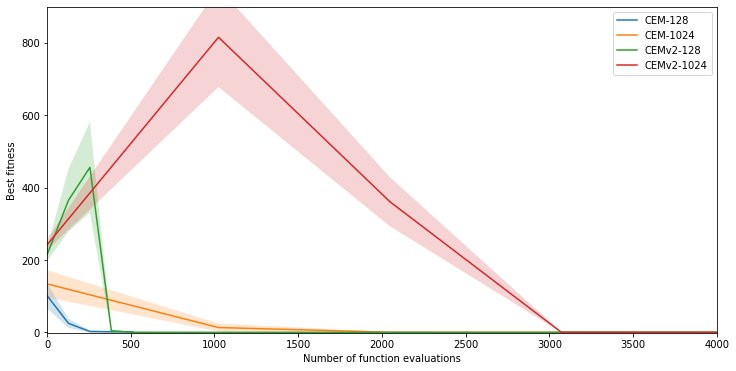

In [ ]:
error1_cem_128, error2_cem_128 = [], []
for i in range(len(plt_fitness_cem_128)):
    error1_cem_128.append(plt_fitness_cem_128[i] + plt_std_cem_128[i])
    error2_cem_128.append(plt_fitness_cem_128[i] - plt_std_cem_128[i])

error1_cem_1024, error2_cem_1024 = [], []
for i in range(len(plt_fitness_cem_1024)):
    error1_cem_1024.append(plt_fitness_cem_1024[i] + plt_std_cem_1024[i])
    error2_cem_1024.append(plt_fitness_cem_1024[i] - plt_std_cem_1024[i])

error1_cemv2_128, error2_cemv2_128 = [], []
for i in range(len(plt_fitness_cemv2_128)):
    error1_cemv2_128.append(plt_fitness_cemv2_128[i] + plt_std_cemv2_128[i])
    error2_cemv2_128.append(plt_fitness_cemv2_128[i] - plt_std_cemv2_128[i])

error1_cemv2_1024, error2_cemv2_1024 = [], []
for i in range(len(plt_fitness_cemv2_1024)):
    error1_cemv2_1024.append(plt_fitness_cemv2_1024[i] + plt_std_cemv2_1024[i])
    error2_cemv2_1024.append(plt_fitness_cemv2_1024[i] - plt_std_cemv2_1024[i])

plt.figure(figsize=(12, 6))
plt.xlim(left=0, right=4000)
plt.ylim(-1, 900)

# CEM 128
plt.plot(plt_eval_cem_128, plt_fitness_cem_128, label='CEM-128')
plt.fill_between(plt_eval_cem_128, error1_cem_128, error2_cem_128, alpha=0.2)

# CEM 1024
plt.plot(plt_eval_cem_1024, plt_fitness_cem_1024, label='CEM-1024')
plt.fill_between(plt_eval_cem_1024, error1_cem_1024, error2_cem_1024, alpha=0.2)

# CEMv2 128
plt.plot(plt_eval_cemv2_128, plt_fitness_cemv2_128,label='CEMv2-128')
plt.fill_between(plt_eval_cemv2_128, error1_cemv2_128, error2_cemv2_128, alpha=0.2)

# ES 1024
plt.plot(plt_eval_cemv2_1024, plt_fitness_cemv2_1024, label='CEMv2-1024')
plt.fill_between(plt_eval_cemv2_1024, error1_cemv2_1024, error2_cemv2_1024, alpha=0.2)

plt.xlabel('Number of function evaluations')
plt.ylabel('Best fitness')
plt.legend()
plt.savefig('Sphere-2d.png')
plt.show()

### **dimensions (d=10)**

In [ ]:
dimension = 10
max_evals = 1e6
fobj = Sphere_f
seed_number = 18520186
popsize = 128
lower_bound = -6
upper_bound = 6
num_elite = 10
sigma_init = 4

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEM(fobj, dimension, [(lower_bound, upper_bound)]*dimension, popsize, num_elite, sigma_init, seed_number)
    all_results.append(results)
    all_fitness.append(fitness)
    num_evals.append(evals)
    seed_number += 1

plt_fitness_cem_128 = []
plt_std_cem_128 = []
plt_eval_cem_128 = []
for i in range(np.min([len(all_fitness[t]) for t in range(10)])):
    fitness = []
    eval = []
    for j in range(10):
        fitness.append(all_fitness[j][i])
        eval.append(num_evals[j][i])
    plt_fitness_cem_128.append(np.mean(fitness))
    plt_std_cem_128.append(np.std(fitness))
    plt_eval_cem_128.append(np.mean(eval))

In [ ]:
dimension = 10
max_evals = 1e6
fobj = Sphere_f
seed_number = 18520186
popsize = 1024
lower_bound = -6
upper_bound = 6
num_elite = 10
sigma_init = 4

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEM(fobj, dimension, [(lower_bound, upper_bound)]*dimension, popsize, num_elite, sigma_init, seed_number)
    all_results.append(results)
    all_fitness.append(fitness)
    num_evals.append(evals)
    seed_number += 1

plt_fitness_cem_1024 = []
plt_std_cem_1024 = []
plt_eval_cem_1024 = []
for i in range(np.min([len(all_fitness[t]) for t in range(10)])):
    fitness = []
    eval = []
    for j in range(10):
        fitness.append(all_fitness[j][i])
        eval.append(num_evals[j][i])
    plt_fitness_cem_1024.append(np.mean(fitness))
    plt_std_cem_1024.append(np.std(fitness))
    plt_eval_cem_1024.append(np.mean(eval))

In [ ]:
dimension = 10
max_evals = 1e6
fobj = Sphere_f
seed_number = 18520186
popsize = 128
lower_bound = -6
upper_bound = 6
num_elite = 10
sigma_init = 4
extra_std = 0.01

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEMv2(fobj, dimension, [(lower_bound, upper_bound)]*dimension, popsize, num_elite, sigma_init, extra_std, seed_number)
    all_results.append(results)
    all_fitness.append(fitness)
    num_evals.append(evals)
    seed_number += 1

plt_fitness_cemv2_128 = []
plt_std_cemv2_128 = []
plt_eval_cemv2_128 = []
for i in range(np.min([len(all_fitness[t]) for t in range(10)])):
    fitness = []
    eval = []
    for j in range(10):
        fitness.append(all_fitness[j][i])
        eval.append(num_evals[j][i])
    plt_fitness_cemv2_128.append(np.mean(fitness))
    plt_std_cemv2_128.append(np.std(fitness))
    plt_eval_cemv2_128.append(np.mean(eval))

In [ ]:
dimension = 10
max_evals = 1e6
fobj = Sphere_f
seed_number = 18520186
popsize = 1024
lower_bound = -6
upper_bound = 6
num_elite = 10
sigma_init = 4
extra_std = 0.01

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEMv2(fobj, dimension, [(lower_bound, upper_bound)]*dimension, popsize, num_elite, sigma_init, extra_std, seed_number)
    all_results.append(results)
    all_fitness.append(fitness)
    num_evals.append(evals)
    seed_number += 1

plt_fitness_cemv2_1024 = []
plt_std_cemv2_1024 = []
plt_eval_cemv2_1024 = []
for i in range(np.min([len(all_fitness[t]) for t in range(10)])):
    fitness = []
    eval = []
    for j in range(10):
        fitness.append(all_fitness[j][i])
        eval.append(num_evals[j][i])
    plt_fitness_cemv2_1024.append(np.mean(fitness))
    plt_std_cemv2_1024.append(np.std(fitness))
    plt_eval_cemv2_1024.append(np.mean(eval))

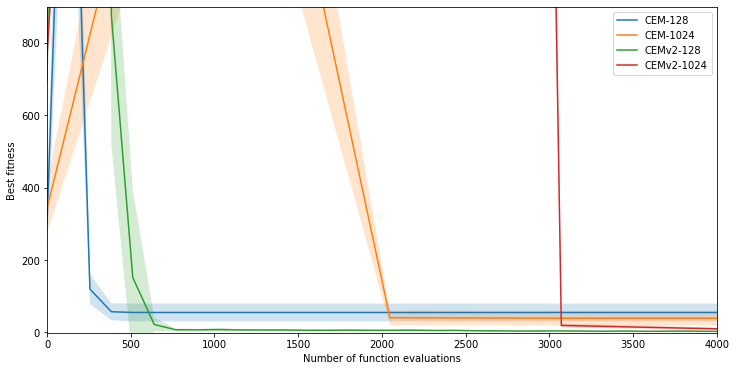

In [ ]:
error1_cem_128, error2_cem_128 = [], []
for i in range(len(plt_fitness_cem_128)):
    error1_cem_128.append(plt_fitness_cem_128[i] + plt_std_cem_128[i])
    error2_cem_128.append(plt_fitness_cem_128[i] - plt_std_cem_128[i])

error1_cem_1024, error2_cem_1024 = [], []
for i in range(len(plt_fitness_cem_1024)):
    error1_cem_1024.append(plt_fitness_cem_1024[i] + plt_std_cem_1024[i])
    error2_cem_1024.append(plt_fitness_cem_1024[i] - plt_std_cem_1024[i])

error1_cemv2_128, error2_cemv2_128 = [], []
for i in range(len(plt_fitness_cemv2_128)):
    error1_cemv2_128.append(plt_fitness_cemv2_128[i] + plt_std_cemv2_128[i])
    error2_cemv2_128.append(plt_fitness_cemv2_128[i] - plt_std_cemv2_128[i])

error1_cemv2_1024, error2_cemv2_1024 = [], []
for i in range(len(plt_fitness_cemv2_1024)):
    error1_cemv2_1024.append(plt_fitness_cemv2_1024[i] + plt_std_cemv2_1024[i])
    error2_cemv2_1024.append(plt_fitness_cemv2_1024[i] - plt_std_cemv2_1024[i])

plt.figure(figsize=(12, 6))
plt.xlim(left=0, right=4000)
plt.ylim(-1, 900)

# CEM 128
plt.plot(plt_eval_cem_128, plt_fitness_cem_128, label='CEM-128')
plt.fill_between(plt_eval_cem_128, error1_cem_128, error2_cem_128, alpha=0.2)

# CEM 1024
plt.plot(plt_eval_cem_1024, plt_fitness_cem_1024, label='CEM-1024')
plt.fill_between(plt_eval_cem_1024, error1_cem_1024, error2_cem_1024, alpha=0.2)

# CEMv2 128
plt.plot(plt_eval_cemv2_128, plt_fitness_cemv2_128,label='CEMv2-128')
plt.fill_between(plt_eval_cemv2_128, error1_cemv2_128, error2_cemv2_128, alpha=0.2)

# ES 1024
plt.plot(plt_eval_cemv2_1024, plt_fitness_cemv2_1024, label='CEMv2-1024')
plt.fill_between(plt_eval_cemv2_1024, error1_cemv2_1024, error2_cemv2_1024, alpha=0.2)

plt.xlabel('Number of function evaluations')
plt.ylabel('Best fitness')
plt.legend()
plt.savefig('Sphere-10d.png')
plt.show()

## **Hàm Rastrigin**

### **dimensions (d=2)**

In [ ]:
dimension = 2
max_evals = 1e5
fobj = Rastrigin_f
seed_number = 18520186
popsize = 128
lower_bound = -6
upper_bound = 6
num_elite = 10
sigma_init = 4

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEM(fobj, dimension, [(lower_bound, upper_bound)]*dimension, popsize, num_elite, sigma_init, seed_number)
    all_results.append(results)
    all_fitness.append(fitness)
    num_evals.append(evals)
    seed_number += 1

plt_fitness_cem_128 = []
plt_std_cem_128 = []
plt_eval_cem_128 = []
for i in range(np.min([len(all_fitness[t]) for t in range(10)])):
    fitness = []
    eval = []
    for j in range(10):
        fitness.append(all_fitness[j][i])
        eval.append(num_evals[j][i])
    plt_fitness_cem_128.append(np.mean(fitness))
    plt_std_cem_128.append(np.std(fitness))
    plt_eval_cem_128.append(np.mean(eval))

In [ ]:
dimension = 2
max_evals = 1e5
fobj = Rastrigin_f
seed_number = 18520186
popsize = 1024
lower_bound = -6
upper_bound = 6
num_elite = 10
sigma_init = 4

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEM(fobj, dimension, [(lower_bound, upper_bound)]*dimension, popsize, num_elite, sigma_init, seed_number)
    all_results.append(results)
    all_fitness.append(fitness)
    num_evals.append(evals)
    seed_number += 1

plt_fitness_cem_1024 = []
plt_std_cem_1024 = []
plt_eval_cem_1024 = []
for i in range(np.min([len(all_fitness[t]) for t in range(10)])):
    fitness = []
    eval = []
    for j in range(10):
        fitness.append(all_fitness[j][i])
        eval.append(num_evals[j][i])
    plt_fitness_cem_1024.append(np.mean(fitness))
    plt_std_cem_1024.append(np.std(fitness))
    plt_eval_cem_1024.append(np.mean(eval))

In [ ]:
dimension = 2
max_evals = 1e5
fobj = Rastrigin_f
seed_number = 18520186
popsize = 128
lower_bound = -6
upper_bound = 6
num_elite = 10
sigma_init = 4
extra_std = 0.01

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEMv2(fobj, dimension, [(lower_bound, upper_bound)]*dimension, popsize, num_elite, sigma_init, extra_std, seed_number)
    all_results.append(results)
    all_fitness.append(fitness)
    num_evals.append(evals)
    seed_number += 1

plt_fitness_cemv2_128 = []
plt_std_cemv2_128 = []
plt_eval_cemv2_128 = []
for i in range(np.min([len(all_fitness[t]) for t in range(10)])):
    fitness = []
    eval = []
    for j in range(10):
        fitness.append(all_fitness[j][i])
        eval.append(num_evals[j][i])
    plt_fitness_cemv2_128.append(np.mean(fitness))
    plt_std_cemv2_128.append(np.std(fitness))
    plt_eval_cemv2_128.append(np.mean(eval))

In [ ]:
dimension = 2
max_evals = 1e5
fobj = Rastrigin_f
seed_number = 18520186
popsize = 1024
lower_bound = -6
upper_bound = 6
num_elite = 10
sigma_init = 4
extra_std = 0.01

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEMv2(fobj, dimension, [(lower_bound, upper_bound)]*dimension, popsize, num_elite, sigma_init, extra_std, seed_number)
    all_results.append(results)
    all_fitness.append(fitness)
    num_evals.append(evals)
    seed_number += 1

plt_fitness_cemv2_1024 = []
plt_std_cemv2_1024 = []
plt_eval_cemv2_1024 = []
for i in range(np.min([len(all_fitness[t]) for t in range(10)])):
    fitness = []
    eval = []
    for j in range(10):
        fitness.append(all_fitness[j][i])
        eval.append(num_evals[j][i])
    plt_fitness_cemv2_1024.append(np.mean(fitness))
    plt_std_cemv2_1024.append(np.std(fitness))
    plt_eval_cemv2_1024.append(np.mean(eval))

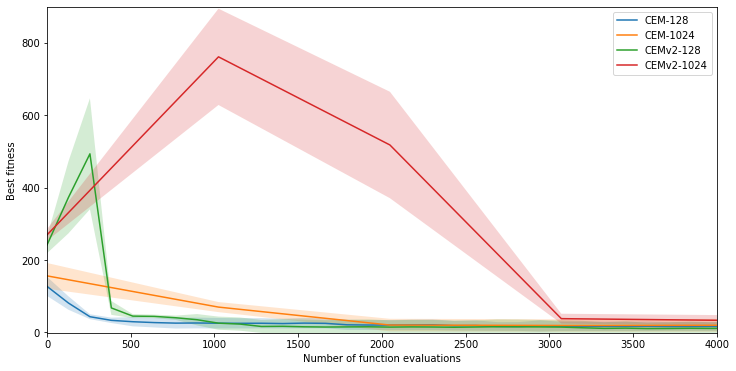

In [ ]:
error1_cem_128, error2_cem_128 = [], []
for i in range(len(plt_fitness_cem_128)):
    error1_cem_128.append(plt_fitness_cem_128[i] + plt_std_cem_128[i])
    error2_cem_128.append(plt_fitness_cem_128[i] - plt_std_cem_128[i])

error1_cem_1024, error2_cem_1024 = [], []
for i in range(len(plt_fitness_cem_1024)):
    error1_cem_1024.append(plt_fitness_cem_1024[i] + plt_std_cem_1024[i])
    error2_cem_1024.append(plt_fitness_cem_1024[i] - plt_std_cem_1024[i])

error1_cemv2_128, error2_cemv2_128 = [], []
for i in range(len(plt_fitness_cemv2_128)):
    error1_cemv2_128.append(plt_fitness_cemv2_128[i] + plt_std_cemv2_128[i])
    error2_cemv2_128.append(plt_fitness_cemv2_128[i] - plt_std_cemv2_128[i])

error1_cemv2_1024, error2_cemv2_1024 = [], []
for i in range(len(plt_fitness_cemv2_1024)):
    error1_cemv2_1024.append(plt_fitness_cemv2_1024[i] + plt_std_cemv2_1024[i])
    error2_cemv2_1024.append(plt_fitness_cemv2_1024[i] - plt_std_cemv2_1024[i])

plt.figure(figsize=(12, 6))
plt.xlim(left=0, right=4000)
plt.ylim(-1, 900)

# CEM 128
plt.plot(plt_eval_cem_128, plt_fitness_cem_128, label='CEM-128')
plt.fill_between(plt_eval_cem_128, error1_cem_128, error2_cem_128, alpha=0.2)

# CEM 1024
plt.plot(plt_eval_cem_1024, plt_fitness_cem_1024, label='CEM-1024')
plt.fill_between(plt_eval_cem_1024, error1_cem_1024, error2_cem_1024, alpha=0.2)

# CEMv2 128
plt.plot(plt_eval_cemv2_128, plt_fitness_cemv2_128,label='CEMv2-128')
plt.fill_between(plt_eval_cemv2_128, error1_cemv2_128, error2_cemv2_128, alpha=0.2)

# ES 1024
plt.plot(plt_eval_cemv2_1024, plt_fitness_cemv2_1024, label='CEMv2-1024')
plt.fill_between(plt_eval_cemv2_1024, error1_cemv2_1024, error2_cemv2_1024, alpha=0.2)

plt.xlabel('Number of function evaluations')
plt.ylabel('Best fitness')
plt.legend()
plt.savefig('Rastrigin-2d.png')
plt.show()

### **dimensions (d=10)**

In [ ]:
dimension = 10
max_evals = 1e6
fobj = Rastrigin_f
seed_number = 18520186
popsize = 128
lower_bound = -6
upper_bound = 6
num_elite = 10
sigma_init = 4

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEM(fobj, dimension, [(lower_bound, upper_bound)]*dimension, popsize, num_elite, sigma_init, seed_number)
    all_results.append(results)
    all_fitness.append(fitness)
    num_evals.append(evals)
    seed_number += 1

plt_fitness_cem_128 = []
plt_std_cem_128 = []
plt_eval_cem_128 = []
for i in range(np.min([len(all_fitness[t]) for t in range(10)])):
    fitness = []
    eval = []
    for j in range(10):
        fitness.append(all_fitness[j][i])
        eval.append(num_evals[j][i])
    plt_fitness_cem_128.append(np.mean(fitness))
    plt_std_cem_128.append(np.std(fitness))
    plt_eval_cem_128.append(np.mean(eval))

In [ ]:
dimension = 10
max_evals = 1e6
fobj = Rastrigin_f
seed_number = 18520186
popsize = 1024
lower_bound = -6
upper_bound = 6
num_elite = 10
sigma_init = 4

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEM(fobj, dimension, [(lower_bound, upper_bound)]*dimension, popsize, num_elite, sigma_init, seed_number)
    all_results.append(results)
    all_fitness.append(fitness)
    num_evals.append(evals)
    seed_number += 1

plt_fitness_cem_1024 = []
plt_std_cem_1024 = []
plt_eval_cem_1024 = []
for i in range(np.min([len(all_fitness[t]) for t in range(10)])):
    fitness = []
    eval = []
    for j in range(10):
        fitness.append(all_fitness[j][i])
        eval.append(num_evals[j][i])
    plt_fitness_cem_1024.append(np.mean(fitness))
    plt_std_cem_1024.append(np.std(fitness))
    plt_eval_cem_1024.append(np.mean(eval))

In [ ]:
dimension = 10
max_evals = 1e6
fobj = Rastrigin_f
seed_number = 18520186
popsize = 128
lower_bound = -6
upper_bound = 6
num_elite = 10
sigma_init = 4
extra_std = 0.01

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEMv2(fobj, dimension, [(lower_bound, upper_bound)]*dimension, popsize, num_elite, sigma_init, extra_std, seed_number)
    all_results.append(results)
    all_fitness.append(fitness)
    num_evals.append(evals)
    seed_number += 1

plt_fitness_cemv2_128 = []
plt_std_cemv2_128 = []
plt_eval_cemv2_128 = []
for i in range(np.min([len(all_fitness[t]) for t in range(10)])):
    fitness = []
    eval = []
    for j in range(10):
        fitness.append(all_fitness[j][i])
        eval.append(num_evals[j][i])
    plt_fitness_cemv2_128.append(np.mean(fitness))
    plt_std_cemv2_128.append(np.std(fitness))
    plt_eval_cemv2_128.append(np.mean(eval))

In [ ]:
dimension = 10
max_evals = 1e6
fobj = Rastrigin_f
seed_number = 18520186
popsize = 1024
lower_bound = -6
upper_bound = 6
num_elite = 10
sigma_init = 4
extra_std = 0.01

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEMv2(fobj, dimension, [(lower_bound, upper_bound)]*dimension, popsize, num_elite, sigma_init, extra_std, seed_number)
    all_results.append(results)
    all_fitness.append(fitness)
    num_evals.append(evals)
    seed_number += 1

plt_fitness_cemv2_1024 = []
plt_std_cemv2_1024 = []
plt_eval_cemv2_1024 = []
for i in range(np.min([len(all_fitness[t]) for t in range(10)])):
    fitness = []
    eval = []
    for j in range(10):
        fitness.append(all_fitness[j][i])
        eval.append(num_evals[j][i])
    plt_fitness_cemv2_1024.append(np.mean(fitness))
    plt_std_cemv2_1024.append(np.std(fitness))
    plt_eval_cemv2_1024.append(np.mean(eval))

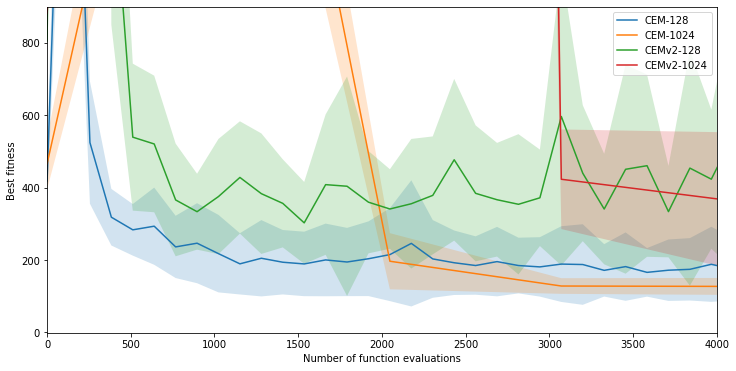

In [ ]:
error1_cem_128, error2_cem_128 = [], []
for i in range(len(plt_fitness_cem_128)):
    error1_cem_128.append(plt_fitness_cem_128[i] + plt_std_cem_128[i])
    error2_cem_128.append(plt_fitness_cem_128[i] - plt_std_cem_128[i])

error1_cem_1024, error2_cem_1024 = [], []
for i in range(len(plt_fitness_cem_1024)):
    error1_cem_1024.append(plt_fitness_cem_1024[i] + plt_std_cem_1024[i])
    error2_cem_1024.append(plt_fitness_cem_1024[i] - plt_std_cem_1024[i])

error1_cemv2_128, error2_cemv2_128 = [], []
for i in range(len(plt_fitness_cemv2_128)):
    error1_cemv2_128.append(plt_fitness_cemv2_128[i] + plt_std_cemv2_128[i])
    error2_cemv2_128.append(plt_fitness_cemv2_128[i] - plt_std_cemv2_128[i])

error1_cemv2_1024, error2_cemv2_1024 = [], []
for i in range(len(plt_fitness_cemv2_1024)):
    error1_cemv2_1024.append(plt_fitness_cemv2_1024[i] + plt_std_cemv2_1024[i])
    error2_cemv2_1024.append(plt_fitness_cemv2_1024[i] - plt_std_cemv2_1024[i])

plt.figure(figsize=(12, 6))
plt.xlim(left=0, right=4000)
plt.ylim(-1, 900)

# CEM 128
plt.plot(plt_eval_cem_128, plt_fitness_cem_128, label='CEM-128')
plt.fill_between(plt_eval_cem_128, error1_cem_128, error2_cem_128, alpha=0.2)

# CEM 1024
plt.plot(plt_eval_cem_1024, plt_fitness_cem_1024, label='CEM-1024')
plt.fill_between(plt_eval_cem_1024, error1_cem_1024, error2_cem_1024, alpha=0.2)

# CEMv2 128
plt.plot(plt_eval_cemv2_128, plt_fitness_cemv2_128,label='CEMv2-128')
plt.fill_between(plt_eval_cemv2_128, error1_cemv2_128, error2_cemv2_128, alpha=0.2)

# ES 1024
plt.plot(plt_eval_cemv2_1024, plt_fitness_cemv2_1024, label='CEMv2-1024')
plt.fill_between(plt_eval_cemv2_1024, error1_cemv2_1024, error2_cemv2_1024, alpha=0.2)

plt.xlabel('Number of function evaluations')
plt.ylabel('Best fitness')
plt.legend()
plt.savefig('Rastrigin-10d.png')
plt.show()

## **Hàm Rosenbrock**

### **dimensions (d=2)**

In [ ]:
dimension = 2
max_evals = 1e5
fobj = Rosenbrock_f
seed_number = 18520186
popsize = 128
lower_bound = -3
upper_bound = 3
num_elite = 10
sigma_init = 4

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEM(fobj, dimension, [(lower_bound, upper_bound)]*dimension, popsize, num_elite, sigma_init, seed_number)
    all_results.append(results)
    all_fitness.append(fitness)
    num_evals.append(evals)
    seed_number += 1

plt_fitness_cem_128 = []
plt_std_cem_128 = []
plt_eval_cem_128 = []
for i in range(np.min([len(all_fitness[t]) for t in range(10)])):
    fitness = []
    eval = []
    for j in range(10):
        fitness.append(all_fitness[j][i])
        eval.append(num_evals[j][i])
    plt_fitness_cem_128.append(np.mean(fitness))
    plt_std_cem_128.append(np.std(fitness))
    plt_eval_cem_128.append(np.mean(eval))

In [ ]:
dimension = 2
max_evals = 1e5
fobj = Rosenbrock_f
seed_number = 18520186
popsize = 1024
lower_bound = -3
upper_bound = 3
num_elite = 10
sigma_init = 4

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEM(fobj, dimension, [(lower_bound, upper_bound)]*dimension, popsize, num_elite, sigma_init, seed_number)
    all_results.append(results)
    all_fitness.append(fitness)
    num_evals.append(evals)
    seed_number += 1

plt_fitness_cem_1024 = []
plt_std_cem_1024 = []
plt_eval_cem_1024 = []
for i in range(np.min([len(all_fitness[t]) for t in range(10)])):
    fitness = []
    eval = []
    for j in range(10):
        fitness.append(all_fitness[j][i])
        eval.append(num_evals[j][i])
    plt_fitness_cem_1024.append(np.mean(fitness))
    plt_std_cem_1024.append(np.std(fitness))
    plt_eval_cem_1024.append(np.mean(eval))

In [ ]:
dimension = 2
max_evals = 1e5
fobj = Rosenbrock_f
seed_number = 18520186
popsize = 128
lower_bound = -3
upper_bound = 3
num_elite = 10
sigma_init = 4
extra_std = 0.01

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEMv2(fobj, dimension, [(lower_bound, upper_bound)]*dimension, popsize, num_elite, sigma_init, extra_std, seed_number)
    all_results.append(results)
    all_fitness.append(fitness)
    num_evals.append(evals)
    seed_number += 1

plt_fitness_cemv2_128 = []
plt_std_cemv2_128 = []
plt_eval_cemv2_128 = []
for i in range(np.min([len(all_fitness[t]) for t in range(10)])):
    fitness = []
    eval = []
    for j in range(10):
        fitness.append(all_fitness[j][i])
        eval.append(num_evals[j][i])
    plt_fitness_cemv2_128.append(np.mean(fitness))
    plt_std_cemv2_128.append(np.std(fitness))
    plt_eval_cemv2_128.append(np.mean(eval))

In [ ]:
dimension = 2
max_evals = 1e5
fobj = Rosenbrock_f
seed_number = 18520186
popsize = 1024
lower_bound = -3
upper_bound = 3
num_elite = 10
sigma_init = 4
extra_std = 0.01

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEMv2(fobj, dimension, [(lower_bound, upper_bound)]*dimension, popsize, num_elite, sigma_init, extra_std, seed_number)
    all_results.append(results)
    all_fitness.append(fitness)
    num_evals.append(evals)
    seed_number += 1

plt_fitness_cemv2_1024 = []
plt_std_cemv2_1024 = []
plt_eval_cemv2_1024 = []
for i in range(np.min([len(all_fitness[t]) for t in range(10)])):
    fitness = []
    eval = []
    for j in range(10):
        fitness.append(all_fitness[j][i])
        eval.append(num_evals[j][i])
    plt_fitness_cemv2_1024.append(np.mean(fitness))
    plt_std_cemv2_1024.append(np.std(fitness))
    plt_eval_cemv2_1024.append(np.mean(eval))

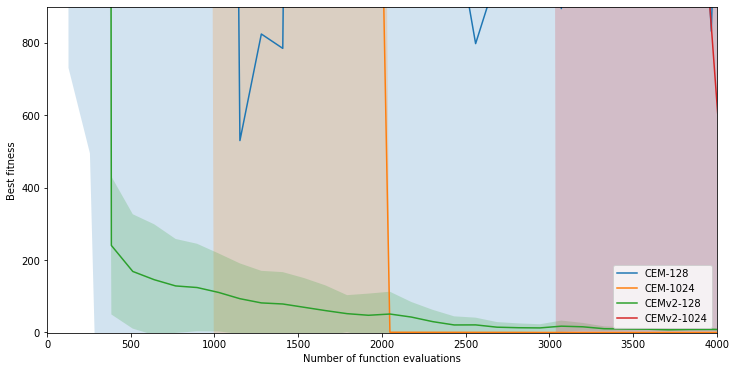

In [ ]:
error1_cem_128, error2_cem_128 = [], []
for i in range(len(plt_fitness_cem_128)):
    error1_cem_128.append(plt_fitness_cem_128[i] + plt_std_cem_128[i])
    error2_cem_128.append(plt_fitness_cem_128[i] - plt_std_cem_128[i])

error1_cem_1024, error2_cem_1024 = [], []
for i in range(len(plt_fitness_cem_1024)):
    error1_cem_1024.append(plt_fitness_cem_1024[i] + plt_std_cem_1024[i])
    error2_cem_1024.append(plt_fitness_cem_1024[i] - plt_std_cem_1024[i])

error1_cemv2_128, error2_cemv2_128 = [], []
for i in range(len(plt_fitness_cemv2_128)):
    error1_cemv2_128.append(plt_fitness_cemv2_128[i] + plt_std_cemv2_128[i])
    error2_cemv2_128.append(plt_fitness_cemv2_128[i] - plt_std_cemv2_128[i])

error1_cemv2_1024, error2_cemv2_1024 = [], []
for i in range(len(plt_fitness_cemv2_1024)):
    error1_cemv2_1024.append(plt_fitness_cemv2_1024[i] + plt_std_cemv2_1024[i])
    error2_cemv2_1024.append(plt_fitness_cemv2_1024[i] - plt_std_cemv2_1024[i])

plt.figure(figsize=(12, 6))
plt.xlim(left=0, right=4000)
plt.ylim(-1, 900)

# CEM 128
plt.plot(plt_eval_cem_128, plt_fitness_cem_128, label='CEM-128')
plt.fill_between(plt_eval_cem_128, error1_cem_128, error2_cem_128, alpha=0.2)

# CEM 1024
plt.plot(plt_eval_cem_1024, plt_fitness_cem_1024, label='CEM-1024')
plt.fill_between(plt_eval_cem_1024, error1_cem_1024, error2_cem_1024, alpha=0.2)

# CEMv2 128
plt.plot(plt_eval_cemv2_128, plt_fitness_cemv2_128,label='CEMv2-128')
plt.fill_between(plt_eval_cemv2_128, error1_cemv2_128, error2_cemv2_128, alpha=0.2)

# ES 1024
plt.plot(plt_eval_cemv2_1024, plt_fitness_cemv2_1024, label='CEMv2-1024')
plt.fill_between(plt_eval_cemv2_1024, error1_cemv2_1024, error2_cemv2_1024, alpha=0.2)

plt.xlabel('Number of function evaluations')
plt.ylabel('Best fitness')
plt.legend()
plt.savefig('Rosenbrock-2d.png')
plt.show()

### **dimensions (d=10)**

In [ ]:
dimension = 10
max_evals = 1e6
fobj = Rosenbrock_f
seed_number = 18520186
popsize = 128
lower_bound = -3
upper_bound = 3
num_elite = 10
sigma_init = 4

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEM(fobj, dimension, [(lower_bound, upper_bound)]*dimension, popsize, num_elite, sigma_init, seed_number)
    all_results.append(results)
    all_fitness.append(fitness)
    num_evals.append(evals)
    seed_number += 1

plt_fitness_cem_128 = []
plt_std_cem_128 = []
plt_eval_cem_128 = []
for i in range(np.min([len(all_fitness[t]) for t in range(10)])):
    fitness = []
    eval = []
    for j in range(10):
        fitness.append(all_fitness[j][i])
        eval.append(num_evals[j][i])
    plt_fitness_cem_128.append(np.mean(fitness))
    plt_std_cem_128.append(np.std(fitness))
    plt_eval_cem_128.append(np.mean(eval))

In [ ]:
dimension = 10
max_evals = 1e6
fobj = Rosenbrock_f
seed_number = 18520186
popsize = 1024
lower_bound = -3
upper_bound = 3
num_elite = 10
sigma_init = 4

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEM(fobj, dimension, [(lower_bound, upper_bound)]*dimension, popsize, num_elite, sigma_init, seed_number)
    all_results.append(results)
    all_fitness.append(fitness)
    num_evals.append(evals)
    seed_number += 1

plt_fitness_cem_1024 = []
plt_std_cem_1024 = []
plt_eval_cem_1024 = []
for i in range(np.min([len(all_fitness[t]) for t in range(10)])):
    fitness = []
    eval = []
    for j in range(10):
        fitness.append(all_fitness[j][i])
        eval.append(num_evals[j][i])
    plt_fitness_cem_1024.append(np.mean(fitness))
    plt_std_cem_1024.append(np.std(fitness))
    plt_eval_cem_1024.append(np.mean(eval))

In [ ]:
dimension = 10
max_evals = 1e6
fobj = Rosenbrock_f
seed_number = 18520186
popsize = 128
lower_bound = -3
upper_bound = 3
num_elite = 10
sigma_init = 4
extra_std = 0.01

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEMv2(fobj, dimension, [(lower_bound, upper_bound)]*dimension, popsize, num_elite, sigma_init, extra_std, seed_number)
    all_results.append(results)
    all_fitness.append(fitness)
    num_evals.append(evals)
    seed_number += 1

plt_fitness_cemv2_128 = []
plt_std_cemv2_128 = []
plt_eval_cemv2_128 = []
for i in range(np.min([len(all_fitness[t]) for t in range(10)])):
    fitness = []
    eval = []
    for j in range(10):
        fitness.append(all_fitness[j][i])
        eval.append(num_evals[j][i])
    plt_fitness_cemv2_128.append(np.mean(fitness))
    plt_std_cemv2_128.append(np.std(fitness))
    plt_eval_cemv2_128.append(np.mean(eval))

In [ ]:
dimension = 10
max_evals = 1e6
fobj = Rosenbrock_f
seed_number = 18520186
popsize = 1024
lower_bound = -3
upper_bound = 3
num_elite = 10
sigma_init = 4
extra_std = 0.01

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEMv2(fobj, dimension, [(lower_bound, upper_bound)]*dimension, popsize, num_elite, sigma_init, extra_std, seed_number)
    all_results.append(results)
    all_fitness.append(fitness)
    num_evals.append(evals)
    seed_number += 1

plt_fitness_cemv2_1024 = []
plt_std_cemv2_1024 = []
plt_eval_cemv2_1024 = []
for i in range(np.min([len(all_fitness[t]) for t in range(10)])):
    fitness = []
    eval = []
    for j in range(10):
        fitness.append(all_fitness[j][i])
        eval.append(num_evals[j][i])
    plt_fitness_cemv2_1024.append(np.mean(fitness))
    plt_std_cemv2_1024.append(np.std(fitness))
    plt_eval_cemv2_1024.append(np.mean(eval))

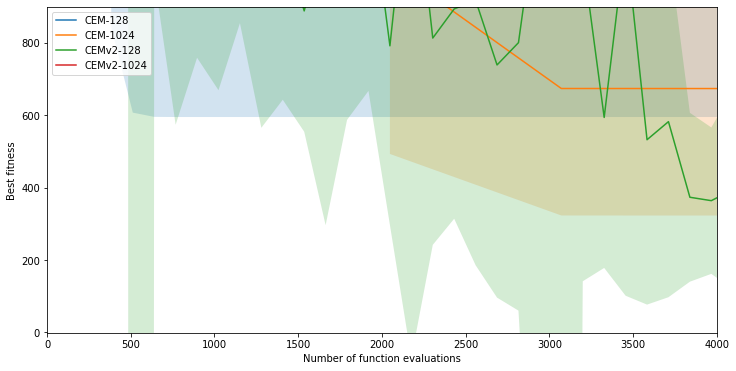

In [ ]:
error1_cem_128, error2_cem_128 = [], []
for i in range(len(plt_fitness_cem_128)):
    error1_cem_128.append(plt_fitness_cem_128[i] + plt_std_cem_128[i])
    error2_cem_128.append(plt_fitness_cem_128[i] - plt_std_cem_128[i])

error1_cem_1024, error2_cem_1024 = [], []
for i in range(len(plt_fitness_cem_1024)):
    error1_cem_1024.append(plt_fitness_cem_1024[i] + plt_std_cem_1024[i])
    error2_cem_1024.append(plt_fitness_cem_1024[i] - plt_std_cem_1024[i])

error1_cemv2_128, error2_cemv2_128 = [], []
for i in range(len(plt_fitness_cemv2_128)):
    error1_cemv2_128.append(plt_fitness_cemv2_128[i] + plt_std_cemv2_128[i])
    error2_cemv2_128.append(plt_fitness_cemv2_128[i] - plt_std_cemv2_128[i])

error1_cemv2_1024, error2_cemv2_1024 = [], []
for i in range(len(plt_fitness_cemv2_1024)):
    error1_cemv2_1024.append(plt_fitness_cemv2_1024[i] + plt_std_cemv2_1024[i])
    error2_cemv2_1024.append(plt_fitness_cemv2_1024[i] - plt_std_cemv2_1024[i])

plt.figure(figsize=(12, 6))
plt.xlim(left=0, right=4000)
plt.ylim(-1, 900)

# CEM 128
plt.plot(plt_eval_cem_128, plt_fitness_cem_128, label='CEM-128')
plt.fill_between(plt_eval_cem_128, error1_cem_128, error2_cem_128, alpha=0.2)

# CEM 1024
plt.plot(plt_eval_cem_1024, plt_fitness_cem_1024, label='CEM-1024')
plt.fill_between(plt_eval_cem_1024, error1_cem_1024, error2_cem_1024, alpha=0.2)

# CEMv2 128
plt.plot(plt_eval_cemv2_128, plt_fitness_cemv2_128,label='CEMv2-128')
plt.fill_between(plt_eval_cemv2_128, error1_cemv2_128, error2_cemv2_128, alpha=0.2)

# ES 1024
plt.plot(plt_eval_cemv2_1024, plt_fitness_cemv2_1024, label='CEMv2-1024')
plt.fill_between(plt_eval_cemv2_1024, error1_cemv2_1024, error2_cemv2_1024, alpha=0.2)

plt.xlabel('Number of function evaluations')
plt.ylabel('Best fitness')
plt.legend()
plt.savefig('Rosenbrock-10d.png')
plt.show()

## **Hàm Griewank**

### **dimensions (d=2)**

In [ ]:
dimension = 2
max_evals = 1e5
fobj = Griewank_f
seed_number = 18520186
popsize = 128
lower_bound = -600
upper_bound = 600
num_elite = 10
sigma_init = 4

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEM(fobj, dimension, [(lower_bound, upper_bound)]*dimension, popsize, num_elite, sigma_init, seed_number)
    all_results.append(results)
    all_fitness.append(fitness)
    num_evals.append(evals)
    seed_number += 1

plt_fitness_cem_128 = []
plt_std_cem_128 = []
plt_eval_cem_128 = []
for i in range(np.min([len(all_fitness[t]) for t in range(10)])):
    fitness = []
    eval = []
    for j in range(10):
        fitness.append(all_fitness[j][i])
        eval.append(num_evals[j][i])
    plt_fitness_cem_128.append(np.mean(fitness))
    plt_std_cem_128.append(np.std(fitness))
    plt_eval_cem_128.append(np.mean(eval))

In [ ]:
dimension = 2
max_evals = 1e5
fobj = Griewank_f
seed_number = 18520186
popsize = 1024
lower_bound = -600
upper_bound = 600
num_elite = 10
sigma_init = 4

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEM(fobj, dimension, [(lower_bound, upper_bound)]*dimension, popsize, num_elite, sigma_init, seed_number)
    all_results.append(results)
    all_fitness.append(fitness)
    num_evals.append(evals)
    seed_number += 1

plt_fitness_cem_1024 = []
plt_std_cem_1024 = []
plt_eval_cem_1024 = []
for i in range(np.min([len(all_fitness[t]) for t in range(10)])):
    fitness = []
    eval = []
    for j in range(10):
        fitness.append(all_fitness[j][i])
        eval.append(num_evals[j][i])
    plt_fitness_cem_1024.append(np.mean(fitness))
    plt_std_cem_1024.append(np.std(fitness))
    plt_eval_cem_1024.append(np.mean(eval))

In [ ]:
dimension = 2
max_evals = 1e5
fobj = Griewank_f
seed_number = 18520186
popsize = 128
lower_bound = -600
upper_bound = 600
num_elite = 10
sigma_init = 4
extra_std = 0.01

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEMv2(fobj, dimension, [(lower_bound, upper_bound)]*dimension, popsize, num_elite, sigma_init, extra_std, seed_number)
    all_results.append(results)
    all_fitness.append(fitness)
    num_evals.append(evals)
    seed_number += 1

plt_fitness_cemv2_128 = []
plt_std_cemv2_128 = []
plt_eval_cemv2_128 = []
for i in range(np.min([len(all_fitness[t]) for t in range(10)])):
    fitness = []
    eval = []
    for j in range(10):
        fitness.append(all_fitness[j][i])
        eval.append(num_evals[j][i])
    plt_fitness_cemv2_128.append(np.mean(fitness))
    plt_std_cemv2_128.append(np.std(fitness))
    plt_eval_cemv2_128.append(np.mean(eval))

In [ ]:
dimension = 2
max_evals = 1e5
fobj = Griewank_f
seed_number = 18520186
popsize = 1024
lower_bound = -600
upper_bound = 600
num_elite = 10
sigma_init = 4
extra_std = 0.01

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEMv2(fobj, dimension, [(lower_bound, upper_bound)]*dimension, popsize, num_elite, sigma_init, extra_std, seed_number)
    all_results.append(results)
    all_fitness.append(fitness)
    num_evals.append(evals)
    seed_number += 1

plt_fitness_cemv2_1024 = []
plt_std_cemv2_1024 = []
plt_eval_cemv2_1024 = []
for i in range(np.min([len(all_fitness[t]) for t in range(10)])):
    fitness = []
    eval = []
    for j in range(10):
        fitness.append(all_fitness[j][i])
        eval.append(num_evals[j][i])
    plt_fitness_cemv2_1024.append(np.mean(fitness))
    plt_std_cemv2_1024.append(np.std(fitness))
    plt_eval_cemv2_1024.append(np.mean(eval))

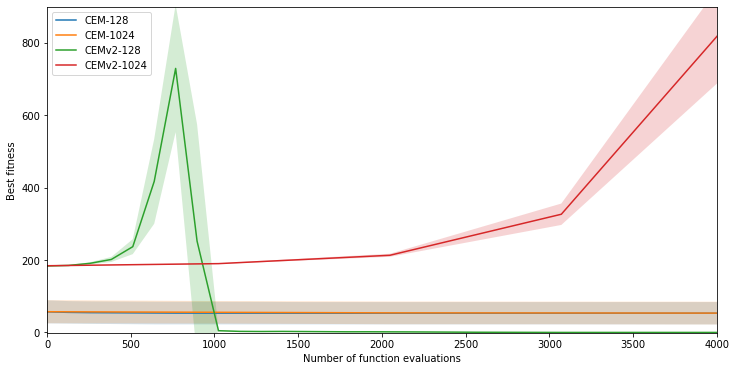

In [ ]:
error1_cem_128, error2_cem_128 = [], []
for i in range(len(plt_fitness_cem_128)):
    error1_cem_128.append(plt_fitness_cem_128[i] + plt_std_cem_128[i])
    error2_cem_128.append(plt_fitness_cem_128[i] - plt_std_cem_128[i])

error1_cem_1024, error2_cem_1024 = [], []
for i in range(len(plt_fitness_cem_1024)):
    error1_cem_1024.append(plt_fitness_cem_1024[i] + plt_std_cem_1024[i])
    error2_cem_1024.append(plt_fitness_cem_1024[i] - plt_std_cem_1024[i])

error1_cemv2_128, error2_cemv2_128 = [], []
for i in range(len(plt_fitness_cemv2_128)):
    error1_cemv2_128.append(plt_fitness_cemv2_128[i] + plt_std_cemv2_128[i])
    error2_cemv2_128.append(plt_fitness_cemv2_128[i] - plt_std_cemv2_128[i])

error1_cemv2_1024, error2_cemv2_1024 = [], []
for i in range(len(plt_fitness_cemv2_1024)):
    error1_cemv2_1024.append(plt_fitness_cemv2_1024[i] + plt_std_cemv2_1024[i])
    error2_cemv2_1024.append(plt_fitness_cemv2_1024[i] - plt_std_cemv2_1024[i])

plt.figure(figsize=(12, 6))
plt.xlim(left=0, right=4000)
plt.ylim(-1, 900)

# CEM 128
plt.plot(plt_eval_cem_128, plt_fitness_cem_128, label='CEM-128')
plt.fill_between(plt_eval_cem_128, error1_cem_128, error2_cem_128, alpha=0.2)

# CEM 1024
plt.plot(plt_eval_cem_1024, plt_fitness_cem_1024, label='CEM-1024')
plt.fill_between(plt_eval_cem_1024, error1_cem_1024, error2_cem_1024, alpha=0.2)

# CEMv2 128
plt.plot(plt_eval_cemv2_128, plt_fitness_cemv2_128,label='CEMv2-128')
plt.fill_between(plt_eval_cemv2_128, error1_cemv2_128, error2_cemv2_128, alpha=0.2)

# ES 1024
plt.plot(plt_eval_cemv2_1024, plt_fitness_cemv2_1024, label='CEMv2-1024')
plt.fill_between(plt_eval_cemv2_1024, error1_cemv2_1024, error2_cemv2_1024, alpha=0.2)

plt.xlabel('Number of function evaluations')
plt.ylabel('Best fitness')
plt.legend()
plt.savefig('Griewank-2d.png')
plt.show()

### **dimensions (d=10)**

In [ ]:
dimension = 10
max_evals = 1e6
fobj = Griewank_f
seed_number = 18520186
popsize = 128
lower_bound = -600
upper_bound = 600
num_elite = 10
sigma_init = 4

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEM(fobj, dimension, [(lower_bound, upper_bound)]*dimension, popsize, num_elite, sigma_init, seed_number)
    all_results.append(results)
    all_fitness.append(fitness)
    num_evals.append(evals)
    seed_number += 1

plt_fitness_cem_128 = []
plt_std_cem_128 = []
plt_eval_cem_128 = []
for i in range(np.min([len(all_fitness[t]) for t in range(10)])):
    fitness = []
    eval = []
    for j in range(10):
        fitness.append(all_fitness[j][i])
        eval.append(num_evals[j][i])
    plt_fitness_cem_128.append(np.mean(fitness))
    plt_std_cem_128.append(np.std(fitness))
    plt_eval_cem_128.append(np.mean(eval))

In [ ]:
dimension = 10
max_evals = 1e6
fobj = Griewank_f
seed_number = 18520186
popsize = 1024
lower_bound = -600
upper_bound = 600
num_elite = 10
sigma_init = 4

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEM(fobj, dimension, [(lower_bound, upper_bound)]*dimension, popsize, num_elite, sigma_init, seed_number)
    all_results.append(results)
    all_fitness.append(fitness)
    num_evals.append(evals)
    seed_number += 1

plt_fitness_cem_1024 = []
plt_std_cem_1024 = []
plt_eval_cem_1024 = []
for i in range(np.min([len(all_fitness[t]) for t in range(10)])):
    fitness = []
    eval = []
    for j in range(10):
        fitness.append(all_fitness[j][i])
        eval.append(num_evals[j][i])
    plt_fitness_cem_1024.append(np.mean(fitness))
    plt_std_cem_1024.append(np.std(fitness))
    plt_eval_cem_1024.append(np.mean(eval))

In [ ]:
dimension = 10
max_evals = 1e6
fobj = Griewank_f
seed_number = 18520186
popsize = 128
lower_bound = -600
upper_bound = 600
num_elite = 10
sigma_init = 4
extra_std = 0.01

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEMv2(fobj, dimension, [(lower_bound, upper_bound)]*dimension, popsize, num_elite, sigma_init, extra_std, seed_number)
    all_results.append(results)
    all_fitness.append(fitness)
    num_evals.append(evals)
    seed_number += 1

plt_fitness_cemv2_128 = []
plt_std_cemv2_128 = []
plt_eval_cemv2_128 = []
for i in range(np.min([len(all_fitness[t]) for t in range(10)])):
    fitness = []
    eval = []
    for j in range(10):
        fitness.append(all_fitness[j][i])
        eval.append(num_evals[j][i])
    plt_fitness_cemv2_128.append(np.mean(fitness))
    plt_std_cemv2_128.append(np.std(fitness))
    plt_eval_cemv2_128.append(np.mean(eval))

In [ ]:
dimension = 10
max_evals = 1e6
fobj = Griewank_f
seed_number = 18520186
popsize = 1024
lower_bound = -600
upper_bound = 600
num_elite = 10
sigma_init = 4
extra_std = 0.01

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEMv2(fobj, dimension, [(lower_bound, upper_bound)]*dimension, popsize, num_elite, sigma_init, extra_std, seed_number)
    all_results.append(results)
    all_fitness.append(fitness)
    num_evals.append(evals)
    seed_number += 1

plt_fitness_cemv2_1024 = []
plt_std_cemv2_1024 = []
plt_eval_cemv2_1024 = []
for i in range(np.min([len(all_fitness[t]) for t in range(10)])):
    fitness = []
    eval = []
    for j in range(10):
        fitness.append(all_fitness[j][i])
        eval.append(num_evals[j][i])
    plt_fitness_cemv2_1024.append(np.mean(fitness))
    plt_std_cemv2_1024.append(np.std(fitness))
    plt_eval_cemv2_1024.append(np.mean(eval))

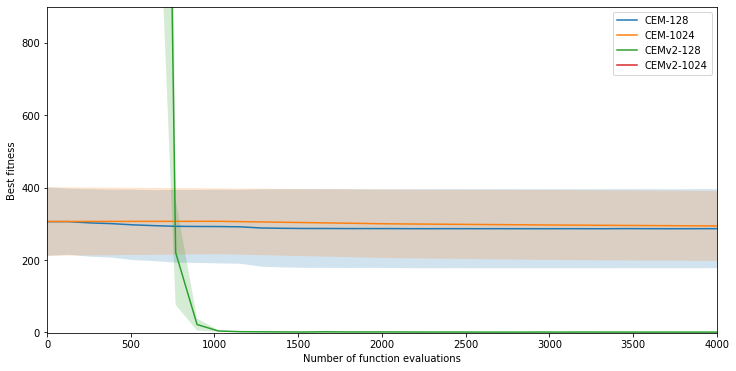

In [ ]:
error1_cem_128, error2_cem_128 = [], []
for i in range(len(plt_fitness_cem_128)):
    error1_cem_128.append(plt_fitness_cem_128[i] + plt_std_cem_128[i])
    error2_cem_128.append(plt_fitness_cem_128[i] - plt_std_cem_128[i])

error1_cem_1024, error2_cem_1024 = [], []
for i in range(len(plt_fitness_cem_1024)):
    error1_cem_1024.append(plt_fitness_cem_1024[i] + plt_std_cem_1024[i])
    error2_cem_1024.append(plt_fitness_cem_1024[i] - plt_std_cem_1024[i])

error1_cemv2_128, error2_cemv2_128 = [], []
for i in range(len(plt_fitness_cemv2_128)):
    error1_cemv2_128.append(plt_fitness_cemv2_128[i] + plt_std_cemv2_128[i])
    error2_cemv2_128.append(plt_fitness_cemv2_128[i] - plt_std_cemv2_128[i])

error1_cemv2_1024, error2_cemv2_1024 = [], []
for i in range(len(plt_fitness_cemv2_1024)):
    error1_cemv2_1024.append(plt_fitness_cemv2_1024[i] + plt_std_cemv2_1024[i])
    error2_cemv2_1024.append(plt_fitness_cemv2_1024[i] - plt_std_cemv2_1024[i])

plt.figure(figsize=(12, 6))
plt.xlim(left=0, right=4000)
plt.ylim(-1, 900)

# CEM 128
plt.plot(plt_eval_cem_128, plt_fitness_cem_128, label='CEM-128')
plt.fill_between(plt_eval_cem_128, error1_cem_128, error2_cem_128, alpha=0.2)

# CEM 1024
plt.plot(plt_eval_cem_1024, plt_fitness_cem_1024, label='CEM-1024')
plt.fill_between(plt_eval_cem_1024, error1_cem_1024, error2_cem_1024, alpha=0.2)

# CEMv2 128
plt.plot(plt_eval_cemv2_128, plt_fitness_cemv2_128,label='CEMv2-128')
plt.fill_between(plt_eval_cemv2_128, error1_cemv2_128, error2_cemv2_128, alpha=0.2)

# ES 1024
plt.plot(plt_eval_cemv2_1024, plt_fitness_cemv2_1024, label='CEMv2-1024')
plt.fill_between(plt_eval_cemv2_1024, error1_cemv2_1024, error2_cemv2_1024, alpha=0.2)

plt.xlabel('Number of function evaluations')
plt.ylabel('Best fitness')
plt.legend()
plt.savefig('Griewank-10d.png')
plt.show()

## **Hàm Ackley**

### **dimensions (d=2)**

In [ ]:
dimension = 2
max_evals = 1e5
fobj = Ackley_f
seed_number = 18520186
popsize = 128
lower_bound = -33
upper_bound = 33
num_elite = 10
sigma_init = 4

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEM(fobj, dimension, [(lower_bound, upper_bound)]*dimension, popsize, num_elite, sigma_init, seed_number)
    all_results.append(results)
    all_fitness.append(fitness)
    num_evals.append(evals)
    seed_number += 1

plt_fitness_cem_128 = []
plt_std_cem_128 = []
plt_eval_cem_128 = []
for i in range(np.min([len(all_fitness[t]) for t in range(10)])):
    fitness = []
    eval = []
    for j in range(10):
        fitness.append(all_fitness[j][i])
        eval.append(num_evals[j][i])
    plt_fitness_cem_128.append(np.mean(fitness))
    plt_std_cem_128.append(np.std(fitness))
    plt_eval_cem_128.append(np.mean(eval))

In [ ]:
dimension = 2
max_evals = 1e5
fobj = Ackley_f
seed_number = 18520186
popsize = 1024
lower_bound = -33
upper_bound = 33
num_elite = 10
sigma_init = 4

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEM(fobj, dimension, [(lower_bound, upper_bound)]*dimension, popsize, num_elite, sigma_init, seed_number)
    all_results.append(results)
    all_fitness.append(fitness)
    num_evals.append(evals)
    seed_number += 1

plt_fitness_cem_1024 = []
plt_std_cem_1024 = []
plt_eval_cem_1024 = []
for i in range(np.min([len(all_fitness[t]) for t in range(10)])):
    fitness = []
    eval = []
    for j in range(10):
        fitness.append(all_fitness[j][i])
        eval.append(num_evals[j][i])
    plt_fitness_cem_1024.append(np.mean(fitness))
    plt_std_cem_1024.append(np.std(fitness))
    plt_eval_cem_1024.append(np.mean(eval))

In [ ]:
dimension = 2
max_evals = 1e5
fobj = Ackley_f
seed_number = 18520186
popsize = 128
lower_bound = -33
upper_bound = 33
num_elite = 10
sigma_init = 4
extra_std = 0.01

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEMv2(fobj, dimension, [(lower_bound, upper_bound)]*dimension, popsize, num_elite, sigma_init, extra_std, seed_number)
    all_results.append(results)
    all_fitness.append(fitness)
    num_evals.append(evals)
    seed_number += 1

plt_fitness_cemv2_128 = []
plt_std_cemv2_128 = []
plt_eval_cemv2_128 = []
for i in range(np.min([len(all_fitness[t]) for t in range(10)])):
    fitness = []
    eval = []
    for j in range(10):
        fitness.append(all_fitness[j][i])
        eval.append(num_evals[j][i])
    plt_fitness_cemv2_128.append(np.mean(fitness))
    plt_std_cemv2_128.append(np.std(fitness))
    plt_eval_cemv2_128.append(np.mean(eval))

In [ ]:
dimension = 2
max_evals = 1e5
fobj = Ackley_f
seed_number = 18520186
popsize = 1024
lower_bound = -33
upper_bound = 33
num_elite = 10
sigma_init = 4
extra_std = 0.01

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEMv2(fobj, dimension, [(lower_bound, upper_bound)]*dimension, popsize, num_elite, sigma_init, extra_std, seed_number)
    all_results.append(results)
    all_fitness.append(fitness)
    num_evals.append(evals)
    seed_number += 1

plt_fitness_cemv2_1024 = []
plt_std_cemv2_1024 = []
plt_eval_cemv2_1024 = []
for i in range(np.min([len(all_fitness[t]) for t in range(10)])):
    fitness = []
    eval = []
    for j in range(10):
        fitness.append(all_fitness[j][i])
        eval.append(num_evals[j][i])
    plt_fitness_cemv2_1024.append(np.mean(fitness))
    plt_std_cemv2_1024.append(np.std(fitness))
    plt_eval_cemv2_1024.append(np.mean(eval))

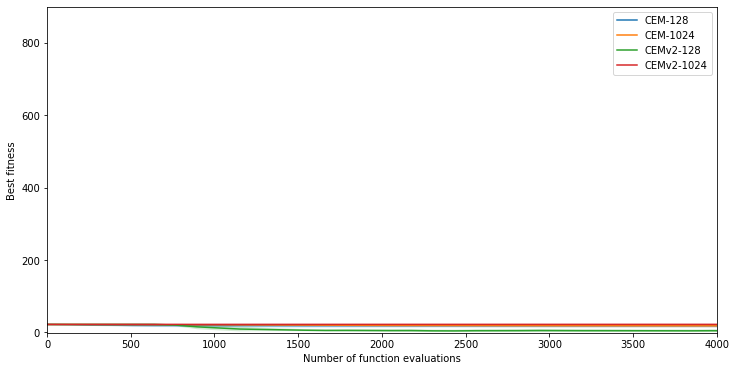

In [ ]:
error1_cem_128, error2_cem_128 = [], []
for i in range(len(plt_fitness_cem_128)):
    error1_cem_128.append(plt_fitness_cem_128[i] + plt_std_cem_128[i])
    error2_cem_128.append(plt_fitness_cem_128[i] - plt_std_cem_128[i])

error1_cem_1024, error2_cem_1024 = [], []
for i in range(len(plt_fitness_cem_1024)):
    error1_cem_1024.append(plt_fitness_cem_1024[i] + plt_std_cem_1024[i])
    error2_cem_1024.append(plt_fitness_cem_1024[i] - plt_std_cem_1024[i])

error1_cemv2_128, error2_cemv2_128 = [], []
for i in range(len(plt_fitness_cemv2_128)):
    error1_cemv2_128.append(plt_fitness_cemv2_128[i] + plt_std_cemv2_128[i])
    error2_cemv2_128.append(plt_fitness_cemv2_128[i] - plt_std_cemv2_128[i])

error1_cemv2_1024, error2_cemv2_1024 = [], []
for i in range(len(plt_fitness_cemv2_1024)):
    error1_cemv2_1024.append(plt_fitness_cemv2_1024[i] + plt_std_cemv2_1024[i])
    error2_cemv2_1024.append(plt_fitness_cemv2_1024[i] - plt_std_cemv2_1024[i])

plt.figure(figsize=(12, 6))
plt.xlim(left=0, right=4000)
plt.ylim(-1, 900)

# CEM 128
plt.plot(plt_eval_cem_128, plt_fitness_cem_128, label='CEM-128')
plt.fill_between(plt_eval_cem_128, error1_cem_128, error2_cem_128, alpha=0.2)

# CEM 1024
plt.plot(plt_eval_cem_1024, plt_fitness_cem_1024, label='CEM-1024')
plt.fill_between(plt_eval_cem_1024, error1_cem_1024, error2_cem_1024, alpha=0.2)

# CEMv2 128
plt.plot(plt_eval_cemv2_128, plt_fitness_cemv2_128,label='CEMv2-128')
plt.fill_between(plt_eval_cemv2_128, error1_cemv2_128, error2_cemv2_128, alpha=0.2)

# ES 1024
plt.plot(plt_eval_cemv2_1024, plt_fitness_cemv2_1024, label='CEMv2-1024')
plt.fill_between(plt_eval_cemv2_1024, error1_cemv2_1024, error2_cemv2_1024, alpha=0.2)

plt.xlabel('Number of function evaluations')
plt.ylabel('Best fitness')
plt.legend()
plt.savefig('Ackley-2d.png')
plt.show()

### **dimensions (d=10)**

In [ ]:
dimension = 10
max_evals = 1e6
fobj = Ackley_f
seed_number = 18520186
popsize = 128
lower_bound = -33
upper_bound = 33
num_elite = 10
sigma_init = 4

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEM(fobj, dimension, [(lower_bound, upper_bound)]*dimension, popsize, num_elite, sigma_init, seed_number)
    all_results.append(results)
    all_fitness.append(fitness)
    num_evals.append(evals)
    seed_number += 1

plt_fitness_cem_128 = []
plt_std_cem_128 = []
plt_eval_cem_128 = []
for i in range(np.min([len(all_fitness[t]) for t in range(10)])):
    fitness = []
    eval = []
    for j in range(10):
        fitness.append(all_fitness[j][i])
        eval.append(num_evals[j][i])
    plt_fitness_cem_128.append(np.mean(fitness))
    plt_std_cem_128.append(np.std(fitness))
    plt_eval_cem_128.append(np.mean(eval))

In [ ]:
dimension = 10
max_evals = 1e6
fobj = Ackley_f
seed_number = 18520186
popsize = 1024
lower_bound = -33
upper_bound = 33
num_elite = 10
sigma_init = 4

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEM(fobj, dimension, [(lower_bound, upper_bound)]*dimension, popsize, num_elite, sigma_init, seed_number)
    all_results.append(results)
    all_fitness.append(fitness)
    num_evals.append(evals)
    seed_number += 1

plt_fitness_cem_1024 = []
plt_std_cem_1024 = []
plt_eval_cem_1024 = []
for i in range(np.min([len(all_fitness[t]) for t in range(10)])):
    fitness = []
    eval = []
    for j in range(10):
        fitness.append(all_fitness[j][i])
        eval.append(num_evals[j][i])
    plt_fitness_cem_1024.append(np.mean(fitness))
    plt_std_cem_1024.append(np.std(fitness))
    plt_eval_cem_1024.append(np.mean(eval))

In [ ]:
dimension = 10
max_evals = 1e6
fobj = Ackley_f
seed_number = 18520186
popsize = 128
lower_bound = -33
upper_bound = 33
num_elite = 10
sigma_init = 4
extra_std = 0.01

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEMv2(fobj, dimension, [(lower_bound, upper_bound)]*dimension, popsize, num_elite, sigma_init, extra_std, seed_number)
    all_results.append(results)
    all_fitness.append(fitness)
    num_evals.append(evals)
    seed_number += 1

plt_fitness_cemv2_128 = []
plt_std_cemv2_128 = []
plt_eval_cemv2_128 = []
for i in range(np.min([len(all_fitness[t]) for t in range(10)])):
    fitness = []
    eval = []
    for j in range(10):
        fitness.append(all_fitness[j][i])
        eval.append(num_evals[j][i])
    plt_fitness_cemv2_128.append(np.mean(fitness))
    plt_std_cemv2_128.append(np.std(fitness))
    plt_eval_cemv2_128.append(np.mean(eval))

In [ ]:
dimension = 10
max_evals = 1e6
fobj = Ackley_f
seed_number = 18520186
popsize = 1024
lower_bound = -33
upper_bound = 33
num_elite = 10
sigma_init = 4
extra_std = 0.01

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEMv2(fobj, dimension, [(lower_bound, upper_bound)]*dimension, popsize, num_elite, sigma_init, extra_std, seed_number)
    all_results.append(results)
    all_fitness.append(fitness)
    num_evals.append(evals)
    seed_number += 1

plt_fitness_cemv2_1024 = []
plt_std_cemv2_1024 = []
plt_eval_cemv2_1024 = []
for i in range(np.min([len(all_fitness[t]) for t in range(10)])):
    fitness = []
    eval = []
    for j in range(10):
        fitness.append(all_fitness[j][i])
        eval.append(num_evals[j][i])
    plt_fitness_cemv2_1024.append(np.mean(fitness))
    plt_std_cemv2_1024.append(np.std(fitness))
    plt_eval_cemv2_1024.append(np.mean(eval))

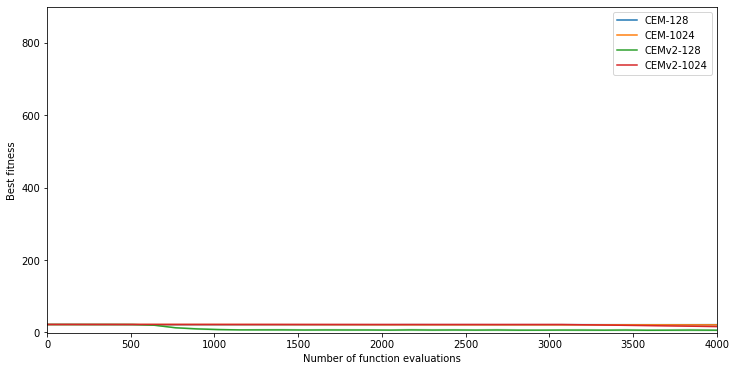

In [ ]:
error1_cem_128, error2_cem_128 = [], []
for i in range(len(plt_fitness_cem_128)):
    error1_cem_128.append(plt_fitness_cem_128[i] + plt_std_cem_128[i])
    error2_cem_128.append(plt_fitness_cem_128[i] - plt_std_cem_128[i])

error1_cem_1024, error2_cem_1024 = [], []
for i in range(len(plt_fitness_cem_1024)):
    error1_cem_1024.append(plt_fitness_cem_1024[i] + plt_std_cem_1024[i])
    error2_cem_1024.append(plt_fitness_cem_1024[i] - plt_std_cem_1024[i])

error1_cemv2_128, error2_cemv2_128 = [], []
for i in range(len(plt_fitness_cemv2_128)):
    error1_cemv2_128.append(plt_fitness_cemv2_128[i] + plt_std_cemv2_128[i])
    error2_cemv2_128.append(plt_fitness_cemv2_128[i] - plt_std_cemv2_128[i])

error1_cemv2_1024, error2_cemv2_1024 = [], []
for i in range(len(plt_fitness_cemv2_1024)):
    error1_cemv2_1024.append(plt_fitness_cemv2_1024[i] + plt_std_cemv2_1024[i])
    error2_cemv2_1024.append(plt_fitness_cemv2_1024[i] - plt_std_cemv2_1024[i])

plt.figure(figsize=(12, 6))
plt.xlim(left=0, right=4000)
plt.ylim(-1, 900)

# CEM 128
plt.plot(plt_eval_cem_128, plt_fitness_cem_128, label='CEM-128')
plt.fill_between(plt_eval_cem_128, error1_cem_128, error2_cem_128, alpha=0.2)

# CEM 1024
plt.plot(plt_eval_cem_1024, plt_fitness_cem_1024, label='CEM-1024')
plt.fill_between(plt_eval_cem_1024, error1_cem_1024, error2_cem_1024, alpha=0.2)

# CEMv2 128
plt.plot(plt_eval_cemv2_128, plt_fitness_cemv2_128,label='CEMv2-128')
plt.fill_between(plt_eval_cemv2_128, error1_cemv2_128, error2_cemv2_128, alpha=0.2)

# ES 1024
plt.plot(plt_eval_cemv2_1024, plt_fitness_cemv2_1024, label='CEMv2-1024')
plt.fill_between(plt_eval_cemv2_1024, error1_cemv2_1024, error2_cemv2_1024, alpha=0.2)

plt.xlabel('Number of function evaluations')
plt.ylabel('Best fitness')
plt.legend()
plt.savefig('Ackley-10d.png')
plt.show()